# NHS capacity and utilisation exploration Jupyter Notebook - Will Burton

## Business context


#### Through this report, the NHS aims to address issues of capacity and utilisation in an effort to keep up with growing demand. 



#### As such this report will consider two primary business questions as put forward by the NHS:
> Has there been adequate staff and capacity in the networks?

> What was the actual utilisation of resources?

## Analytic Approach

> 1) Import, sense check and descriptive statistics
> 2) Refined data exploration to fill in any knowledge gaps prior to addressing NHS questions
> 3) Directly addressing NHS questions provided to us
> 4) Time based analysis of the data
> 5) Twitter analysis
> 6) Final visualisations, questions from the NHS and any additional insights.

###### Please Read:

> After the intial run through of kernels, if the plots appear squashed then simply select the title cell at the top and choose "Run All Below" in the cell drop down menu above. This will run the code again and the visualisations will now present as intended. 

> It is important to understand that the technical report will have full justification and exploration of the details. This is a manual for how to code the project.

> Further exploration and justification of all key concepts and sources can be found in the accompanying technical report.

## 1) Basic exploration and descriptive statistics

### Preparing my workstation

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9)) # Set the figure size

sns.set_style("white") # Set the plot style

sns.set_palette('colorblind') # Set the color palette style

plt.tight_layout() # Adjust layout for better spacing

import warnings # Optional - Ignore warnings
warnings.filterwarnings('ignore')

<Figure size 1600x900 with 0 Axes>

### Import and sense checking the AD data

In [3]:
# Next, I begin the importing and sense-checking routine for the data sets.

ad = pd.read_csv('actual_duration.csv')  # Import and sense-check 'actual_duration.csv' as ad.
print(ad.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'actual_duration.csv'

In [134]:
ad.head()  # View the top of DataFrame.

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [135]:
ad.tail()  # View the bottom of the DataFrame.

sub_icb_location_code sub_icb_location_ons_code  \
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                 sub_icb_location_name icb_ons_code region_ons_code  \
137788  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137789  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137790  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137791  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137792  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   

       appointment_date actual_duration  count_of_appointments  
137788        30-Jun-22   31-60 Minutes                    430  
137789        30-Jun-22   21-30 Minutes                    751  
137790        30-Jun-22   16-20 Minutes                    921  
137791        30-Jun-22   11-15 Minutes                   1439  
137792        30-Jun-22     1-5 Minutes                   1739

In [136]:
# Check for missing values.
ad.isna().sum()  # Determine the sum of missing values

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [137]:
# Review metadata
print(ad.dtypes)  # We start by discovering the data types

# The data types seem appropriate aside from appointment_date

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


In [138]:
# Change the 'appointment_date' column to the correct data type
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

In [139]:
ad.info()  # Checking conversion success 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   sub_icb_location_code      137793 non-null  object        
 1   sub_icb_location_ons_code  137793 non-null  object        
 2   sub_icb_location_name      137793 non-null  object        
 3   icb_ons_code               137793 non-null  object        
 4   region_ons_code            137793 non-null  object        
 5   appointment_date           137793 non-null  datetime64[ns]
 6   actual_duration            137793 non-null  object        
 7   count_of_appointments      137793 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 8.4+ MB


In [1]:
ad.actual_duration.unique

NameError: name 'ad' is not defined

In [140]:
# describe the numerical data with basic statistics
ad.describe().round(2) # round() to limit clutter

count_of_appointments
count              137793.00
mean                 1219.08
std                  1546.90
min                     1.00
25%                   194.00
50%                   696.00
75%                  1621.00
max                 15400.00

 > These insights paint a picture of a dataset with a wide range of appointment counts.
Most days have a relatively lower number of appointments, but some days have
very high counts, contributing to the higher mean and extended upper quartiles.

In [141]:
# Describe the descriptive data with basic statistics
ad.describe(include=['O'])

sub_icb_location_code sub_icb_location_ons_code  \
count                 137793                    137793   
unique                   106                       106   
top                      26A                 E38000239   
freq                    1484                      1484   

                    sub_icb_location_name icb_ons_code region_ons_code  \
count                              137793       137793          137793   
unique                                106           42               7   
top     NHS Norfolk and Waveney ICB - 26A    E54000057       E40000010   
freq                                 1484        12668           33112   

               actual_duration  
count                   137793  
unique                       7  
top     Unknown / Data Quality  
freq                     20161

> The most useufl insight here is that there are 106 sub_icbs, 42 icbs and 7 regions.

### Initial exploratory visualisations of the AD data

In [142]:
# Checking and changing the colour palette to be more appriate to the vision impaired
sns.set_palette('colorblind')

sns.color_palette()

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

Text(0.2, 40284086, 'Significant lack of data: 40284086')

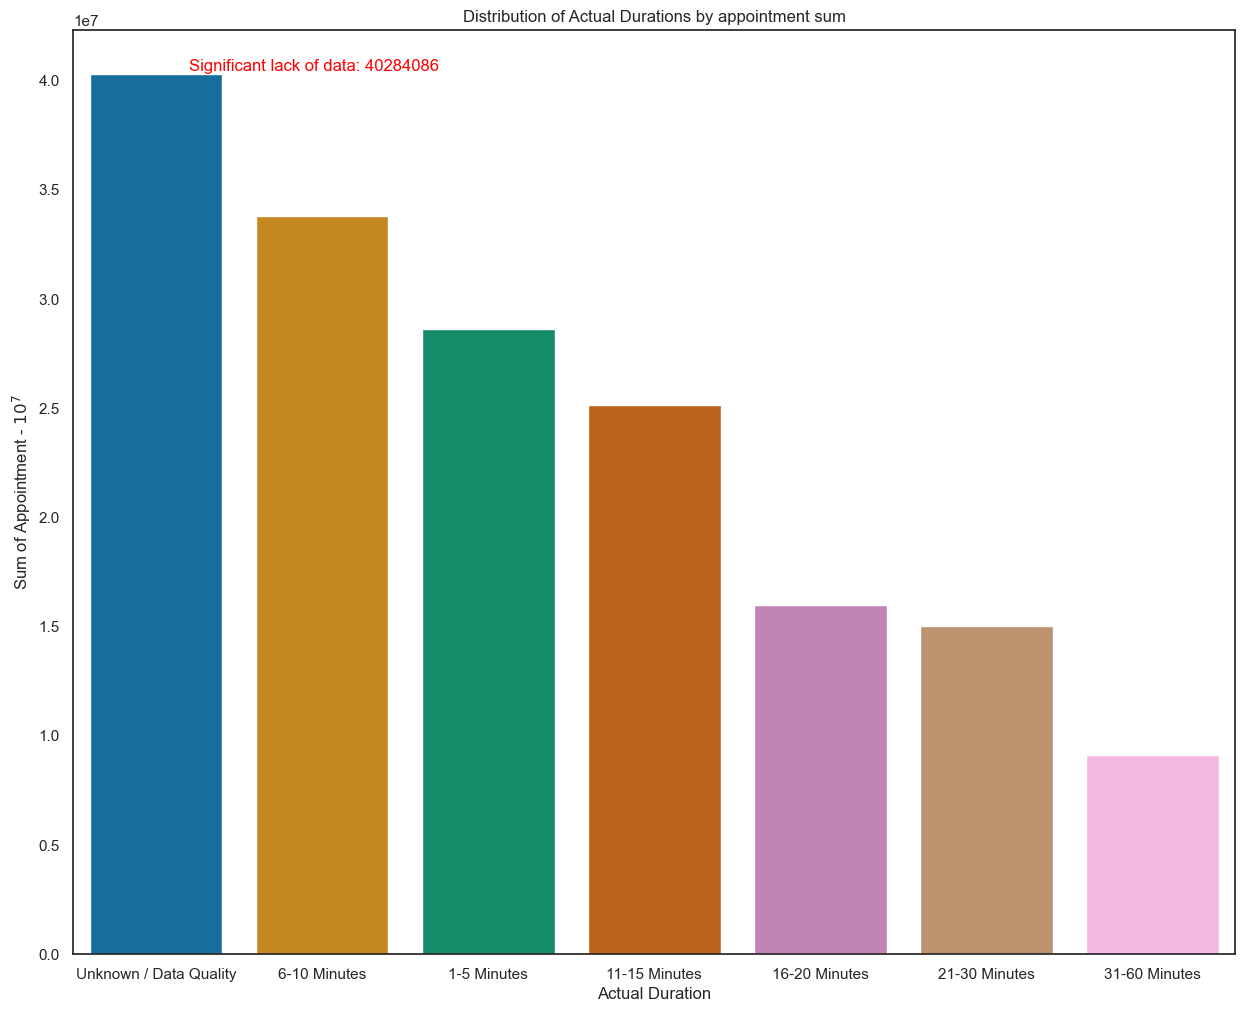

In [143]:
# Grouping by 'actual_duration' and calculating the sum of 'count_of_appointments'
# to visualize most appointments by actual_duration
ad_sum_ad_coa = ad.groupby('actual_duration')['count_of_appointments'].sum()

# Plotting the bar graph with descending order
sns.barplot(
    x=ad_sum_ad_coa.index,
    y=ad_sum_ad_coa.values,
    order=ad_sum_ad_coa.sort_values(ascending=False).index,
)

# Adding labels and title
plt.xlabel('Actual Duration')
plt.ylabel('Sum of Appointment - $10^7$')  # To show 10,000,000's 
plt.title('Distribution of Actual Durations by appointment sum')

# Highlighting the significant data quality issue
max_sum_ad = ad_sum_ad_coa.max()
plt.text(0.2, max_sum_ad, f'Significant lack of data: {max_sum_ad}',
         ha='left', va='bottom', color='red')

> Signficant data quality issue

Text(0.5, 1.0, 'Bar Chart of recommended 15 mins appointment time')

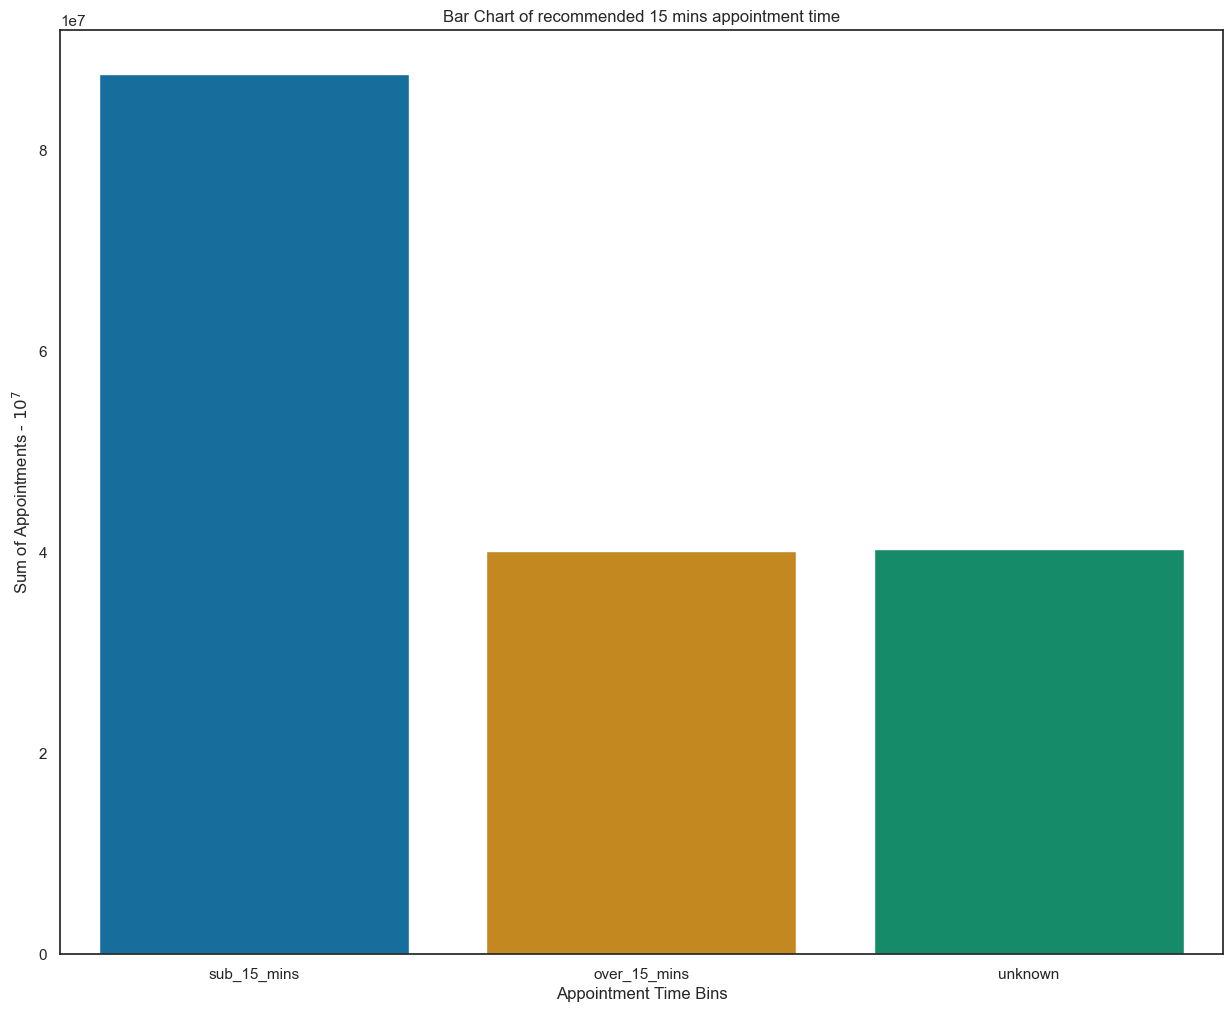

In [144]:
# Grouping into categories around the recommended 15 minutes appointment time from BMA
# The ideal_app_time has been calculated previously from totals created in Excel Pivot tables
ideal_app_time = pd.DataFrame({
    'category': ['sub_15_mins', 'over_15_mins', 'unknown'],
    'total': [87562562, 40134044, 40284086]
})

# Create a bar chart using Seaborn
sns.barplot(x='category', y='total', data=ideal_app_time)

# Adding labels and title
plt.xlabel('Appointment Time Bins')
plt.ylabel('Sum of Appointments - $10^7$')  # To show 10,000,000's
plt.title('Bar Chart of recommended 15 mins appointment time')

> Just over half of appointments seem to be over the recomended [BMA](https://www.bma.org.uk/advice-and-support/gp-practices/managing-workload/safe-working-in-general-practice) (British Medical Association) duration, click the link for futher justification.

([<matplotlib.axis.XTick at 0x251173f4d10>,
 [Text(0, 0, 'Midlands'),
  Text(1, 0, 'North East and Yorkshire'),
  Text(2, 0, 'South East'),
  Text(3, 0, 'London'),
  Text(4, 0, 'North West'),
  Text(5, 0, 'East of England'),
  Text(6, 0, 'South West')])

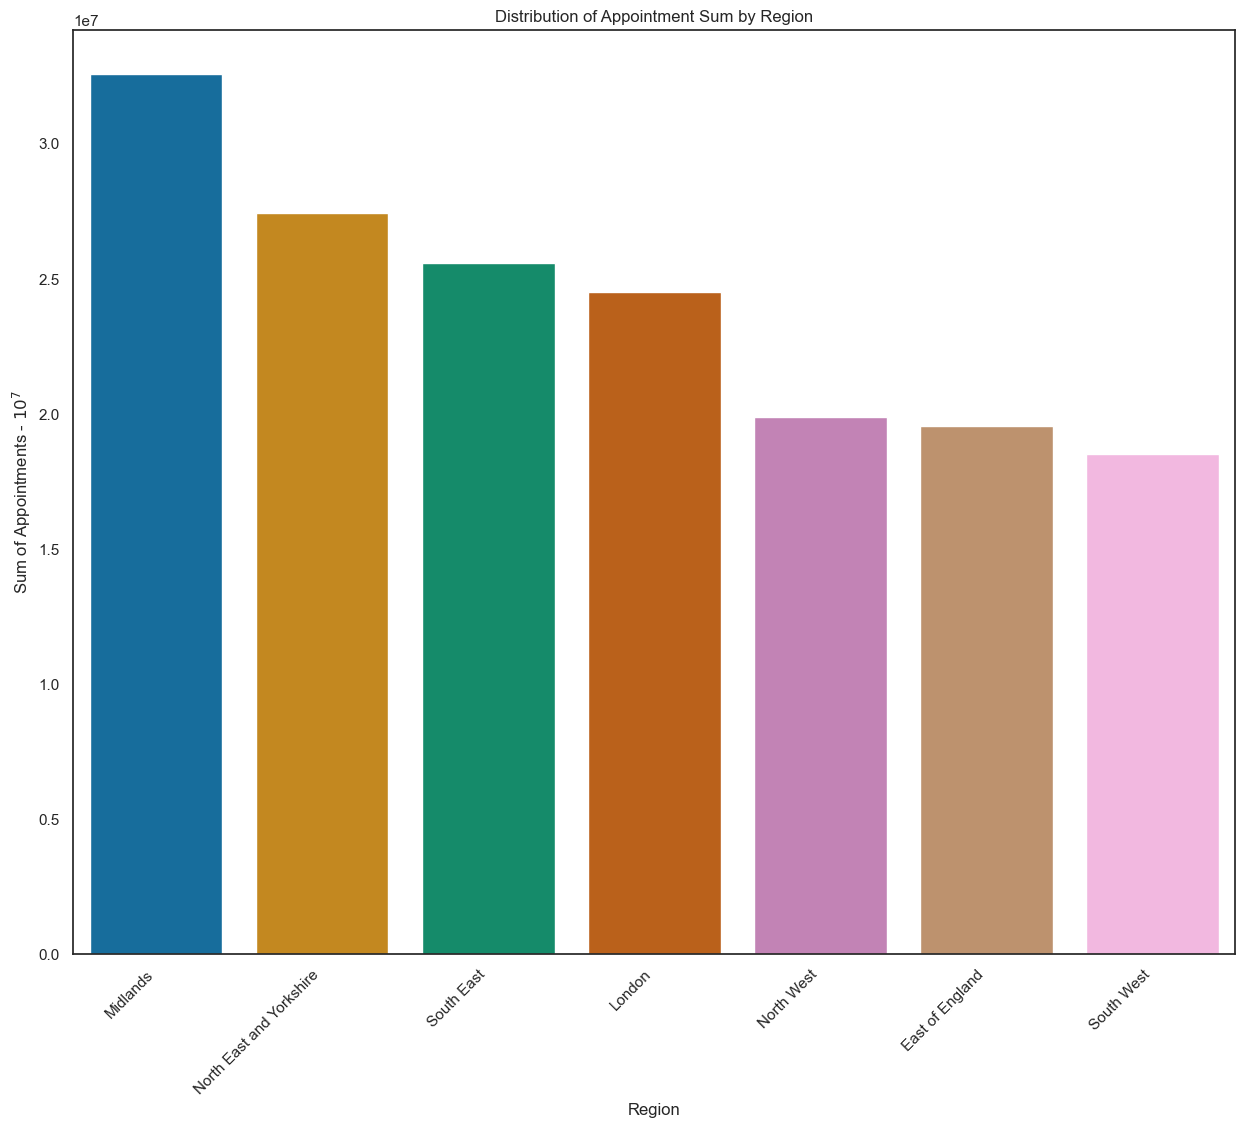

In [145]:
# Distribution of Appointment Sum by Region 

# Plotting the bar graph with descending order and setting the color palette
ad_sum_reg_coa = ad.groupby('region_ons_code')['count_of_appointments'].sum()

# Plotting the bar graph with descending order
sns.barplot(
    x=ad_sum_reg_coa.index,
    y=ad_sum_reg_coa.values,
    order=ad_sum_reg_coa.sort_values(ascending=False).index,
)

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Sum of Appointments - $10^7$')
plt.title('Distribution of Appointment Sum by Region')

# Setting custom x-axis labels to display externally verified region codes
custom_labels_hist_ad = ['Midlands', 'North East and Yorkshire', 'South East', 
                         'London', 'North West', 'East of England', 'South West']
plt.xticks(range(len(custom_labels_hist_ad)), custom_labels_hist_ad, rotation=45, ha='right')

> The Midlands leads the way quite significantly

> Region code names can be found [here](https://geoportal.statistics.gov.uk/documents/46b634b42ceb45cbbfbe9c960fb77ec9/about)

Text(0.5, 1.0, 'Distribution of Appointment Counts by Region')

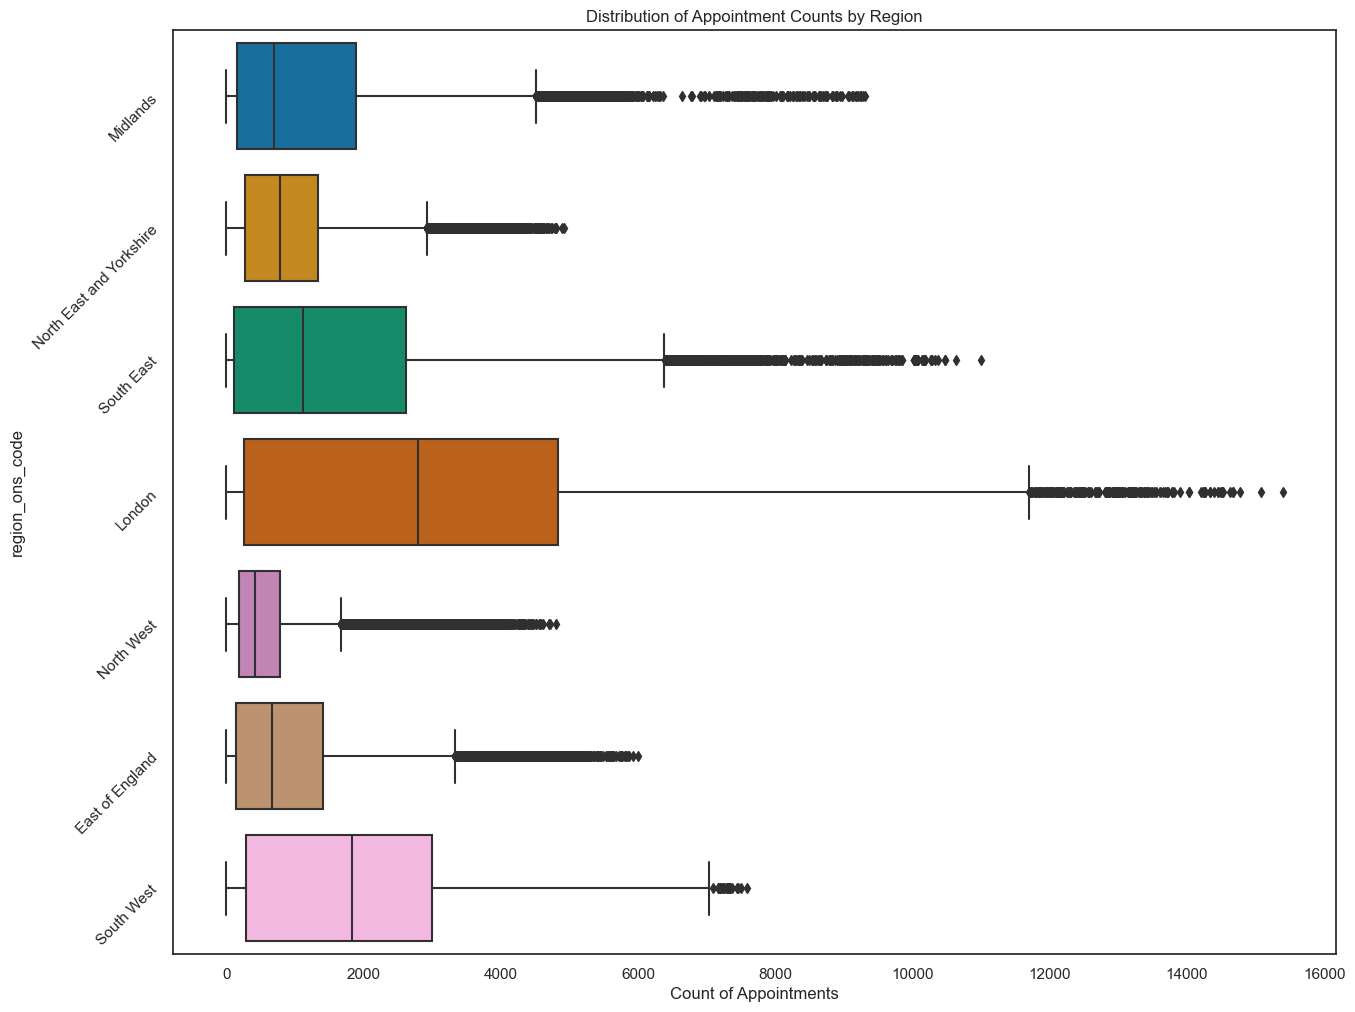

In [146]:
# Distribution of Appointment counts by Region

# Plotting the boxplot by descending order
sns.boxplot(
    data=ad,
    x='count_of_appointments',
    y='region_ons_code',
    order=ad_sum_reg_coa.sort_values(ascending=False).index,
)

# Setting custom x-axis labels to display externally verified region codes
custom_labels_hist_ad = ['Midlands', 'North East and Yorkshire', 'South East', 'London', 
                         'North West', 'East of England', 'South West']
plt.yticks(range(len(custom_labels_hist_ad)), custom_labels_hist_ad, rotation=45, ha='right')

# Adding labels and title
plt.xlabel('Count of Appointments')
plt.ylabel('region_ons_code')
plt.title('Distribution of Appointment Counts by Region')

> The Midlands boxplot shows us that there are many significant outliers beyond the IQR.
 
> Large individual instances of very high numbers reported to make it top region.
 
> London showing that there are more count of appointments within the IQR.

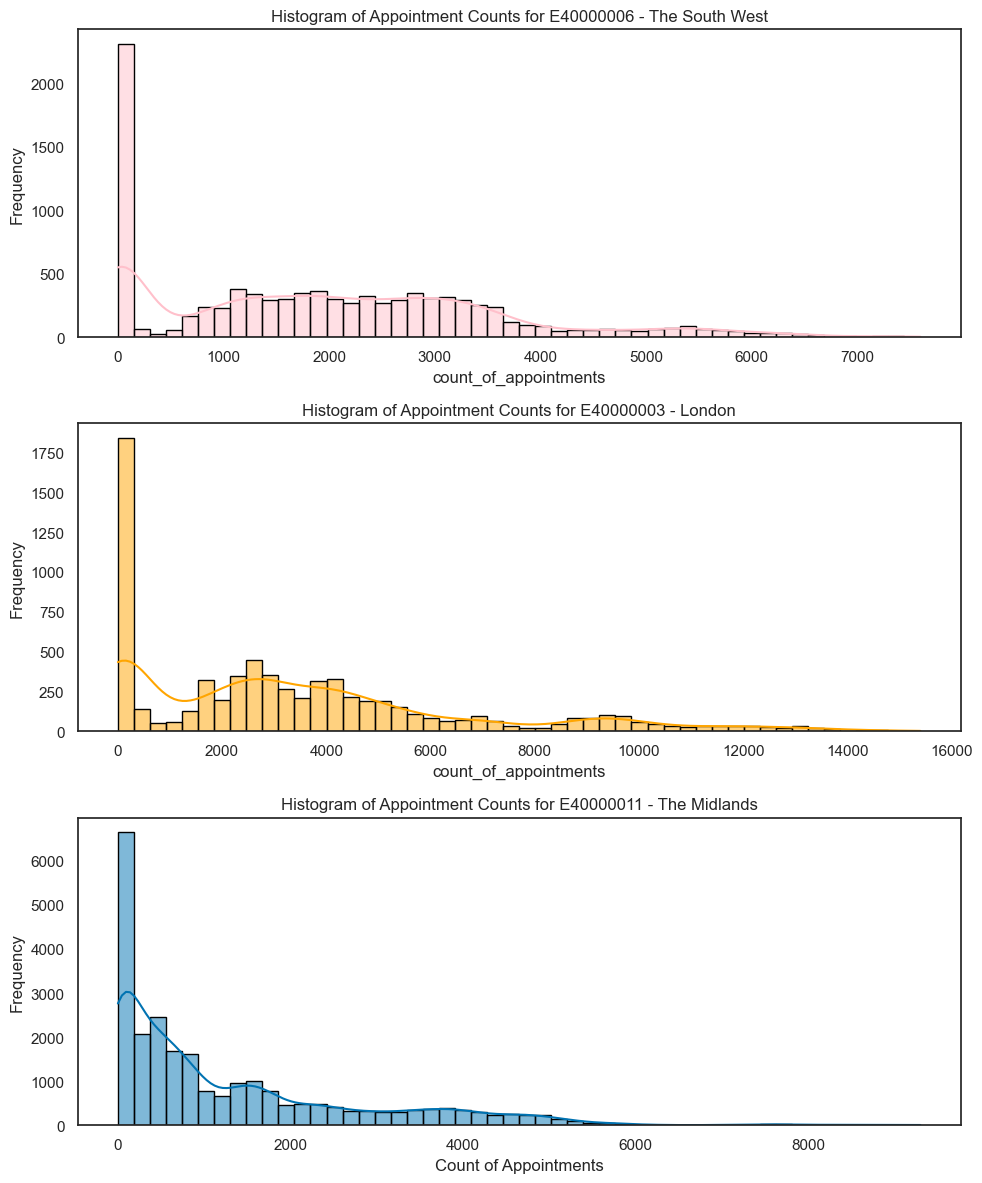

In [147]:
# Exploring the spread of the count of appointments for the first, middle and last regions

# settomg the the canvas for three seperate plots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# The spread of appointments for the lowest appointment count region
selected_region_ad_low = 'E40000006'  # South West
selected_region_data_ad_low = ad[ad['region_ons_code'] == selected_region_ad_low]['count_of_appointments']

# Plotting the histogram for South West
sns.histplot(
    selected_region_data_ad_low, bins=50, kde=True, color='pink',
    edgecolor='black', label='South West', alpha=0.5, ax=axes[0]
)

# Adding labels and title for the South West subplot
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of Appointment Counts for {selected_region_ad_low} - The South West')

# Choosing to see the spread of appointments for the middle appointment count region
selected_region_ad_mid = 'E40000003'  # London
selected_region_data_ad_mid = ad[ad['region_ons_code'] == selected_region_ad_mid]['count_of_appointments']

# Plotting the histogram for London
sns.histplot(
    selected_region_data_ad_mid, bins=50, kde=True, color='orange',
    edgecolor='black', label='London', alpha=0.5, ax=axes[1]
)

# Adding labels and title for London subplot
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Histogram of Appointment Counts for {selected_region_ad_mid} - London')

# Choosing to see the spread of appointments for the largest appointment count region
selected_region_ad_high = 'E40000011'  # The Midlands
selected_region_data_ad_high = ad[ad['region_ons_code'] == selected_region_ad_high]['count_of_appointments']

# Plotting the histogram for The Midlands
sns.histplot(
    selected_region_data_ad_high, bins=50, kde=True,
    edgecolor='black', label='Midlands', alpha=0.5, ax=axes[2]
)

# Adding labels and title for the Midlands subplot
axes[2].set_xlabel('Count of Appointments')
axes[2].set_ylabel('Frequency')
axes[2].set_title(f'Histogram of Appointment Counts for {selected_region_ad_high} - The Midlands')

# Adjust layout for better spacing
plt.tight_layout()

> A similar story to the boxplot above
> Appointments are front loaded. 
> It's a tale of frequency being the key metric for Midlands high appoitment count:
>> South West has medium frequency and medium count
>> London has low frequency but high count
>> The Midlands has very high frequency and medium count, hence it's place as number one

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'NHS Black Country ICB - D2P2L'),
  Text(1, 0, 'NHS Birmingham and Solihull ICB - 15E'),
  Text(2, 0, 'NHS Derby and Derbyshire ICB - 15M'),
  Text(3, 0, 'NHS Nottingham and Nottinghamshire ICB - 52R'),
  Text(4, 0, 'NHS Coventry and Warwickshire ICB - B2M3M'),
  Text(5, 0, 'NHS Herefordshire and Worcestershire ICB - 18C'),
  Text(6, 0, 'NHS Lincolnshire ICB - 71E'),
  Text(7, 0, 'NHS Northamptonshire ICB - 78H'),
  Text(8, 0, 'NHS Shropshire Telford and Wrekin ICB - M2L0M'),
  Text(9, 0, 'NHS Leicester Leicestershire and Rutland ICB - 04V'),
  Text(10, 0, 'NHS Leicester Leicestershire and Rutland ICB - 04C'),
  Text(11, 0, 'NHS Leicester Leicestershire and Rutland ICB - 03W'),
  Text(12, 0, 'NHS Staffordshire and Stoke-on-Trent ICB - 05W'),
  Text(13, 0, 'NHS Staffordshire and Stoke-on-Trent ICB - 05Q'),
  Text(14, 0, 'NHS Staffordshire and Stoke-on-Trent ICB - 05G'),
  Text(15, 

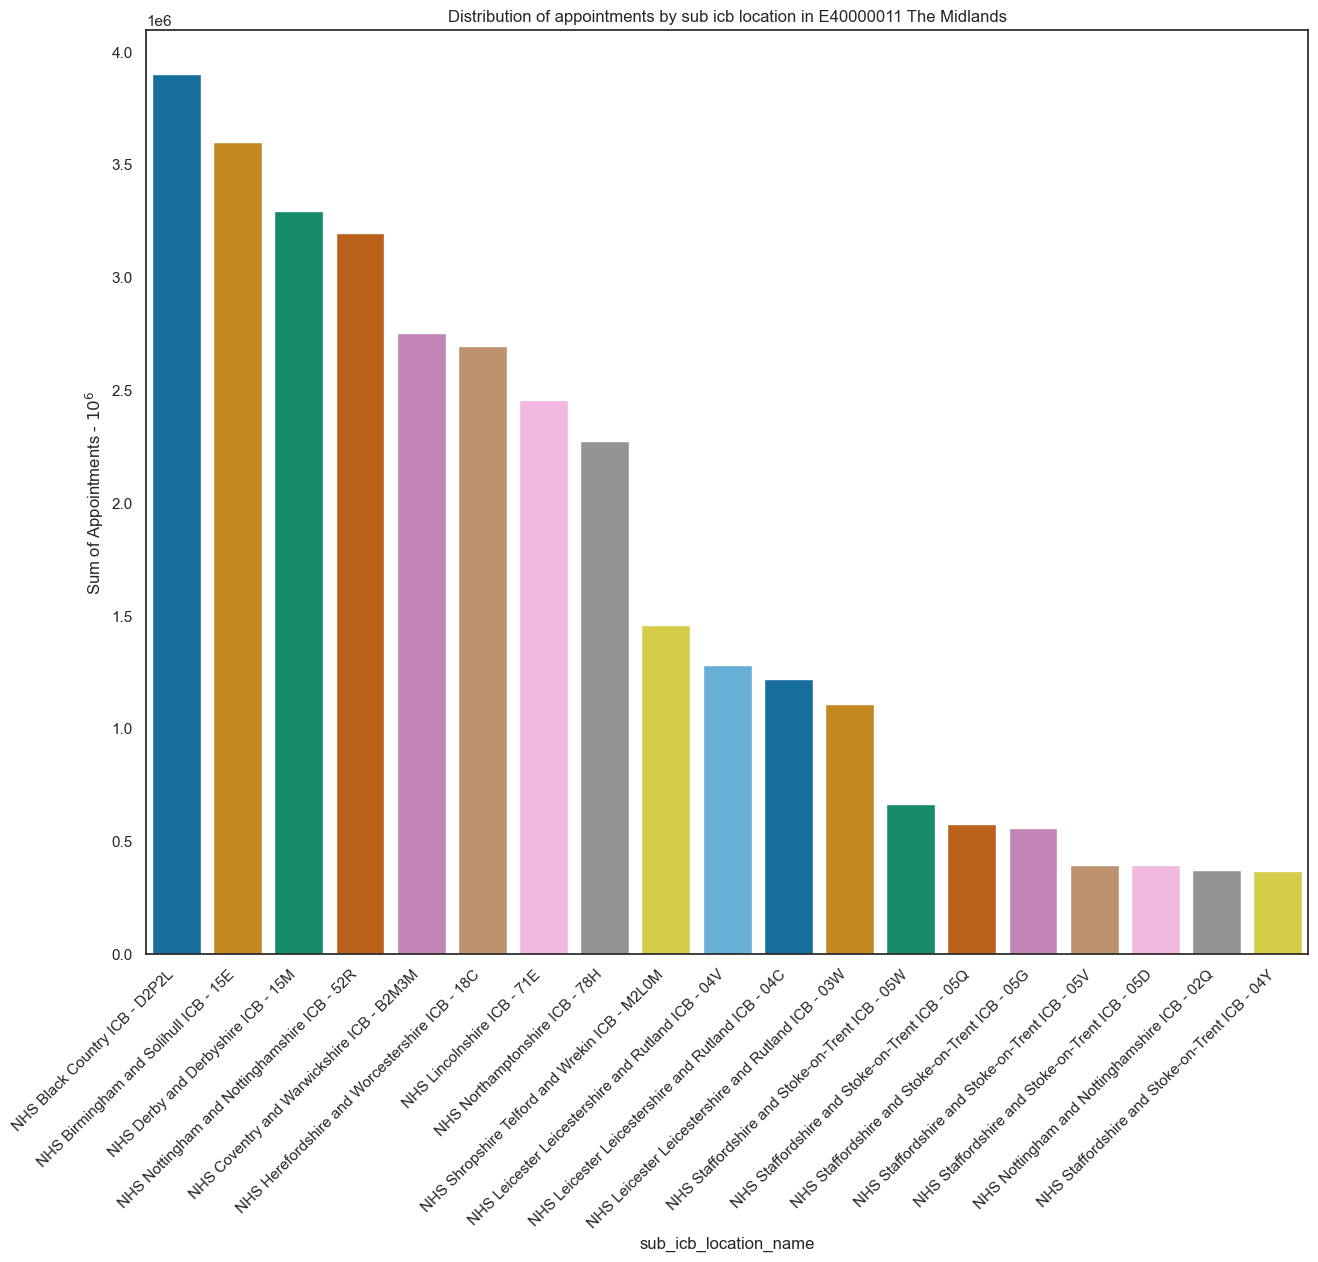

In [148]:
# Visualising the sub_icb within the Midlands by sum of appointment count
# sub_icb selected to see the data at it's most granular level

selected_region_sub = 'E40000011'  # The Midlands

# Filter the data for the selected region
selected_region_data_sub = ad[ad['region_ons_code'] == selected_region_sub]

# Summing appointments by sub_icb_location_name within the selected region
ad_sum_sub_icb_region = selected_region_data_sub.groupby('sub_icb_location_name')[
    'count_of_appointments'].sum()

# Plotting the bar graph with descending order
sns.barplot(
    x=ad_sum_sub_icb_region.index,
    y=ad_sum_sub_icb_region.values,
    order=ad_sum_sub_icb_region.sort_values(ascending=False).index,
    palette='colorblind'
)

# Adding labels and title
plt.xlabel('sub_icb_location_name')
plt.ylabel('Sum of Appointments - $10^6$')
plt.title(f'Distribution of appointments by sub icb location in {selected_region_sub} The Midlands')

# Setting custom x-axis labels
plt.xticks(rotation=45, ha='right')

> Interesting to see how diverse the spread of appointments is within one Region

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'NHS North West London ICB - W2U3Z'),
  Text(1, 0, 'NHS North East London ICB - A3A8R'),
  Text(2, 0, 'NHS Kent and Medway ICB - 91Q'),
  Text(3, 0, 'NHS Hampshire and Isle Of Wight ICB - D9Y0V'),
  Text(4, 0, 'NHS South East London ICB - 72Q'),
  Text(5, 0, 'NHS Devon ICB - 15N'),
  Text(6, 0, 'NHS South West London ICB - 36L'),
  Text(7, 0, 'NHS Black Country ICB - D2P2L'),
  Text(8, 0, 'NHS North Central London ICB - 93C'),
  Text(9, 0, 'NHS Birmingham and Solihull ICB - 15E')])

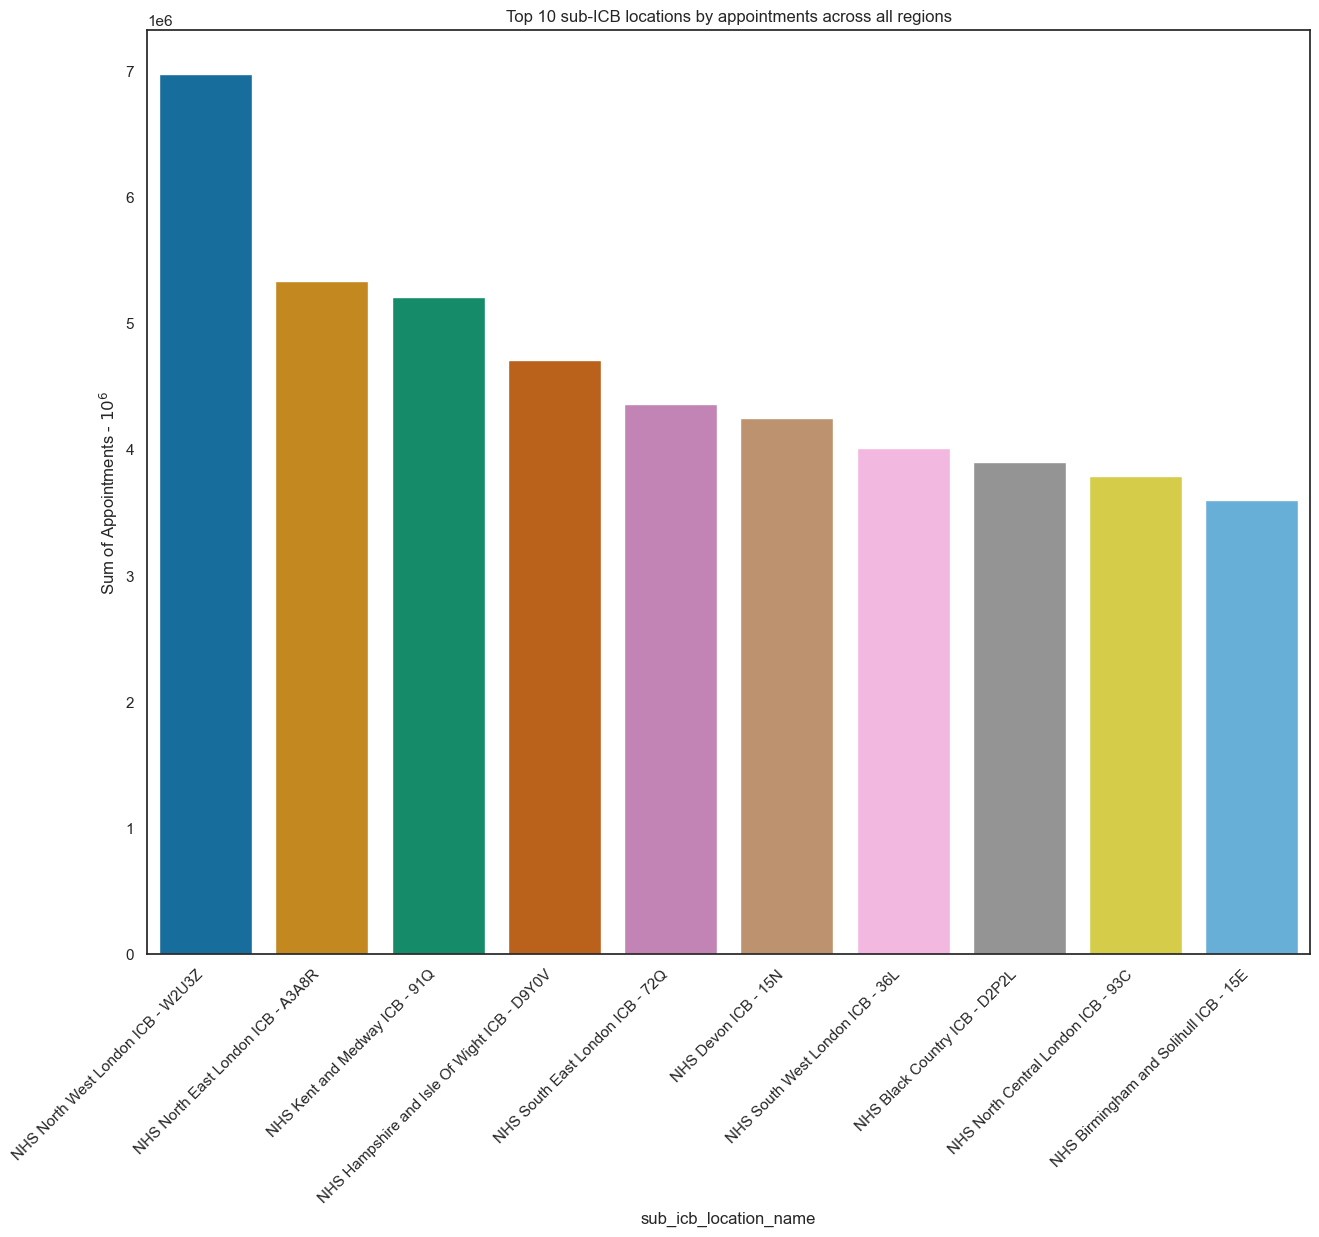

In [149]:
# Expanding the search nationally

# Top 10 sub-ICB locations by sum of appointments across all regions
top_10_sub_icb = (
    ad.groupby("sub_icb_location_name")["count_of_appointments"]
    .sum()
    .nlargest(10)
)

# Plotting the bar graph for the top 10
sns.barplot(
    x=top_10_sub_icb.index,
    y=top_10_sub_icb.values,
    order=top_10_sub_icb.index,
    palette="colorblind",
)

# Adding labels and title
plt.xlabel("sub_icb_location_name")
plt.ylabel("Sum of Appointments - $10^6$")
plt.title("Top 10 sub-ICB locations by appointments across all regions")

# Setting custom x-axis labels
plt.xticks(rotation=45, ha="right")

> This plot shows the top 10 sub-ICB locations with the highest sum of appointments across all regions. 

> Several regions are represented in this data, showing us how important the precise distribution of resources is.

### Import and sense checking the AR data

In [150]:
# Import and sense-check 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')
print(ar.shape)

(596821, 7)


In [151]:
ar.head()  # View the top of the DataFrame

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [152]:
ar.tail()  # View the bottom of the DataFrame

# Lots of data unkown at the tail of the dataframe

icb_ons_code appointment_month appointment_status hcp_type  \
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10

In [153]:
ar.isna().sum()  # Check for missing values.

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [154]:
# Review metadata
print(ar.dtypes)  # We start by discovering the data types
# appointment_month needs to be changed

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [155]:
# Change the 'appointment_month' column to the correct data type
ar["appointment_month"] = pd.to_datetime(
    ar["appointment_month"], format="%Y-%m"
)  

# Note the format change as there is no daily data like in AD

In [156]:
ar.info()  # Checking conversion success 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   icb_ons_code                       596821 non-null  object        
 1   appointment_month                  596821 non-null  datetime64[ns]
 2   appointment_status                 596821 non-null  object        
 3   hcp_type                           596821 non-null  object        
 4   appointment_mode                   596821 non-null  object        
 5   time_between_book_and_appointment  596821 non-null  object        
 6   count_of_appointments              596821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 31.9+ MB


In [157]:
# Describe the data with basic statistics using just numerical data
ar.describe().round(2)  # Rounding to reduce clutter

count_of_appointments
count              596821.00
mean                 1244.60
std                  5856.89
min                     1.00
25%                     7.00
50%                    47.00
75%                   308.00
max                211265.00

> An average of around 1244 appointments a month

> A large spread between the values of 1 appointment to 211265 appointments a month

> Same pattern as the AD dataset

> Again, appointments are frontloaded with the maximum being so far from the rest of the IQR

In [158]:
# Describe the data with basic statistics using just descriptive data
ar.describe(include=["O"])  # describe the data with basic statistics with just descriptive data

icb_ons_code appointment_status              hcp_type appointment_mode  \
count        596821             596821                596821           596821   
unique           42                  3                     3                5   
top       E54000057           Attended  Other Practice staff     Face-to-Face   
freq          54527             232137                241557           180410   

       time_between_book_and_appointment  
count                             596821  
unique                                 8  
top                             Same Day  
freq                               95502

> 42 ICBs the same as the AD data count

> 3 types of healthcare professional

> 5 appointment_modes options

> 9 tbbaa options

### Initial exploratory visualisations of the AR data

Text(0.5, 1.0, 'Distribution of HCP Type by appointment sum')

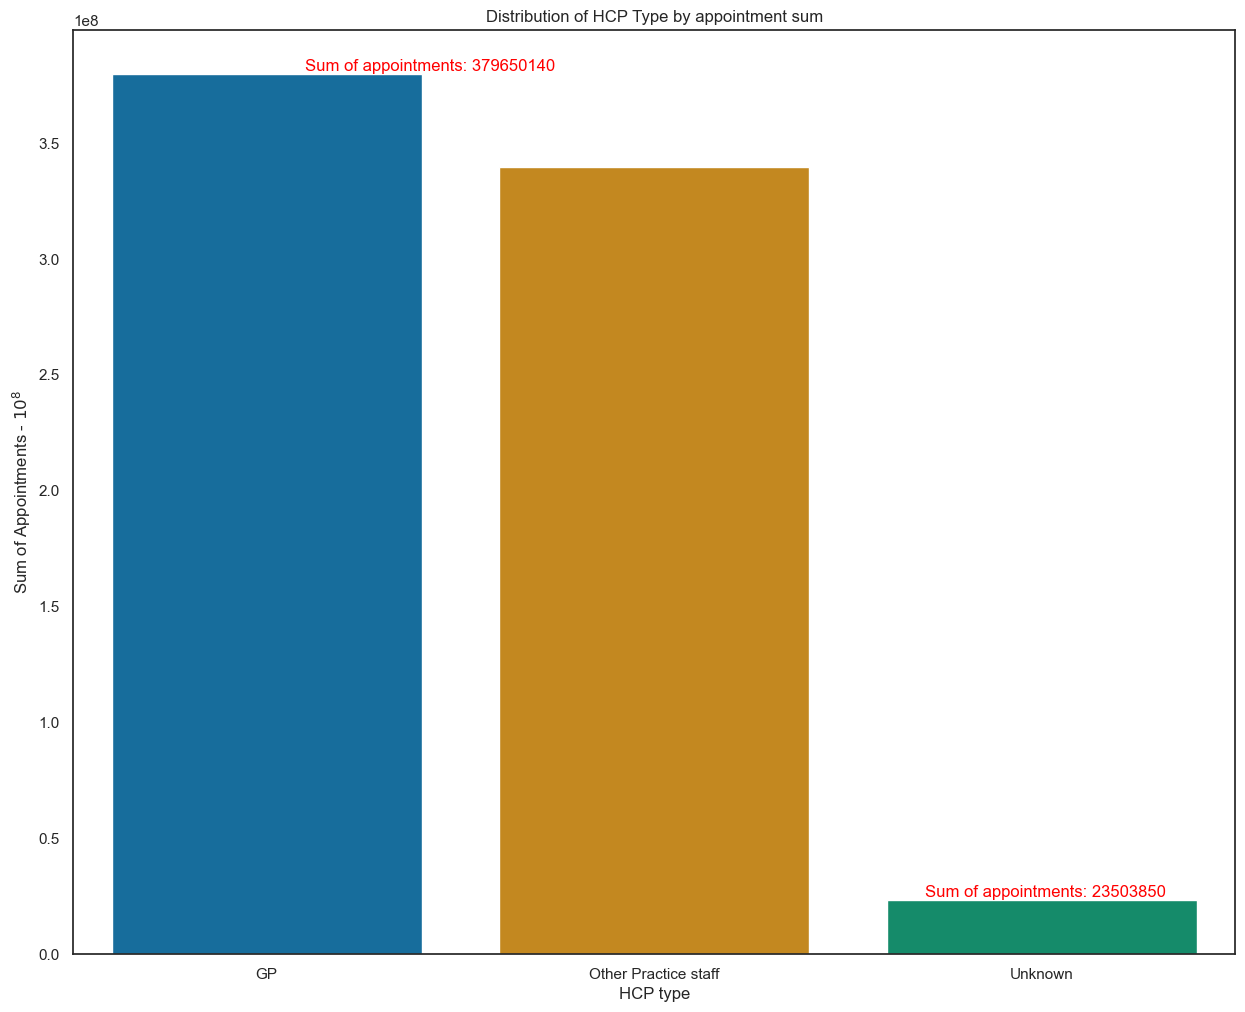

In [159]:
# Exploring the distribution of healthcare professional type appointments

# Grouping by 'hcp_type' and calculating the sum of 'count_of_appointments'
ar_sum_hcp_coa = ar.groupby("hcp_type")["count_of_appointments"].sum()

# Plotting the bar graph with descending order
sns.barplot(
    x=ar_sum_hcp_coa.index,
    y=ar_sum_hcp_coa.values,
    order=ar_sum_hcp_coa.sort_values(ascending=False).index,
    palette="colorblind",
)

# Highlighting the highest point with a text annotation
max_sum_ar_hcp = ar_sum_hcp_coa.max()
plt.text(
    0.1,
    max_sum_ar_hcp,
    f"Sum of appointments: {max_sum_ar_hcp}",
    ha="left",
    va="bottom",
    color="red",
)

# Highlighting the lowest point with a text annotation
min_sum_ar_hcp = ar_sum_hcp_coa.min()
plt.text(
    2.32,
    min_sum_ar_hcp,
    f"Sum of appointments: {min_sum_ar_hcp}",
    ha="right",
    va="bottom",
    color="red",
)

# Adding labels and title
plt.xlabel("HCP type")
plt.ylabel(
    "Sum of Appointments - $10^8$"  # To show 100,000,000's
)
plt.title("Distribution of HCP Type by appointment sum")

> GP's are not far from other practioners in terms of total sum of appointments. 

> Reporting of data is better than previous charts with regards to 'Unknowns'

Text(0.5, 1.0, 'Distribution of Appointment Mode by appointment sum')

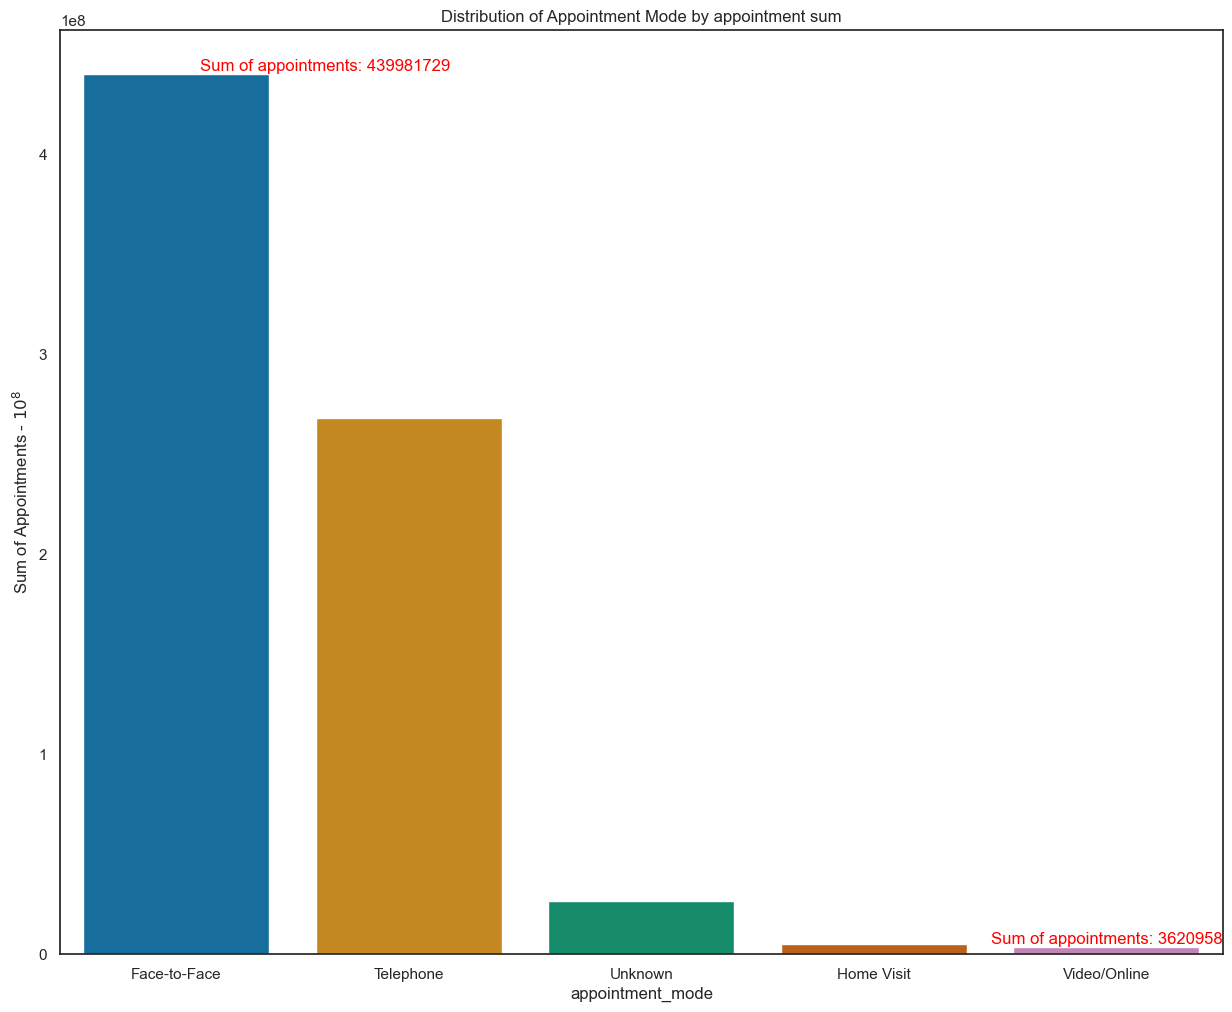

In [160]:
# Exploring the distribution of appointment mode by appointment sum

# Grouping by 'appointment_mode' and calculating the sum of 'count_of_appointments'
ar_sum_mode_coa = ar.groupby("appointment_mode")["count_of_appointments"].sum()

# Plotting the bar graph with descending order
sns.barplot(
    x=ar_sum_mode_coa.index,
    y=ar_sum_mode_coa.values,
    order=ar_sum_mode_coa.sort_values(ascending=False).index,
    palette="colorblind",
)

# Highlighting the highest point with a text annotation
max_sum_ar_mode = ar_sum_mode_coa.max()
plt.text(
    0.1,
    max_sum_ar_mode,
    f"Sum of appointments: {max_sum_ar_mode}",
    ha="left",
    va="bottom",
    color="red",
)

# Highlighting the lowest point with a text annotation
min_sum_ar_mode = ar_sum_mode_coa.min()
plt.text(
    4.5,
    min_sum_ar_mode,
    f"Sum of appointments: {min_sum_ar_mode}",
    ha="right",
    va="bottom",
    color="red",
)

# Adjusting for a wide range in service setting data by making scale logarithmic if needed
# plt.yscale('log') - use at own discretion

# Adding labels and title
plt.xlabel("appointment_mode")
plt.ylabel("Sum of Appointments - $10^8$")  # To show 100,000,000's
plt.title("Distribution of Appointment Mode by appointment sum")

> There is the option to view through log scale if further detail needed

> Very few appointments are done through a 'Home Vist' or 'Video/Online'

> The majority of appointments are done through 'Face-to-Face' or the 'Telephone'

>Large amount of missing data

> The gulf between 'Face-to-Face' and 'Video/Online' is enormous, 436,360,771

Text(0.5, 1.0, 'Distribution of appointment_status by appointment sum')

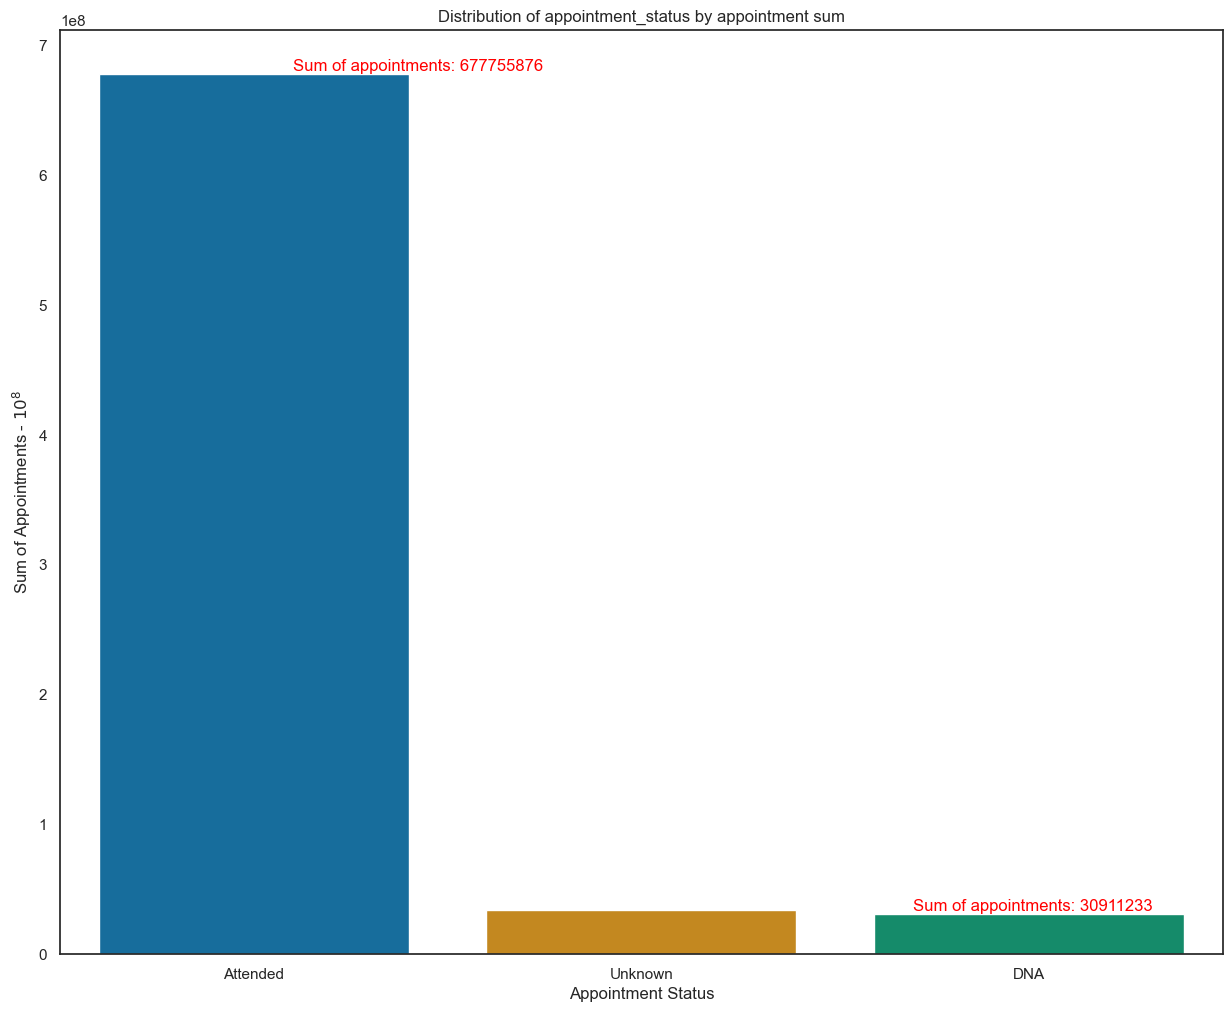

In [161]:
# Exploring appointment status by sum of appointments

# Grouping by 'appointment_status' and calculating the sum of 'count_of_appointments'
ar_sum_status_coa = ar.groupby("appointment_status")["count_of_appointments"].sum()

# Plotting the bar graph with descending order
sns.barplot(
    x=ar_sum_status_coa.index,
    y=ar_sum_status_coa.values,
    order=ar_sum_status_coa.sort_values(ascending=False).index,
    palette="colorblind",
)

# Highlighting the highest point with a text annotation
max_sum_ar_status = ar_sum_status_coa.max()
plt.text(
    0.1,
    max_sum_ar_status,
    f"Sum of appointments: {max_sum_ar_status}",
    ha="left",
    va="bottom",
    color="red",
)

# Highlighting the lowest point with a text annotation
min_sum_ar_status = ar_sum_status_coa.min()
plt.text(
    2.32,
    min_sum_ar_status,
    f"Sum of appointments: {min_sum_ar_status}",
    ha="right",
    va="bottom",
    color="red",
)

# Adding labels and title
plt.xlabel("Appointment Status")
plt.ylabel("Sum of Appointments - $10^8$")  # To show 100,000,000's
plt.title("Distribution of appointment_status by appointment sum")

> Although there is a large data spread here it is clear that most appointments are attended.

> Problems with data quality and reporting must be noted

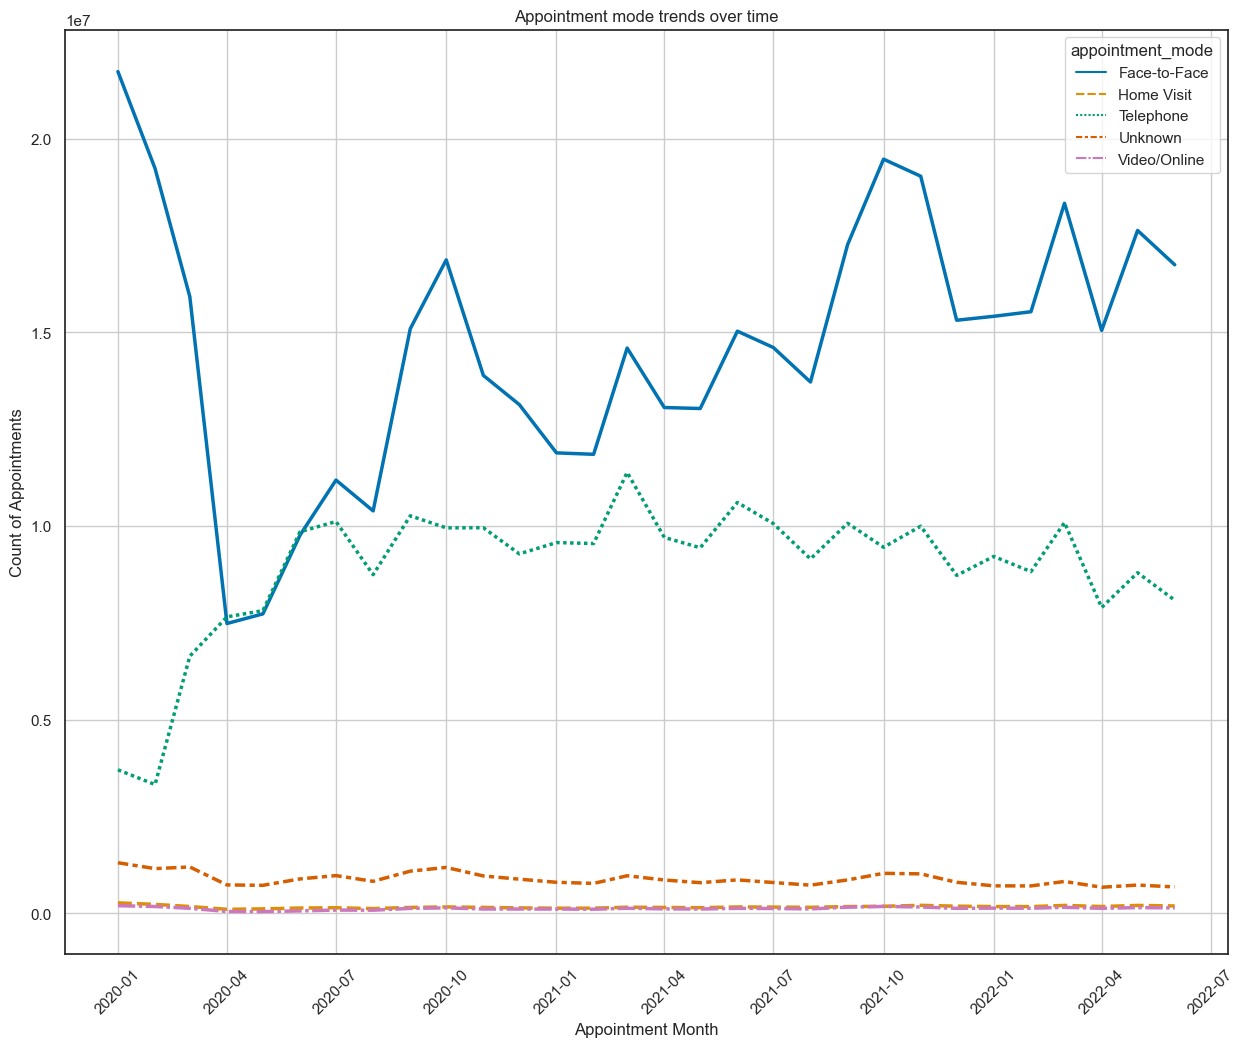

In [162]:
# Grouping by 'appointment_mode' and 'appointment_month', calculating the sum of 'count_of_appointments'
ar_sum_mode_coa_time = (
    ar.groupby(["appointment_mode", "appointment_month"])["count_of_appointments"]
    .sum()
    .reset_index()
)

# Plotting the line plot
sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="appointment_mode",
    data=ar_sum_mode_coa_time,
    ci=None,
    linewidth=2.5,
    style="appointment_mode",
)

# Adding labels and title
plt.xticks(rotation=45)
plt.xlabel("Appointment Month")
plt.ylabel("Count of Appointments")
plt.title("Appointment mode trends over time")

# Show gridlines
plt.grid(True)  # for ease of aligning with the month data

# A large downward gap in 'face-to-face' coincides with a steep rise in the 'telephone' appointment mode.
# This period corresponds to the first England Lockdown, with a 32% decrease in appointments across the board.
# 'Face-to-face' regains ground quickly and retains an upward trend in spite of fluctuation.
# 'Telephone' does not retain the gains made during the lockdown.
# Other appointment modes remain relatively insignificant.

Text(0.5, 1.0, 'Appointment Mode and HCP Type')

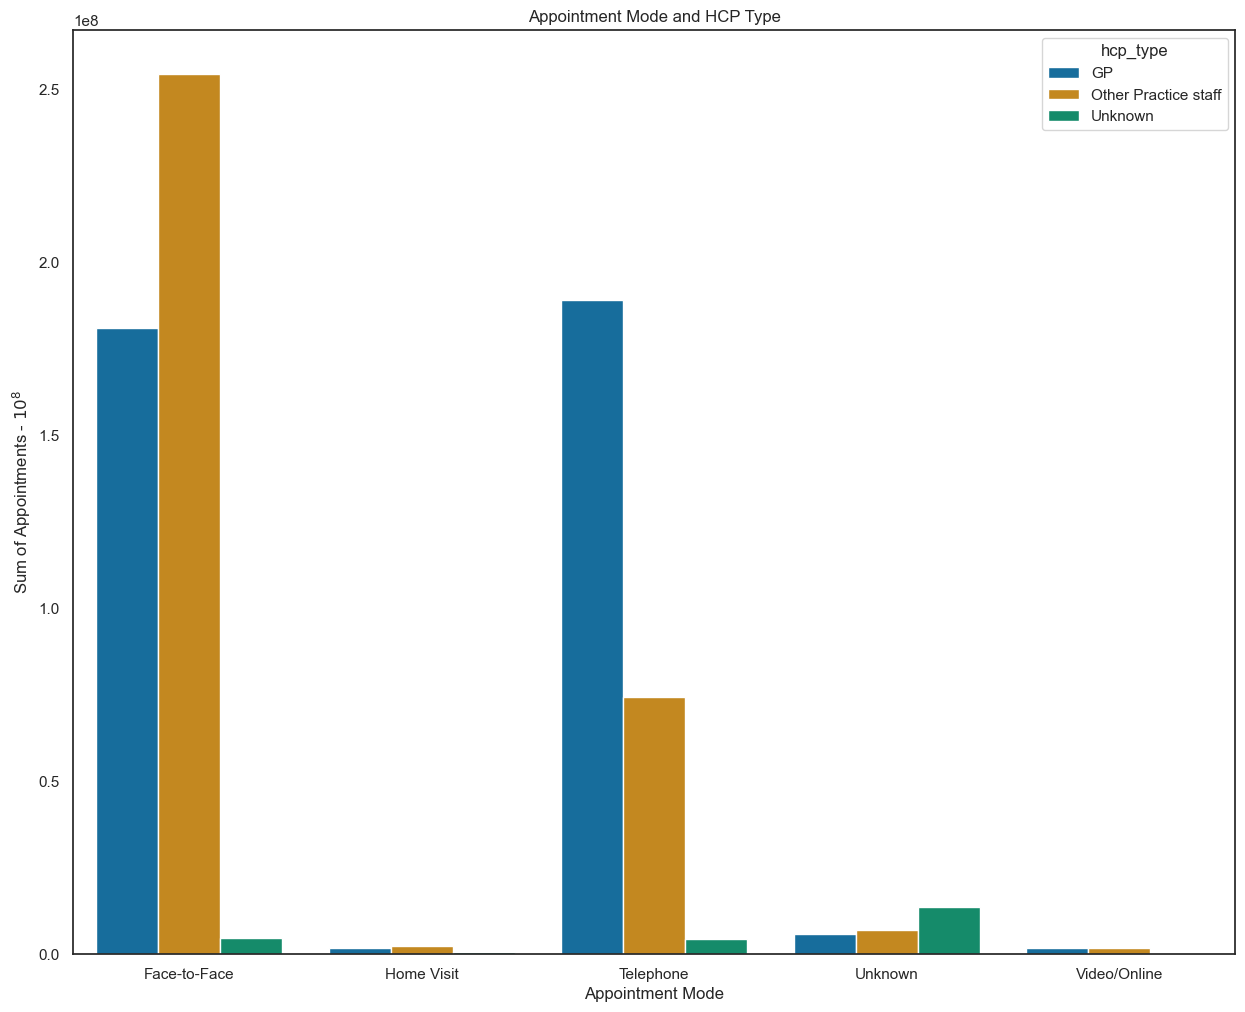

In [163]:
#  Exploring healthcare professional and appointment mode potential correlations

# Grouping by 'hcp_type' and 'appointment_mode' and calculating the sum of 'count_of_appointments'
ar_sum_mode_hcp = (
    ar.groupby(["hcp_type", "appointment_mode"])["count_of_appointments"]
    .sum()
    .reset_index()
)

# Plotting the result
sns.barplot(
    x="appointment_mode",
    y="count_of_appointments",
    hue="hcp_type",
    data=ar_sum_mode_hcp,
)

# Adding labels and title
plt.xlabel("Appointment Mode")
plt.ylabel("Sum of Appointments - $10^8$")  # To show 100,000,000's
plt.title("Appointment Mode and HCP Type")

> GP's do more telephone appointments

> Other pracice staff focus on Face-to-Face which has an overall majority

> The other modes do not really feature

Text(0, 0.5, 'Sum of Appointments')

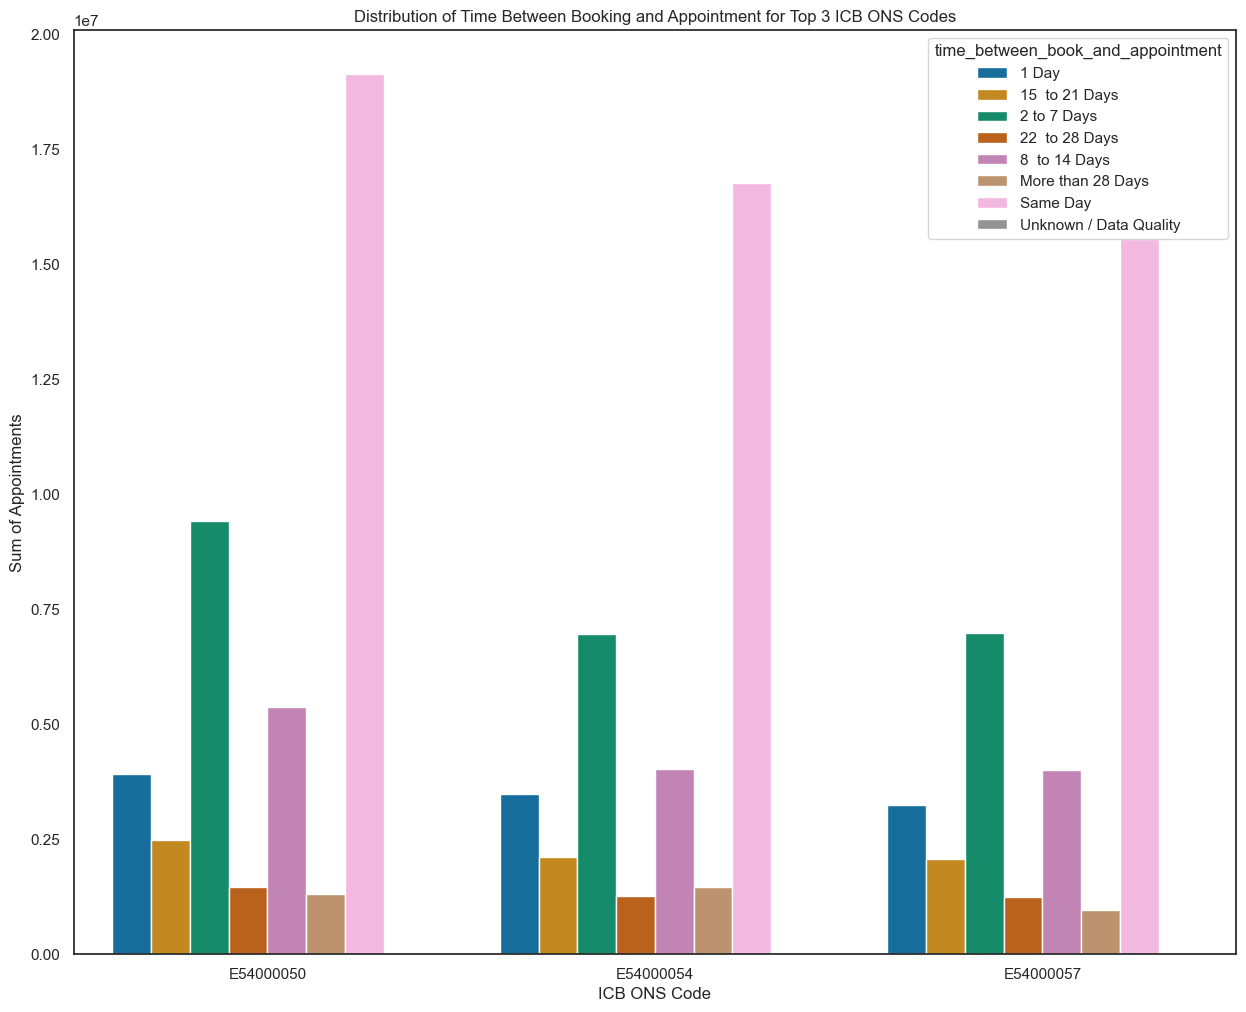

In [164]:
# Exploring the potential relationship between tbbaa and icb

# Calculate the sum of count_of_appointments for each icb_ons_code
icb_sum_counts_ar = ar.groupby("icb_ons_code")["count_of_appointments"].sum().reset_index()

# Sort and select the top 3 icb_ons_code values
top_icbs_ar = icb_sum_counts_ar.nlargest(3, "count_of_appointments")["icb_ons_code"]

# Filter the DataFrame for the top 3 icb_ons_code values
ar_top3 = ar[ar["icb_ons_code"].isin(top_icbs_ar)]

# Create a countplot with Seaborn
sns.barplot(
    x="icb_ons_code",
    y="count_of_appointments",
    hue="time_between_book_and_appointment",
    order=top_icbs_ar,
    palette="colorblind",
    estimator=sum,
    ci=None,
    data=ar_top3,
)

# Customize the plot
plt.title("Distribution of Time Between Booking and Appointment for Top 3 ICB ONS Codes")
plt.xlabel("ICB ONS Code")
plt.ylabel("Sum of Appointments")

> There is not much difference between the top 3

### Import and sense checking the NC data

In [165]:
# Import and sense-check 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx') 
print(nc.shape)

(817394, 8)


In [166]:
nc.head()  # View the DataFrame.

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [167]:
nc.tail()  # View the bottom of the DataFrame.

appointment_date icb_ons_code           sub_icb_location_name  \
817389       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817390       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817391       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817392       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817393       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   

                  service_setting            context_type  \
817389  Extended Access Provision  Care Related Encounter   
817390  Extended Access Provision  Care Related Encounter   
817391  Extended Access Provision  Care Related Encounter   
817392  Extended Access Provision  Care Related Encounter   
817393  Extended Access Provision  Care Related Encounter   

                   national_category  count_of_appointments appointment_month  
817389   Unplanned Clinical Activity                     12           2022-06  
817390               Planned Clinics                      4           2022-06  
817391    Planned Clinical Procedure                     92           2022-06  
817392  General Consultation Routine                      4           2022-06  
817393    General Consultation Acute                     19           2022-06

In [168]:
nc.isna().sum()  # Check for missing values.

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [169]:
# Review metadata

print(nc.dtypes)  # We start by discovering the data types

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [170]:
# Change the 'appointment_month' column to the correct data type
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'], format='%Y-%m')

# Change the 'appointment_date' column to the correct data type
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

In [171]:
nc.info() # Checking conversion success 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 49.9+ MB


In [172]:
nc.describe().round(2) # Describe the data with basic statistics

count_of_appointments
count              817394.00
mean                  362.18
std                  1084.58
min                     1.00
25%                     7.00
50%                    25.00
75%                   128.00
max                 16590.00

> A similar story to the other two datasets with large spread of data

> Again a large difference in the latter half of the IQR 

> Suggesting the dataset is front loaded

In [173]:
nc.describe(include = ['O']) # describe the data with basic statistics with just descriptive data

icb_ons_code              sub_icb_location_name   service_setting  \
count        817394                             817394            817394   
unique           42                                106                 5   
top       E54000057  NHS North West London ICB - W2U3Z  General Practice   
freq          59180                              13007            359274   

                  context_type     national_category  
count                   817394                817394  
unique                       3                    18  
top     Care Related Encounter  Inconsistent Mapping  
freq                    700481                 89494

> 42 icbs and 106 sub icbs

> 5 service settings, 3 context types and 18 national categories

### Initial exploratory visualisations of the AR data

(array([0, 1, 2]),
 [Text(0, 0, 'Care Related Encounter'),
  Text(1, 0, 'Inconsistent Mapping'),
  Text(2, 0, 'Unmapped')])

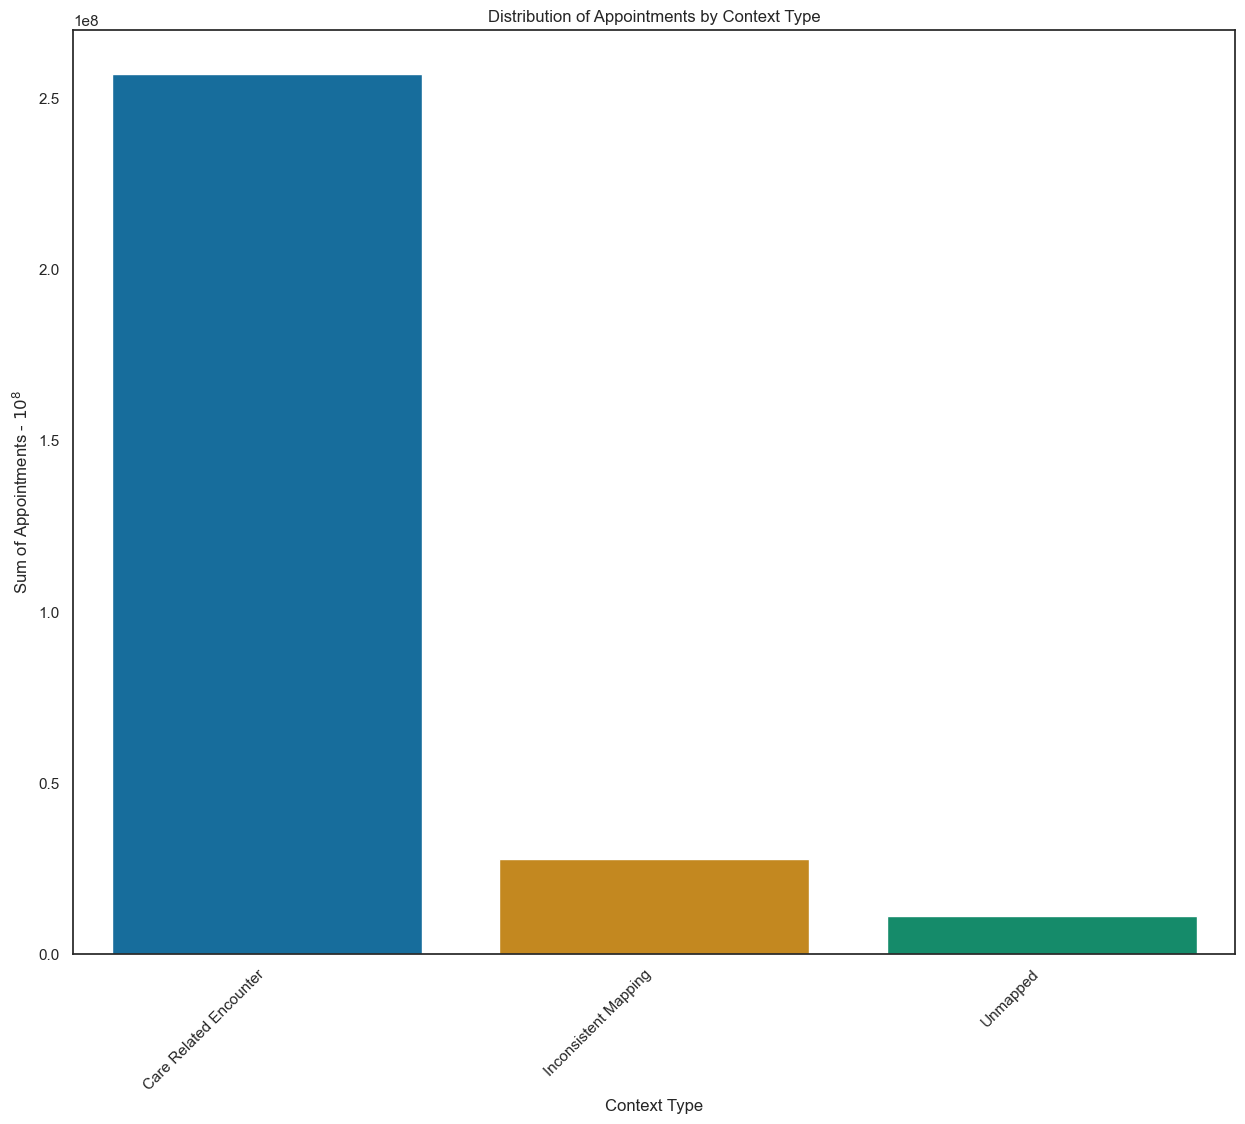

In [174]:
# Exploring the distribution of appointments by context type

# Grouping appointments by context type and summing the counts
nc_sum_con = nc.groupby('context_type')['count_of_appointments'].sum().reset_index()

# Using barplot to display the counts for each category
sns.barplot(x="context_type", y="count_of_appointments", data=nc_sum_con)

# Adding labels and title
plt.title("Distribution of Appointments by Context Type")
plt.xlabel("Context Type")
plt.ylabel("Sum of Appointments - $10^8$")  # To show 100,000,000's

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

> Data reporting and quality seems to be an issue again

> Care related encounter dominates

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'General Consultation Routine'),
  Text(1, 0, 'General Consultation Acute'),
  Text(2, 0, 'Clinical Triage'),
  Text(3, 0, 'Planned Clinics'),
  Text(4, 0, 'Inconsistent Mapping'),
  Text(5, 0, 'Planned Clinical Procedure'),
  Text(6, 0, 'Unmapped'),
  Text(7, 0, 'Unplanned Clinical Activity'),
  Text(8, 0, 'Home Visit'),
  Text(9, 0, 'Structured Medication Review'),
  Text(10, 0, 'Service provided by organisation external to the practice'),
  Text(11, 0, 'Patient contact during Care Home Round'),
  Text(12, 0, 'Care Home Visit'),
  Text(13, 0, 'Social Prescribing Service'),
  Text(14, 0, 'Walk-in'),
  Text(15, 0, 'Care Home Needs Assessment & Personalised Care and Support Planning'),
  Text(16, 0, 'Non-contractual chargeable work'),
  Text(17, 0, 'Group Consultation and Group Education')])

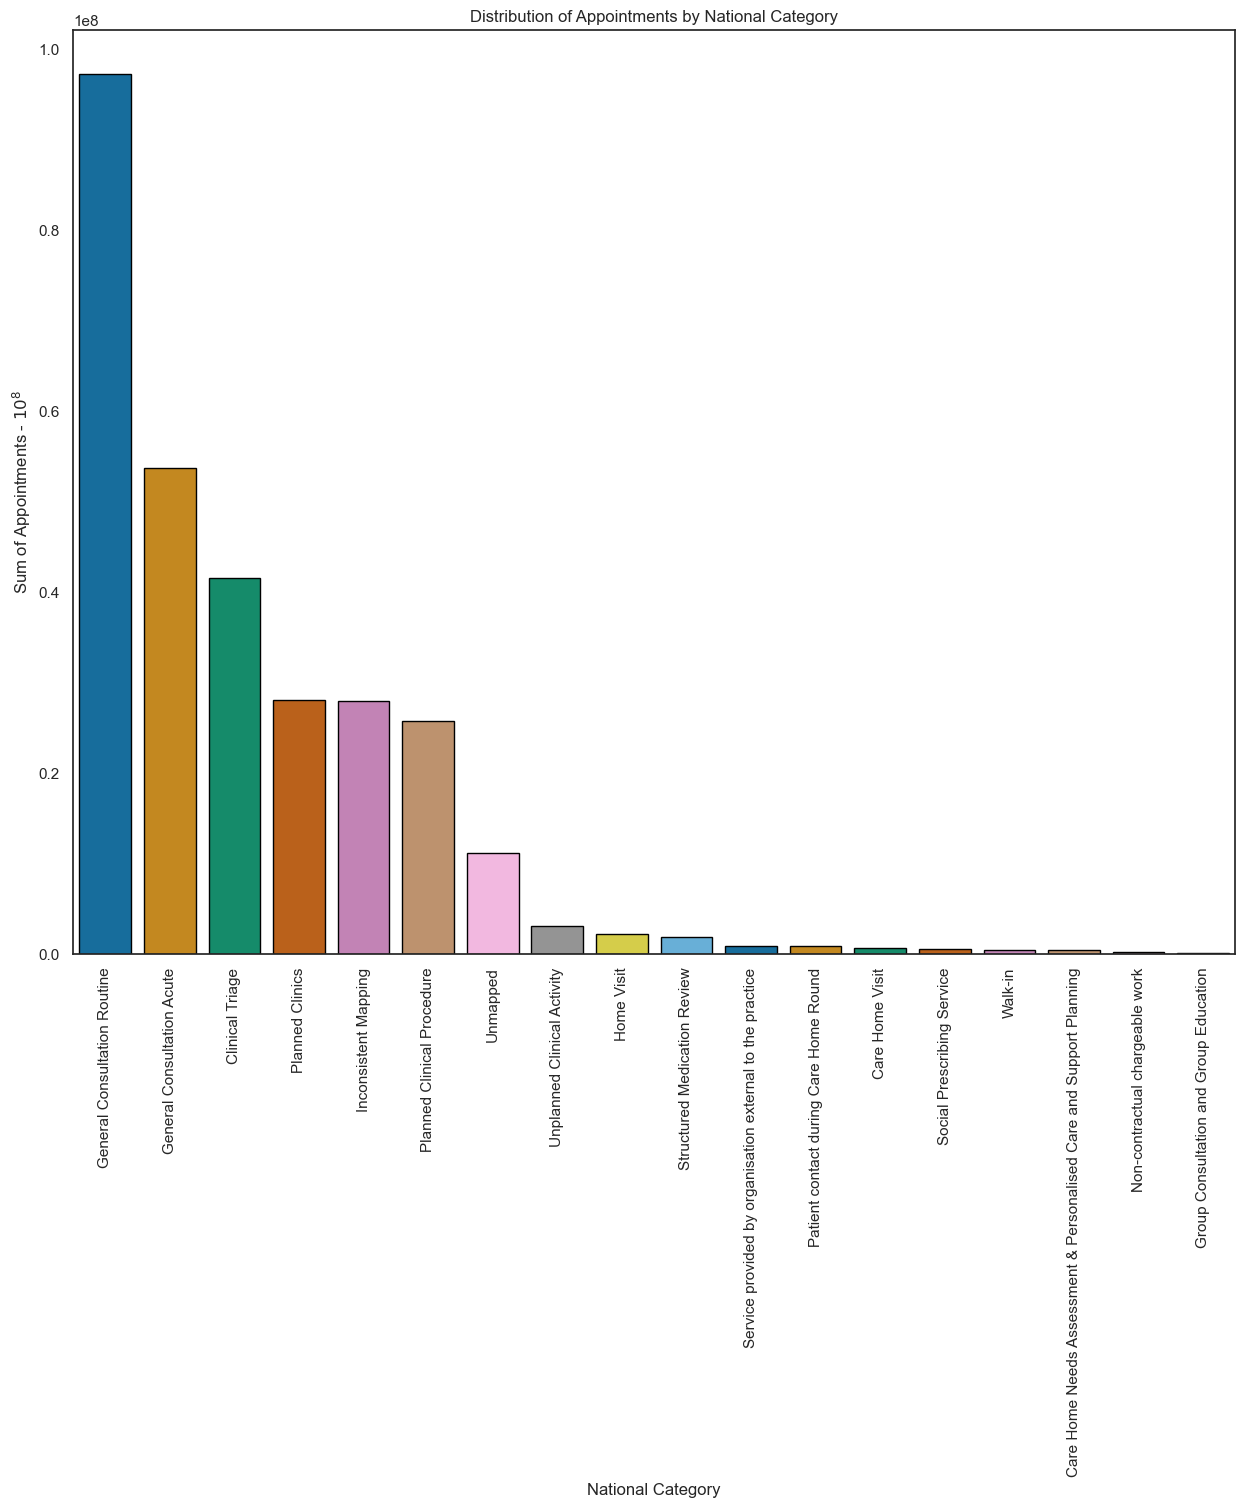

In [175]:
# Exploring the the distribution of appointments by national category


# Grouping appointments by national category and summing the counts
nc_sum = nc.groupby("national_category")["count_of_appointments"].sum().reset_index()

# Sorting the data by the sum of appointments in descending order
nc_sum = nc_sum.sort_values(by="count_of_appointments", ascending=False)

# Creating a bar plot
sns.barplot(
    x="national_category",
    y="count_of_appointments",
    data=nc_sum,
    palette="colorblind",
    edgecolor="black",
)

# Adding title and labels
plt.title("Distribution of Appointments by National Category")
plt.xlabel("National Category")
plt.ylabel("Sum of Appointments - $10^8$")  # To show 10,000,000's

# Rotating x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

> The top two are both general practice categories

> The common theme again, there is signficant data lacking

> Very small amount of appointments externally sourced

Text(0, 0.5, 'Sum of Appointments - $10^7$')

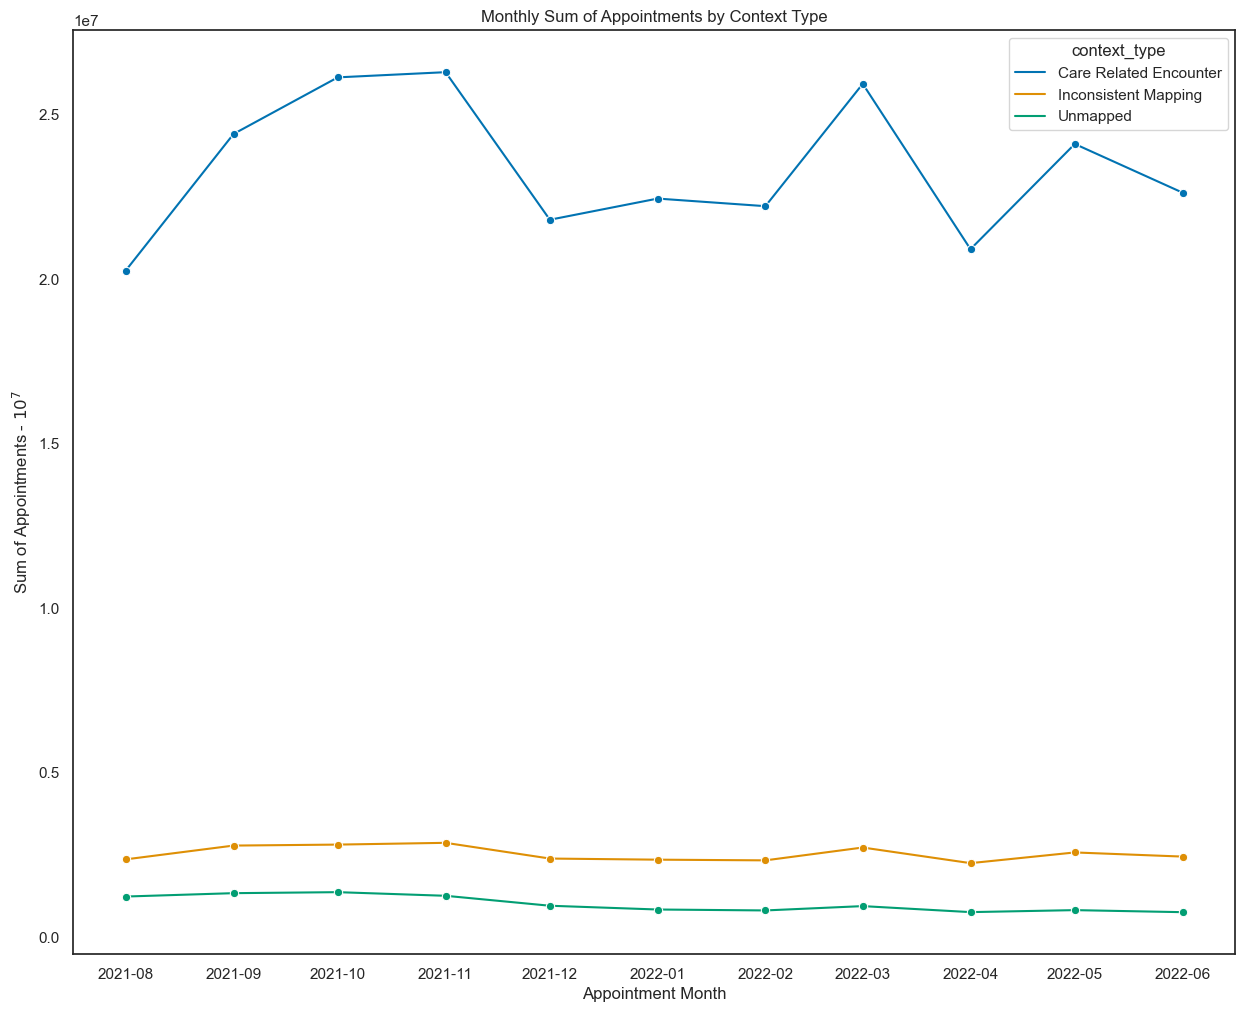

In [176]:
# Exploring context types by appointment sum over time

# Grouping by 'appointment_month' and 'context_type' and summing the counts
monthly_counts = (
    nc.groupby(["appointment_month", "context_type"])["count_of_appointments"]
    .sum()
    .reset_index()
)

# Using lineplot with the grouped data
sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="context_type",
    data=monthly_counts,
    marker="o",
)

# Adding labels and title
plt.title("Monthly Sum of Appointments by Context Type")
plt.xlabel("Appointment Month")
plt.ylabel("Sum of Appointments - $10^7$")  # To show 10,000,000's

> Unsually long dip for winter period could warrant investigation

Text(0.5, 1.0, 'Distribution of Appointments by Service Setting')

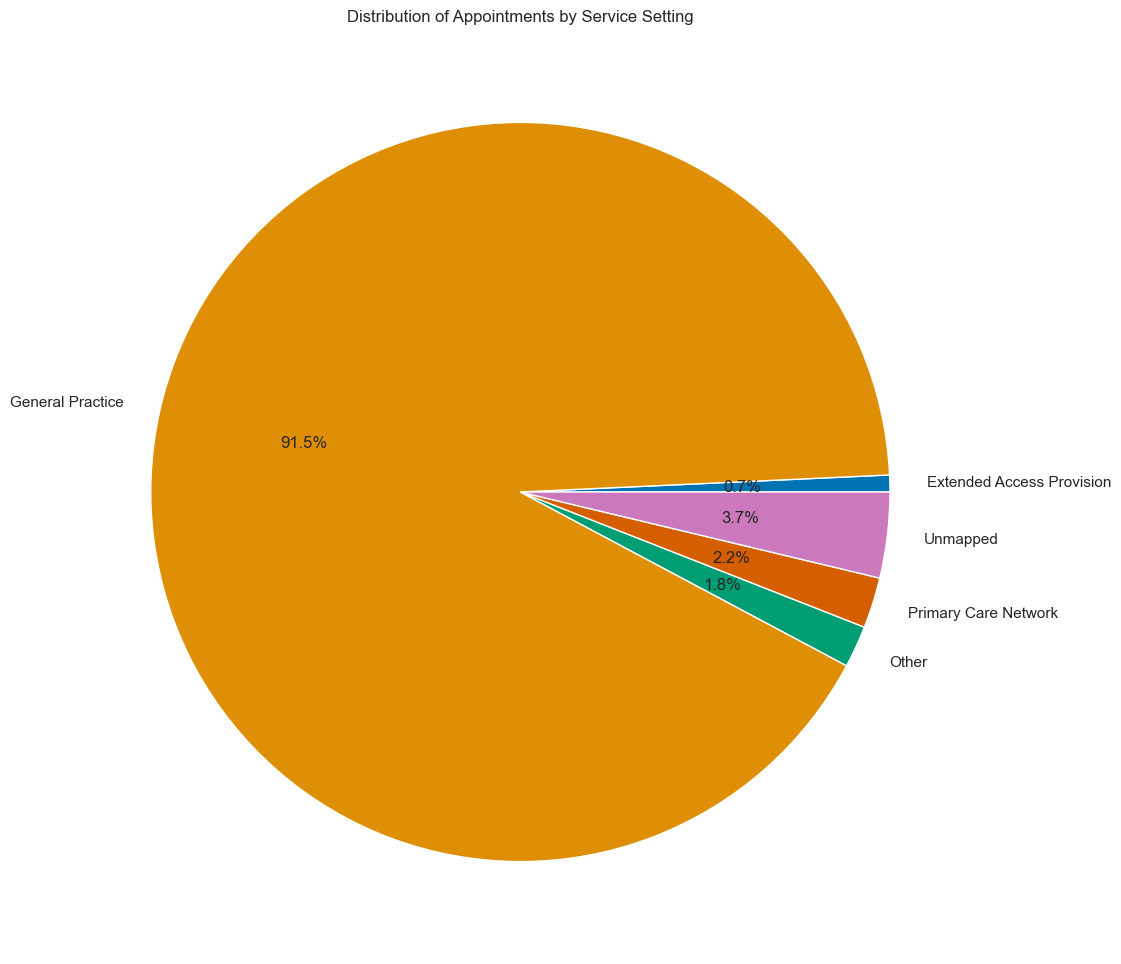

In [177]:
# Exploring other visualisations for service setting

# Calculate the sum of appointments for each service setting
nc_sum_ss = nc.groupby(["service_setting"])["count_of_appointments"].sum().reset_index()

# Create the pie chart
plt.pie(
    nc_sum_ss["count_of_appointments"],
    labels=nc_sum_ss["service_setting"],
    autopct="%1.1f%%",
)

# Add a title to the pie chart
plt.title("Distribution of Appointments by Service Setting")

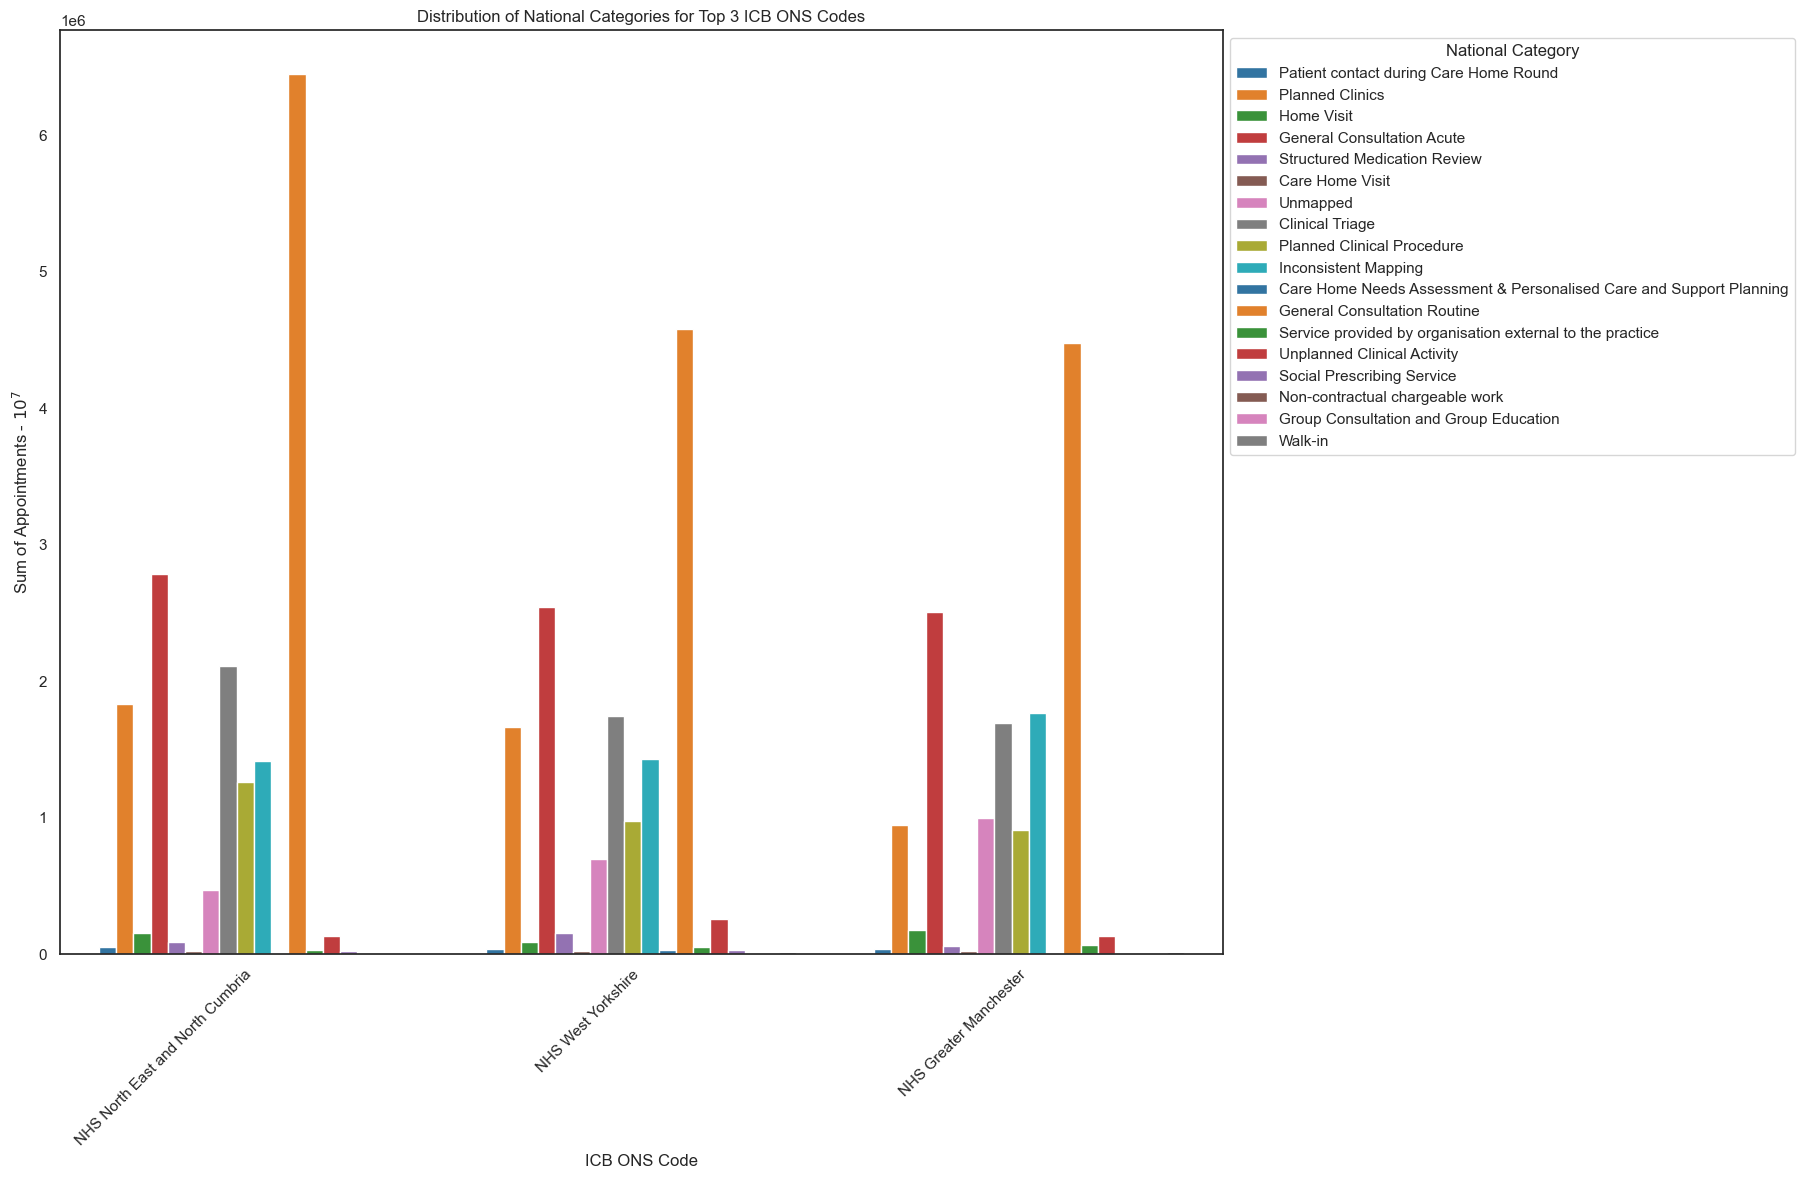

In [178]:
# Calculate the sum of count_of_appointments for each icb_ons_code and order by National Category
icb_sum_counts = nc.groupby('icb_ons_code')['count_of_appointments'].sum().reset_index()

# Sort and select the top 3 icb_ons_code values
top_icbs = icb_sum_counts.nlargest(3, 'count_of_appointments')['icb_ons_code']

# Define custom x-axis labels
custom_labels = [
    "NHS North East and North Cumbria",
    "NHS West Yorkshire",
    "NHS Greater Manchester"
]

# Filter the DataFrame for the top 3 icb_ons_code values
nc_top3 = nc[nc['icb_ons_code'].isin(top_icbs)]

# tab10 colour palette to distinguish plots. 
sns.barplot(x='icb_ons_code', y='count_of_appointments', hue='national_category', order=top_icbs, palette='tab10', estimator=sum, ci=None, data=nc_top3)
plt.title('Distribution of National Categories for Top 3 ICB ONS Codes')
plt.xlabel('ICB ONS Code')
plt.ylabel('Sum of Appointments - $10^7$')  # To show 1,000,000's

# Customize x-axis labels
plt.xticks(range(len(top_icbs)), custom_labels, rotation=45, ha='right')

# Add legend for national_category
plt.legend(title='National Category', bbox_to_anchor=(1, 1))

> Expected similar pattern across all three

### 2) Further refined exploration
With insights from basic statistics and visualisations it's time to fill in any knowledge gaps prior to answering the questions provided by the NHS.

#### How many locations are there in the data set?

In [179]:
# Determine the number of locations
# There are three possible levels of granularity.

# Using the actual_duration sheet, start with sub_icb.

# Calculate the number of unique sub_icb locations
number_of_locations = ad["sub_icb_location_ons_code"].nunique()

# Print the number of unique sub_icb locations
print(f"The number of unique sub_icb_locations is: {number_of_locations}")

The number of unique sub_icb_locations is: 106


In [180]:
# Next is the icb location count

# Calculate the number of unique icb locations
number_of_icb_locations = ad["icb_ons_code"].nunique()

# Print the number of unique icb locations
print(f"The number of unique icb_locations is: {number_of_icb_locations}")

The number of unique icb_locations is: 42


In [181]:
# Finally, the regional level location count
number_of_locations = ad["region_ons_code"].nunique()

# Print the number of unique regional locations
print(f"The number of unique regional locations is: {number_of_locations}")

The number of unique regional locations is: 7


#### What are the five locations with the highest number of appointments?

In [182]:
# There are three possible levels of granularity again.
# Using the actual_duration sheet I will start with sub_icb

# Group the DataFrame by 'sub_icb_location_ons_code' and sum the 'count_of_appointments'
sub_icb_locations = (
    ad.groupby(["sub_icb_location_ons_code", "sub_icb_location_name"])["count_of_appointments"]
    .sum()
)

# Sort the locations by the number of appointments in descending order and take the top 5
top_five_locations = sub_icb_locations.sort_values(ascending=False).head(5)

# Print the top five locations
print("Five locations with the highest number of appointments at a sub_icb_level:")
print(top_five_locations)

Five locations with the highest number of appointments at a sub_icb_level:
sub_icb_location_ons_code  sub_icb_location_name                      
E38000256                  NHS North West London ICB - W2U3Z              6976986
E38000255                  NHS North East London ICB - A3A8R              5341883
E38000237                  NHS Kent and Medway ICB - 91Q                  5209641
E38000253                  NHS Hampshire and Isle Of Wight ICB - D9Y0V    4712737
E38000244                  NHS South East London ICB - 72Q                4360079
Name: count_of_appointments, dtype: int64


In [183]:
# Group the DataFrame by 'icb_ons_code' and sum the 'count_of_appointments'
icb_locations = ad.groupby(["icb_ons_code"])["count_of_appointments"].sum()

# Sort the locations by the number of appointments in descending order and take the top 5
top_five_locations = icb_locations.sort_values(ascending=False).head(5)

# Add the ibc_location_name data using ONS provided data
top_five_locations["ibc_location_name"] = [
    "NHS North East and North Cumbria Integrated Care Board",
    "NHS West Yorkshire Integrated Care Board",
    "NHS Greater Manchester Integrated Care Board",
    "NHS Cheshire and Merseyside Integrated Care Board",
    "NHS North West London Integrated Care Board",
]

print("Five locations with the highest number of appointments at an icb_level:")
print(top_five_locations)

Five locations with the highest number of appointments at an icb_level:
icb_ons_code
E54000050                                                                                                                                                                                                            9584943
E54000054                                                                                                                                                                                                            8291440
E54000057                                                                                                                                                                                                            7650341
E54000008                                                                                                                                                                                                            7344348
E54000027                      

In [184]:
# Group the DataFrame by 'region_ons_code' and sum the 'count_of_appointments'
regional_locations = ad.groupby(["region_ons_code"])["count_of_appointments"].sum()

# Sort the locations by the number of appointments in descending order and take the top 5
top_five_locations = regional_locations.sort_values(ascending=False).head(5)

# Manually add in the 'icb_location_name' data from ONS provided data
top_five_locations["region_location_name"] = [
    "Midlands",
    "North East and Yorkshire",
    "South East",
    "London",
    "North West",
]

# Display the five locations with the highest number of appointments
print("Five locations with the highest number of appointments at a regional level:")
print(top_five_locations)

Five locations with the highest number of appointments at a regional level:
region_ons_code
E40000011                                                                           32574555
E40000012                                                                           27425610
E40000005                                                                           25577953
E40000003                                                                           24488519
E40000010                                                                           19880924
region_location_name    [Midlands, North East and Yorkshire, South East, London, North West]
Name: count_of_appointments, dtype: object


#### How many service settings, context types, national categories, and appointment statuses are there?

In [185]:
# Determine the number of service settings

# Calculate the number of unique service settings
number_of_service_settings = nc["service_setting"].nunique()

# Print the number of unique service settings
print(f"The number of unique service_settings is: {number_of_service_settings}")

The number of unique service_settings is: 5


In [186]:
# Determine the number of context types.

# Calculate the number of unique context types settings
number_of_context_types = nc['context_type'].nunique()

print(f"The number of unique context_types is: {number_of_context_types}")

The number of unique context_types is: 3


In [187]:
# Determine the number of national categories.

# Calculate the number of unique national categories settings
number_of_national_categories = nc['national_category'].nunique()

print(f"The number of unique national_catagories is: {number_of_national_categories}")

The number of unique national_catagories is: 18


In [188]:
# Determine the number of appointment statuses.
# I will be using the appointments_regional sheet

# Calculate the number of unique appointment statuses
number_of_appointment_statuses = ar['appointment_status'].nunique()

print(f"The number of unique appointment_statuses is: {number_of_appointment_statuses}")

The number of unique appointment_statuses is: 3


> All data here linking up well with the original sense checking of the data during the initial import phase.

# 

## 3) Addressing specific questions posed by the NHS

### Continuing to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [189]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0       2021-12-01           31-60 Minutes                    364  
1       2021-12-01           21-30 Minutes                    619  
2       2021-12-01            6-10 Minutes                   1698  
3       2021-12-01  Unknown / Data Quality                   1277  
4       2021-12-01           16-20 Minutes                    730

In [190]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0        2021-08-01  
1        2021-08-01  
2        2021-08-01  
3        2021-08-01  
4        2021-08-01

In [191]:
# Change the 'appointment_date' column to the correct data type in ad
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# Change the 'appointment_month' column to the correct data type in ar
ar["appointment_month"] = pd.to_datetime(
    ar["appointment_month"], format="%Y-%m"
)  

# Change the 'appointment_month' column to the correct data type in nc
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'], format='%Y-%m')

# Change the 'appointment_date' column to the correct data type in nc
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Confirm in the DataFrame.
ad.info()
ar.info()
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   sub_icb_location_code      137793 non-null  object        
 1   sub_icb_location_ons_code  137793 non-null  object        
 2   sub_icb_location_name      137793 non-null  object        
 3   icb_ons_code               137793 non-null  object        
 4   region_ons_code            137793 non-null  object        
 5   appointment_date           137793 non-null  datetime64[ns]
 6   actual_duration            137793 non-null  object        
 7   count_of_appointments      137793 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 8.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype         

In [192]:
# Determining the minimum and maximum dates in the ad DataFrame

# Finding the maximum date in the 'appointment_date' column
maximum_date = ad["appointment_date"].max().strftime("%Y-%m-%d")

# Finding the minimum date in the 'appointment_date' column
minimum_date = ad["appointment_date"].min().strftime("%Y-%m-%d")

# Printing the minimum and maximum dates
print(
    f"The actual_duration sheet daily date info ranges between {minimum_date} and {maximum_date}"
)

The actual_duration sheet daily date info ranges between 2021-12-01 and 2022-06-30


In [193]:
# Determining the minimum and maximum dates in the ar DataFrame

# Using min()/max() to find formated dates in the ar 'appointment_month' column only 
maximum_date = ar['appointment_month'].max().strftime('%Y-%m')
minimum_date = ar['appointment_month'].min().strftime('%Y-%m')

print(
    f"The appointments_regional sheet monthly date info ranges between {minimum_date} and {maximum_date} "
)

The appointments_regional sheet monthly date info ranges between 2020-01 and 2022-06 


In [194]:
# Determining the minimum and maximum dates in the nc DataFrame

# Find the maximum formatted date in the 'appointment_month' column
maximum_date_month = nc["appointment_month"].max().strftime("%Y-%m")

# Find the minimum formatted date in the 'appointment_month' column
minimum_date_month = nc["appointment_month"].min().strftime("%Y-%m")

# Find the maximum formatted date in the 'appointment_date' column
maximum_date_date = nc["appointment_date"].max().strftime("%Y-%m-%d")

# Find the minimum formatted date in the 'appointment_date' column
minimum_date_date = nc["appointment_date"].min().strftime("%Y-%m-%d")

print(
    f"The national_catagories sheet monthly date info ranges between {minimum_date_month} and {maximum_date_month} "
)
print(
    f"The national_catagories sheet daily date info ranges between {minimum_date_date} and {maximum_date_date} "
)

# Confirm that the dates are consistent

The national_catagories sheet monthly date info ranges between 2021-08 and 2022-06 
The national_catagories sheet daily date info ranges between 2021-08-01 and 2022-06-30 


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [195]:
# Creating a subset of the DataFrame with specific columns and filtering conditions
nc_subset = nc.loc[
    (nc["sub_icb_location_name"] == "NHS North West London ICB - W2U3Z") &
    (nc["appointment_month"] >= "2022-01-01") &
    (nc["appointment_month"] <= "2022-06-01")
][
    [
        "sub_icb_location_name",
        "appointment_month",
        "service_setting",
        "count_of_appointments",
    ]
]

# Sort the subset DataFrame by 'count_of_appointments' in descending order
nc_subset = nc_subset.sort_values(by="count_of_appointments", ascending=False)

# View the sorted subset
nc_subset.head(10)

sub_icb_location_name appointment_month   service_setting  \
806598  NHS North West London ICB - W2U3Z        2022-06-01  General Practice   
805547  NHS North West London ICB - W2U3Z        2022-05-01  General Practice   
805256  NHS North West London ICB - W2U3Z        2022-05-01  General Practice   
805832  NHS North West London ICB - W2U3Z        2022-05-01  General Practice   
805595  NHS North West London ICB - W2U3Z        2022-05-01  General Practice   
805311  NHS North West London ICB - W2U3Z        2022-05-01  General Practice   
807145  NHS North West London ICB - W2U3Z        2022-06-01  General Practice   
805872  NHS North West London ICB - W2U3Z        2022-05-01  General Practice   
806880  NHS North West London ICB - W2U3Z        2022-06-01  General Practice   
803142  NHS North West London ICB - W2U3Z        2022-03-01  General Practice   

        count_of_appointments  
806598                  15324  
805547                  15056  
805256                  14964  
805832                  14907  
805595                  14904  
805311                  14818  
807145                  14738  
805872                  14702  
806880                  14701  
803142                  14597

**Question 3:** Which month had the highest number of appointments?

In [196]:
# Grouping appointments by year and month and summing the counts
count_of_appointments_per_month = nc["count_of_appointments"].groupby(
    [
        nc["appointment_date"].dt.year,
        nc["appointment_date"].dt.month,
    ]
).sum()

# Sorting the appointments in descending order
count_of_appointments_per_month = count_of_appointments_per_month.sort_values(ascending=False)

# Taking the top 1 entry
top = count_of_appointments_per_month.head(1)

# Extracting the year and month from the index of the top entry
top_year, top_month = top.index[0]

# Printing the result for the highest appointment count
print(
    f"The month with the highest appointment count is month {top_month} in {top_year}."
)

The month with the highest appointment count is month 11 in 2021.


**Question 4:** What was the total number of records per month?

In [197]:
# Total number of records per month in the nc sheet

# Grouping appointments by year and month and summing the counts
nc_count_of_appointments_per_month = (
    nc["count_of_appointments"].groupby(
        [nc["appointment_date"].dt.year, nc["appointment_date"].dt.month]
    )
    .sum()
)

# Sorting the appointments in descending order
nc_count_of_appointments_per_month = nc_count_of_appointments_per_month.sort_values(
    ascending=False
)

# Extracting the year and month from the index of the top entry
top_year, top_month = nc_count_of_appointments_per_month.index[0]

# Printing the result for the highest appointment count
print(
    f"The month with the highest appointment count in the nc sheet is "
    f"month {top_month} in year {top_year}."
)
print("\n")

# Printing the total number of records across all months in the nc sheet
print("The total number of records across all months in the nc sheet is:")
print(nc_count_of_appointments_per_month)

The month with the highest appointment count in the nc sheet is month 11 in year 2021.


The total number of records across all months in the nc sheet is:
appointment_date  appointment_date
2021              11                  30405070
                  10                  30303834
2022              3                   29595038
2021              9                   28522501
2022              5                   27495508
                  6                   25828078
                  1                   25635474
                  2                   25355260
2021              12                  25140776
2022              4                   23913060
2021              8                   23852171
Name: count_of_appointments, dtype: int64


In [198]:
# Total number of records per month in the ad sheet

# Grouping appointments by year and month and summing the counts
ad_count_of_appointments_per_month = ad["count_of_appointments"].groupby(
    [ad["appointment_date"].dt.year, ad["appointment_date"].dt.month]
).sum()

# Sorting the appointments in descending order
ad_count_of_appointments_per_month = (
    ad_count_of_appointments_per_month.sort_values(ascending=False)
)

# Extracting the year and month from the index of the top entry
top_year, top_month = ad_count_of_appointments_per_month.index[0]

# Printing the result for the highest appointment count
print(
    f"The month with the highest appointment count in the ad sheet is "
    f"month {top_month} in year {top_year}."
)

# Printing the total number of records across all months in the ad sheet
print("\n")
print("The total number of records across all months in the ad sheet is:")
print("\n")
print(ad_count_of_appointments_per_month)

The month with the highest appointment count in the ad sheet is month 3 in year 2022.


The total number of records across all months in the ad sheet is:


appointment_date  appointment_date
2022              3                   27170002
                  5                   25343941
                  6                   23715317
                  1                   23597196
                  2                   23351939
2021              12                  22853483
2022              4                   21948814
Name: count_of_appointments, dtype: int64


In [199]:
# Total number of records per month in the ar sheet
# Grouping appointments by year and month and summing the counts
ar_count_of_appointments_per_month = ar['count_of_appointments'].groupby(
    [
        ar['appointment_month'].dt.year,
        ar['appointment_month'].dt.month
    ]
).sum()

# Sorting the appointments in descending order
ar_count_of_appointments_per_month = ar_count_of_appointments_per_month.sort_values(
    ascending=False
)

# Extracting the year and month from the index of the top entry
top_year, top_month = ar_count_of_appointments_per_month.index[0]

# Printing the result for the highest appointment count
print(
    f"The month with the highest appointment count in the ar sheet is "
    f"month {top_month} in year {top_year}."
)
print("\n")

print("The total number of records across all months in the ar sheet is:")
print(ar_count_of_appointments_per_month)

The month with the highest appointment count in the ar sheet is month 11 in year 2021.


The total number of records across all months in the ar sheet is:
appointment_month  appointment_month
2021               11                   30405070
                   10                   30303834
2022               3                    29595038
2021               9                    28522501
2020               10                   28301932
2022               5                    27495508
2021               3                    27225424
2020               1                    27199296
2021               6                    26784182
2020               9                    26714255
2022               6                    25828078
2021               7                    25739219
2022               1                    25635474
                   2                    25355260
2021               12                   25140776
2020               11                   25061602
                   2    

# 

## 4) Time based analysis

For further reference:
The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

### Create visualisations and identify possible monthly and seasonal trends in the data.

Creating three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

#### Service Setting:

In [200]:
# Change the data type of the appointment month to string to allow for easier plotting.
# We check the appointment_month data type first for the nc dataframe

print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month        datetime64[ns]
dtype: object


In [201]:
# Change the data type to a string for ease of plotting
nc['appointment_month'] = nc['appointment_month'].astype("string")

In [202]:
# Check the data type again

print(nc.dtypes)  # Success 

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                string
dtype: object


In [203]:
# Aggregate on a monthly level and determine the sum of service setting appointments per month

# Grouping appointments by 'appointment_month' and 'service_setting' and summing the counts
nc_ss = (
    nc.groupby(["appointment_month", "service_setting"])
    .agg({"count_of_appointments": "sum"})
    .reset_index()
)

# View the data but with limit so as not to use too many resources

print(nc_ss.head(15))

   appointment_month            service_setting  count_of_appointments
0         2021-08-01  Extended Access Provision                 160927
1         2021-08-01           General Practice               21575852
2         2021-08-01                      Other                 449101
3         2021-08-01       Primary Care Network                 432448
4         2021-08-01                   Unmapped                1233843
5         2021-09-01  Extended Access Provision                 187906
6         2021-09-01           General Practice               25940821
7         2021-09-01                      Other                 527174
8         2021-09-01       Primary Care Network                 530485
9         2021-09-01                   Unmapped                1336115
10        2021-10-01  Extended Access Provision                 209539
11        2021-10-01           General Practice               27606171
12        2021-10-01                      Other                 556487
13    

In [204]:
# Calculate the highest sum of count of appointments for each service setting by month

# Group appointments by 'appointment_month' and 'service_setting', summing counts and resetting index
highest_totals_ss = nc_ss.groupby(["appointment_month", "service_setting"])[
    "count_of_appointments"
].sum().reset_index()

# Filter to only include the highest count for each service setting
highest_totals_ss = highest_totals_ss.loc[
    highest_totals_ss.groupby("service_setting")["count_of_appointments"].idxmax()
]

# Sort by highest 'count_of_appointments'
highest_totals_ss_sorted = highest_totals_ss.sort_values(by="count_of_appointments", ascending=False)

# Print the sorted DataFrame
print(highest_totals_ss_sorted)

   appointment_month            service_setting  count_of_appointments
16        2021-11-01           General Practice               27767889
14        2021-10-01                   Unmapped                1366656
48        2022-05-01       Primary Care Network                 712280
17        2021-11-01                      Other                 558784
35        2022-03-01  Extended Access Provision                 231905


In [205]:
# Calculate the lowest sum of count of appointments for each service setting by month
lowest_totals_ss = nc_ss.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()
lowest_totals_ss = lowest_totals_ss.loc[lowest_totals_ss.groupby('service_setting')['count_of_appointments'].idxmin()]

# Sort by lowest count_of_appointments
lowest_totals_ss_sorted = lowest_totals_ss.sort_values(by='count_of_appointments', ascending=True)

print(lowest_totals_ss_sorted)

   appointment_month            service_setting  count_of_appointments
0         2021-08-01  Extended Access Provision                 160927
3         2021-08-01       Primary Care Network                 432448
42        2022-04-01                      Other                 437402
54        2022-06-01                   Unmapped                 758640
1         2021-08-01           General Practice               21575852


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2021-08-01'),
  Text(1, 0, '2021-09-01'),
  Text(2, 0, '2021-10-01'),
  Text(3, 0, '2021-11-01'),
  Text(4, 0, '2021-12-01'),
  Text(5, 0, '2022-01-01'),
  Text(6, 0, '2022-02-01'),
  Text(7, 0, '2022-03-01'),
  Text(8, 0, '2022-04-01'),
  Text(9, 0, '2022-05-01'),
  Text(10, 0, '2022-06-01')])

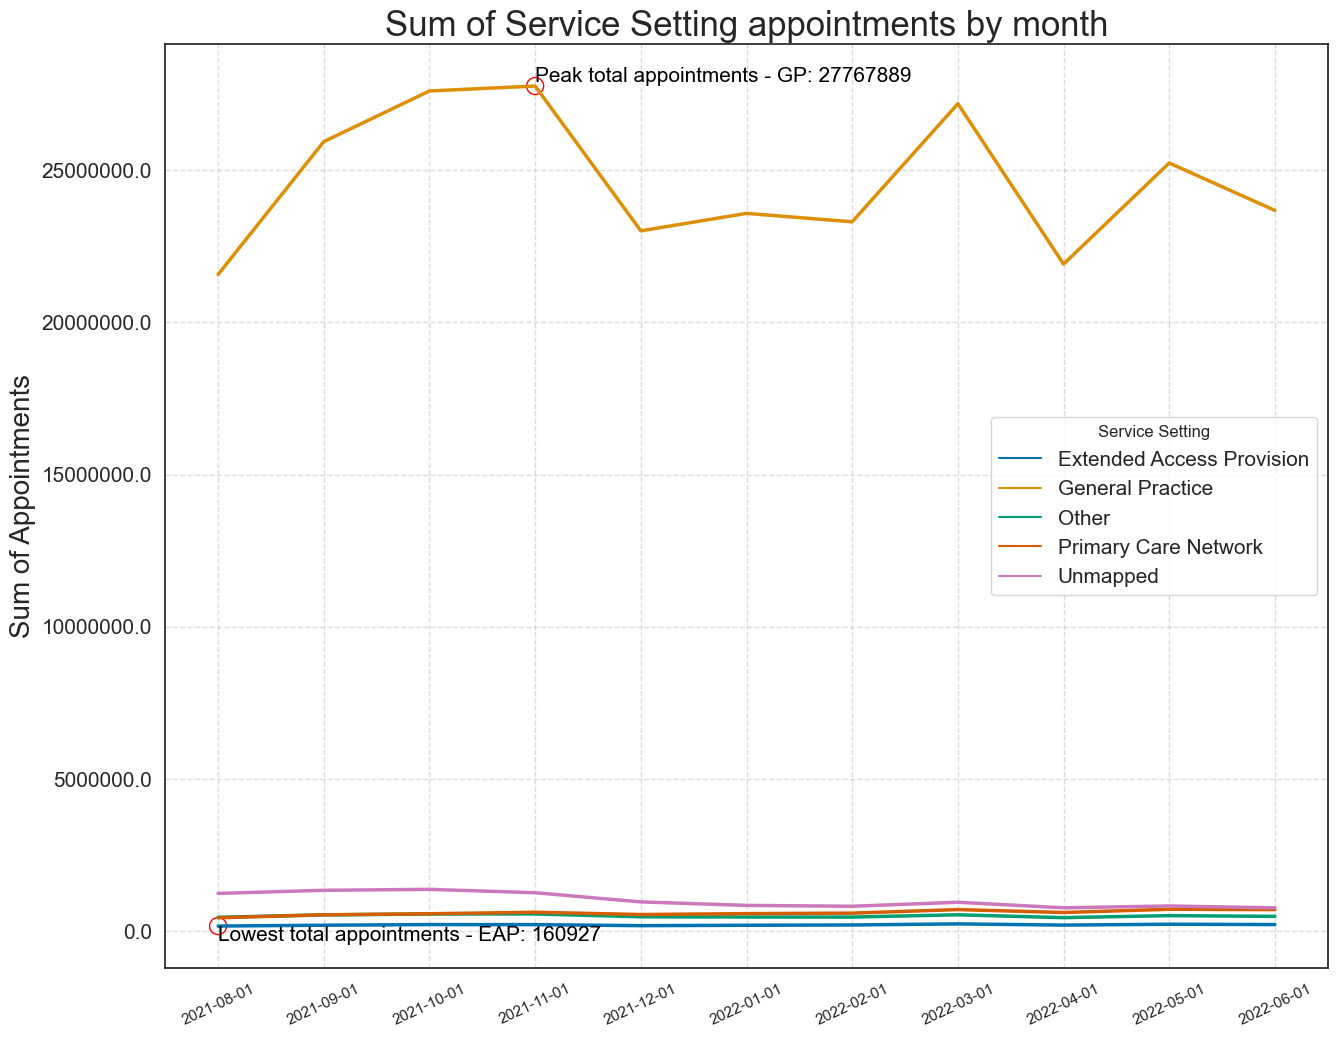

In [206]:
# Having sorted and calculated the data for service setting, let's now plot the visualization

# Grouping appointments by month and service setting and summing the counts
nc_ss = nc.groupby(["appointment_month", "service_setting"]).agg(
    {"count_of_appointments": "sum"}
).reset_index()

# Create a simple lineplot
ax_ss = sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="service_setting",
    ci=None,
    linewidth=2.5,
    data=nc_ss,
)

# Filter the data for the highest point
highest_month_gp = "2021-11-01"
specific_service_setting_gp = "General Practice"

highest_point_gp = nc_ss[
    (nc_ss["appointment_month"] == highest_month_gp)
    & (nc_ss["service_setting"] == specific_service_setting_gp)
]

# Plot the red annotation
ax_ss.scatter(
    x=highest_point_gp["appointment_month"],
    y=highest_point_gp["count_of_appointments"],
    facecolors="none",
    edgecolors="red",
    s=150,
    marker="o",
)

# Add text annotation
x_point = highest_point_gp["appointment_month"].values[0]
y_point = highest_point_gp["count_of_appointments"].values[0]
annotation_text = f"Peak total appointments - GP: {y_point}"
ax_ss.text(
    x_point,
    y_point,
    annotation_text,
    fontsize=15,
    color="black",
    ha="left",
    va="bottom",
)

# Filter the data for the lowest point
lowest_month_eap = "2021-08-01"
specific_service_setting_eap = "Extended Access Provision"

lowest_point_eap = nc_ss[
    (nc_ss["appointment_month"] == lowest_month_eap)
    & (nc_ss["service_setting"] == specific_service_setting_eap)
]

# Plot the red annotation
ax_ss.scatter(
    x=lowest_point_eap["appointment_month"],
    y=lowest_point_eap["count_of_appointments"],
    facecolors="none",
    edgecolors="red",
    s=150,
    marker="o",
)

# Add text annotation
x_point = lowest_point_eap["appointment_month"].values[0]
y_point = lowest_point_eap["count_of_appointments"].values[0]
annotation_text = f"Lowest total appointments - EAP: {y_point}"
ax_ss.text(
    x_point,
    y_point,
    annotation_text,
    fontsize=15,
    color="black",
    ha="left",
    va="top",
)

# Change tick label size
ax_ss.set_yticklabels(ax_ss.get_yticks(), size=15)

# Add labels and title
plt.xlabel("", fontsize=0)
plt.ylabel("Sum of Appointments", fontsize=20)
plt.title(
    "Sum of Service Setting appointments by month", fontsize=25
)

# Adjusting for a wide range in service setting data by making scale logarithmic
# plt.yscale("log") - Use at your own discretion

# Add gridlines
ax_ss.grid(True, linestyle="--", alpha=0.7)

# Create legend with adjusted size and position
legend = ax_ss.legend(title="Service Setting", fontsize=15, loc="center right")

# Rotate x-axis labels for better readability
plt.xticks(rotation=25)

> Log has been used to explore the clustered lower half

> Allowing us to see Unmapped heading downwards

> Also PCN rising slowly throughout the year possible due to funding, see [here](https://www.england.nhs.uk/primary-care/primary-care-networks/network-contract-des/iif/) for justification. 

> Data is the same totals as our previous calculations

**Context types:**

In [207]:
# Grouping appointments by month and context type and summing the counts
nc_ct = nc.groupby(['appointment_month', 'context_type']).agg({'count_of_appointments': 'sum'}).reset_index()

print(nc_ct.head(15))  # View the output.

   appointment_month            context_type  count_of_appointments
0         2021-08-01  Care Related Encounter               20255235
1         2021-08-01    Inconsistent Mapping                2363093
2         2021-08-01                Unmapped                1233843
3         2021-09-01  Care Related Encounter               24404251
4         2021-09-01    Inconsistent Mapping                2782135
5         2021-09-01                Unmapped                1336115
6         2021-10-01  Care Related Encounter               26125201
7         2021-10-01    Inconsistent Mapping                2811977
8         2021-10-01                Unmapped                1366656
9         2021-11-01  Care Related Encounter               26282778
10        2021-11-01    Inconsistent Mapping                2865796
11        2021-11-01                Unmapped                1256496
12        2021-12-01  Care Related Encounter               21798612
13        2021-12-01    Inconsistent Mapping    

In [208]:
# Calculate the highest sum of count of appointments for each context type by month

# Group by 'appointment_month' and 'context_type' and calculate the sum of 'count_of_appointments'
highest_totals_ct = nc_ct.groupby(["appointment_month", "context_type"])[
    "count_of_appointments"
].sum().reset_index()

# Filter the DataFrame to only include the highest sum of count_of_appointments for each context type
highest_totals_ct = highest_totals_ct.loc[
    highest_totals_ct.groupby("context_type")["count_of_appointments"].idxmax()
]

# Sort the DataFrame by 'count_of_appointments' in descending order
highest_totals_ct_sorted = highest_totals_ct.sort_values(by="count_of_appointments", ascending=False)

# Print the sorted DataFrame
print(highest_totals_ct_sorted)

   appointment_month            context_type  count_of_appointments
9         2021-11-01  Care Related Encounter               26282778
10        2021-11-01    Inconsistent Mapping                2865796
8         2021-10-01                Unmapped                1366656


In [209]:
# Calculate the lowest sum of count of appointments for each context type by month
lowest_totals_ct = (
    nc_ct.groupby(["appointment_month", "context_type"])["count_of_appointments"]
    .sum()
    .reset_index()
)

# Filter for the lowest count of appointments for each context type
lowest_totals_ct = lowest_totals_ct.loc[
    lowest_totals_ct.groupby("context_type")["count_of_appointments"].idxmin()
]

# Sort by lowest count_of_appointments
lowest_totals_ct_sorted = lowest_totals_ct.sort_values(by="count_of_appointments", ascending=True)

# Display the results
print(lowest_totals_ct_sorted)

   appointment_month            context_type  count_of_appointments
32        2022-06-01                Unmapped                 758640
25        2022-04-01    Inconsistent Mapping                2248554
0         2021-08-01  Care Related Encounter               20255235


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2021-08-01'),
  Text(1, 0, '2021-09-01'),
  Text(2, 0, '2021-10-01'),
  Text(3, 0, '2021-11-01'),
  Text(4, 0, '2021-12-01'),
  Text(5, 0, '2022-01-01'),
  Text(6, 0, '2022-02-01'),
  Text(7, 0, '2022-03-01'),
  Text(8, 0, '2022-04-01'),
  Text(9, 0, '2022-05-01'),
  Text(10, 0, '2022-06-01')])

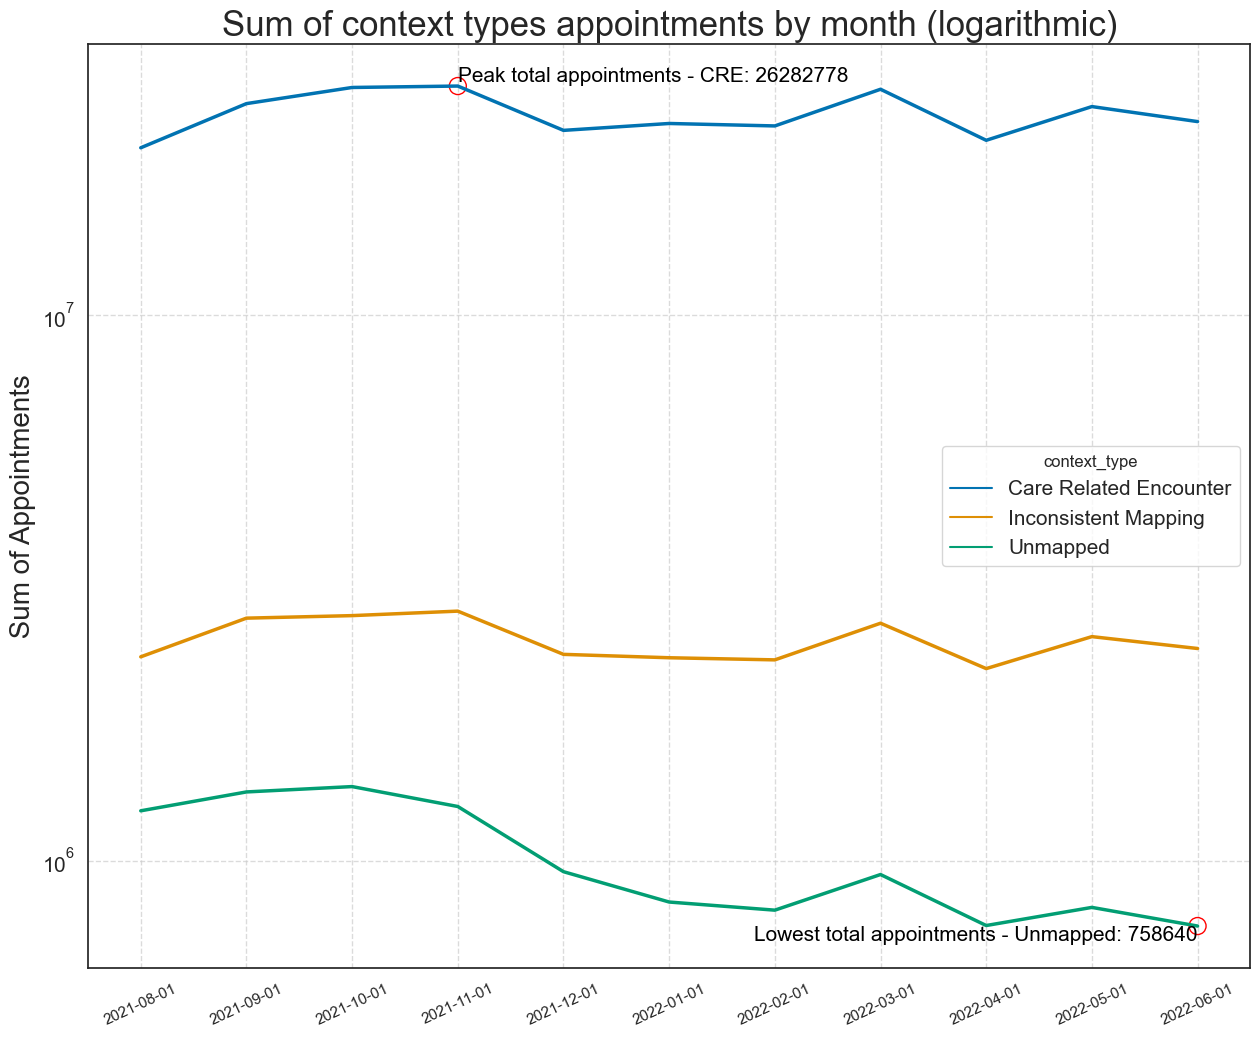

In [210]:
# Having sorted and calculated the data for context types, let's now plot the visualization

# Grouping appointments by month and context type and summing the counts
nc_ct = (
    nc.groupby(["appointment_month", "context_type"])
    .agg({"count_of_appointments": "sum"})
    .reset_index()
)

# Create a simple lineplot.
ax_ct = sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="context_type",
    ci=None,
    linewidth=2.5,
    data=nc_ct,
)

# Filter the data for the highest point
highest_month_cre = "2021-11-01"
specific_context_type_cre = "Care Related Encounter"

highest_point_cre = nc_ct[
    (nc_ct["appointment_month"] == highest_month_cre)
    & (nc_ct["context_type"] == specific_context_type_cre)
]

# Plot the red annotation
ax_ct.scatter(
    x=highest_point_cre["appointment_month"],
    y=highest_point_cre["count_of_appointments"],
    facecolors="none",
    edgecolors="red",
    s=150,
    marker="o",
)

# Add text annotation
x_point = highest_point_cre["appointment_month"].values[0]
y_point = highest_point_cre["count_of_appointments"].values[0]
annotation_text = f"Peak total appointments - CRE: {y_point}"
ax_ct.text(
    x_point,
    y_point,
    annotation_text,
    fontsize=15,
    color="black",
    ha="left",
    va="bottom",
)

# Filter the data for the lowest point
lowest_month_un = "2022-06-01"
specific_context_type_un = "Unmapped"

lowest_point_un = nc_ct[
    (nc_ct["appointment_month"] == lowest_month_un)
    & (nc_ct["context_type"] == specific_context_type_un)
]

# Plot the red annotation
ax_ct.scatter(
    x=lowest_point_un["appointment_month"],
    y=lowest_point_un["count_of_appointments"],
    facecolors="none",
    edgecolors="red",
    s=150,
    marker="o",
)

# Add text annotation
x_point = lowest_point_un["appointment_month"].values[0]
y_point = lowest_point_un["count_of_appointments"].values[0]
annotation_text = f"Lowest total appointments - Unmapped: {y_point}"
ax_ct.text(
    x_point,
    y_point,
    annotation_text,
    fontsize=15,
    color="black",
    ha="right",
    va="top",
)

# Change tick label size
ax_ct.set_yticklabels(ax_ct.get_yticks(), size=15)

# Add labels and title
plt.xlabel("", fontsize=0)
plt.ylabel(" Sum of Appointments ", fontsize=20)
plt.title(
    "Sum of context types appointments by month (logarithmic)",
    fontsize=25,
)

# Adjusting for a wide range in context types data by making scale logarithmic
plt.yscale("log")  # Use at your own discretion

# Add gridlines
ax_ct.grid(True, linestyle="--", alpha=0.7)

# Create legend with adjusted size and position
legend = ax_ct.legend(title="context_type", fontsize=15, loc="center right")

# Rotate x-axis labels for better readability
plt.xticks(rotation=25)

> Log has been used to explore the clustered lower half again

> Allowing us to see Unmapped heading downwards again

**National categories:**

In [211]:
# Grouping appointments by month and service setting and summing the counts
nc_nc = (
    nc.groupby(["appointment_month", "national_category"])
    .agg({"count_of_appointments": "sum"})
    .reset_index()
)

# Display the output
print(nc_nc.head(15)) 

   appointment_month  \
0         2021-08-01   
1         2021-08-01   
2         2021-08-01   
3         2021-08-01   
4         2021-08-01   
5         2021-08-01   
6         2021-08-01   
7         2021-08-01   
8         2021-08-01   
9         2021-08-01   
10        2021-08-01   
11        2021-08-01   
12        2021-08-01   
13        2021-08-01   
14        2021-08-01   

                                                      national_category  \
0   Care Home Needs Assessment & Personalised Care and Support Planning   
1                                                       Care Home Visit   
2                                                       Clinical Triage   
3                                            General Consultation Acute   
4                                          General Consultation Routine   
5                                Group Consultation and Group Education   
6                                                            Home Visit   
7              

In [212]:
# Calculate the highest sum of count of appointments for each national category by month

# Group by appointment_month and national_category, sum the counts, and reset the index
highest_totals_nc = (
    nc_nc.groupby(['appointment_month', 'national_category'])['count_of_appointments']
    .sum()
    .reset_index()
)

# Filter for the maximum count_of_appointments for each national_category
highest_totals_nc = highest_totals_nc.loc[
    highest_totals_nc.groupby('national_category')['count_of_appointments'].idxmax()
]

# Sort by highest count_of_appointments
highest_totals_nc_sorted = highest_totals_nc.sort_values(by='count_of_appointments', ascending=False)

# Print the sorted DataFrame
print(highest_totals_nc_sorted)

    appointment_month  \
130        2022-03-01   
129        2022-03-01   
56         2021-11-01   
46         2021-10-01   
47         2021-10-01   
61         2021-11-01   
51         2021-10-01   
142        2022-03-01   
60         2021-11-01   
140        2022-03-01   
189        2022-06-01   
138        2022-03-01   
127        2022-03-01   
193        2022-06-01   
53         2021-10-01   
126        2022-03-01   
134        2022-03-01   
167        2022-05-01   

                                                       national_category  \
130                                         General Consultation Routine   
129                                           General Consultation Acute   
56                                                       Clinical Triage   
46                                            Planned Clinical Procedure   
47                                                       Planned Clinics   
61                                                  Inconsistent Map

In [213]:
# Calculate the lowest sum of count of appointments for each national category by month
lowest_totals_nc = (
    nc_nc.groupby(["appointment_month", "national_category"])["count_of_appointments"]
    .sum()
    .reset_index()
)

# Filter for the lowest count_of_appointments for each national category
lowest_totals_nc = lowest_totals_nc.loc[
    lowest_totals_nc.groupby("national_category")["count_of_appointments"].idxmin()
]

# Sort by lowest count_of_appointments
lowest_totals_nc_sorted = lowest_totals_nc.sort_values(by="count_of_appointments", ascending=True)

# Print the sorted DataFrame
print(lowest_totals_nc_sorted)

    appointment_month  \
77         2021-12-01   
80         2021-12-01   
0          2021-08-01   
9          2021-08-01   
13         2021-08-01   
125        2022-02-01   
1          2021-08-01   
12         2021-08-01   
14         2021-08-01   
6          2021-08-01   
16         2021-08-01   
195        2022-06-01   
10         2021-08-01   
11         2021-08-01   
151        2022-04-01   
146        2022-04-01   
3          2021-08-01   
4          2021-08-01   

                                                       national_category  \
77                                Group Consultation and Group Education   
80                                       Non-contractual chargeable work   
0    Care Home Needs Assessment & Personalised Care and Support Planning   
9                                 Patient contact during Care Home Round   
13                                            Social Prescribing Service   
125                                                              Wal

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2021-08-01'),
  Text(1, 0, '2021-09-01'),
  Text(2, 0, '2021-10-01'),
  Text(3, 0, '2021-11-01'),
  Text(4, 0, '2021-12-01'),
  Text(5, 0, '2022-01-01'),
  Text(6, 0, '2022-02-01'),
  Text(7, 0, '2022-03-01'),
  Text(8, 0, '2022-04-01'),
  Text(9, 0, '2022-05-01'),
  Text(10, 0, '2022-06-01')])

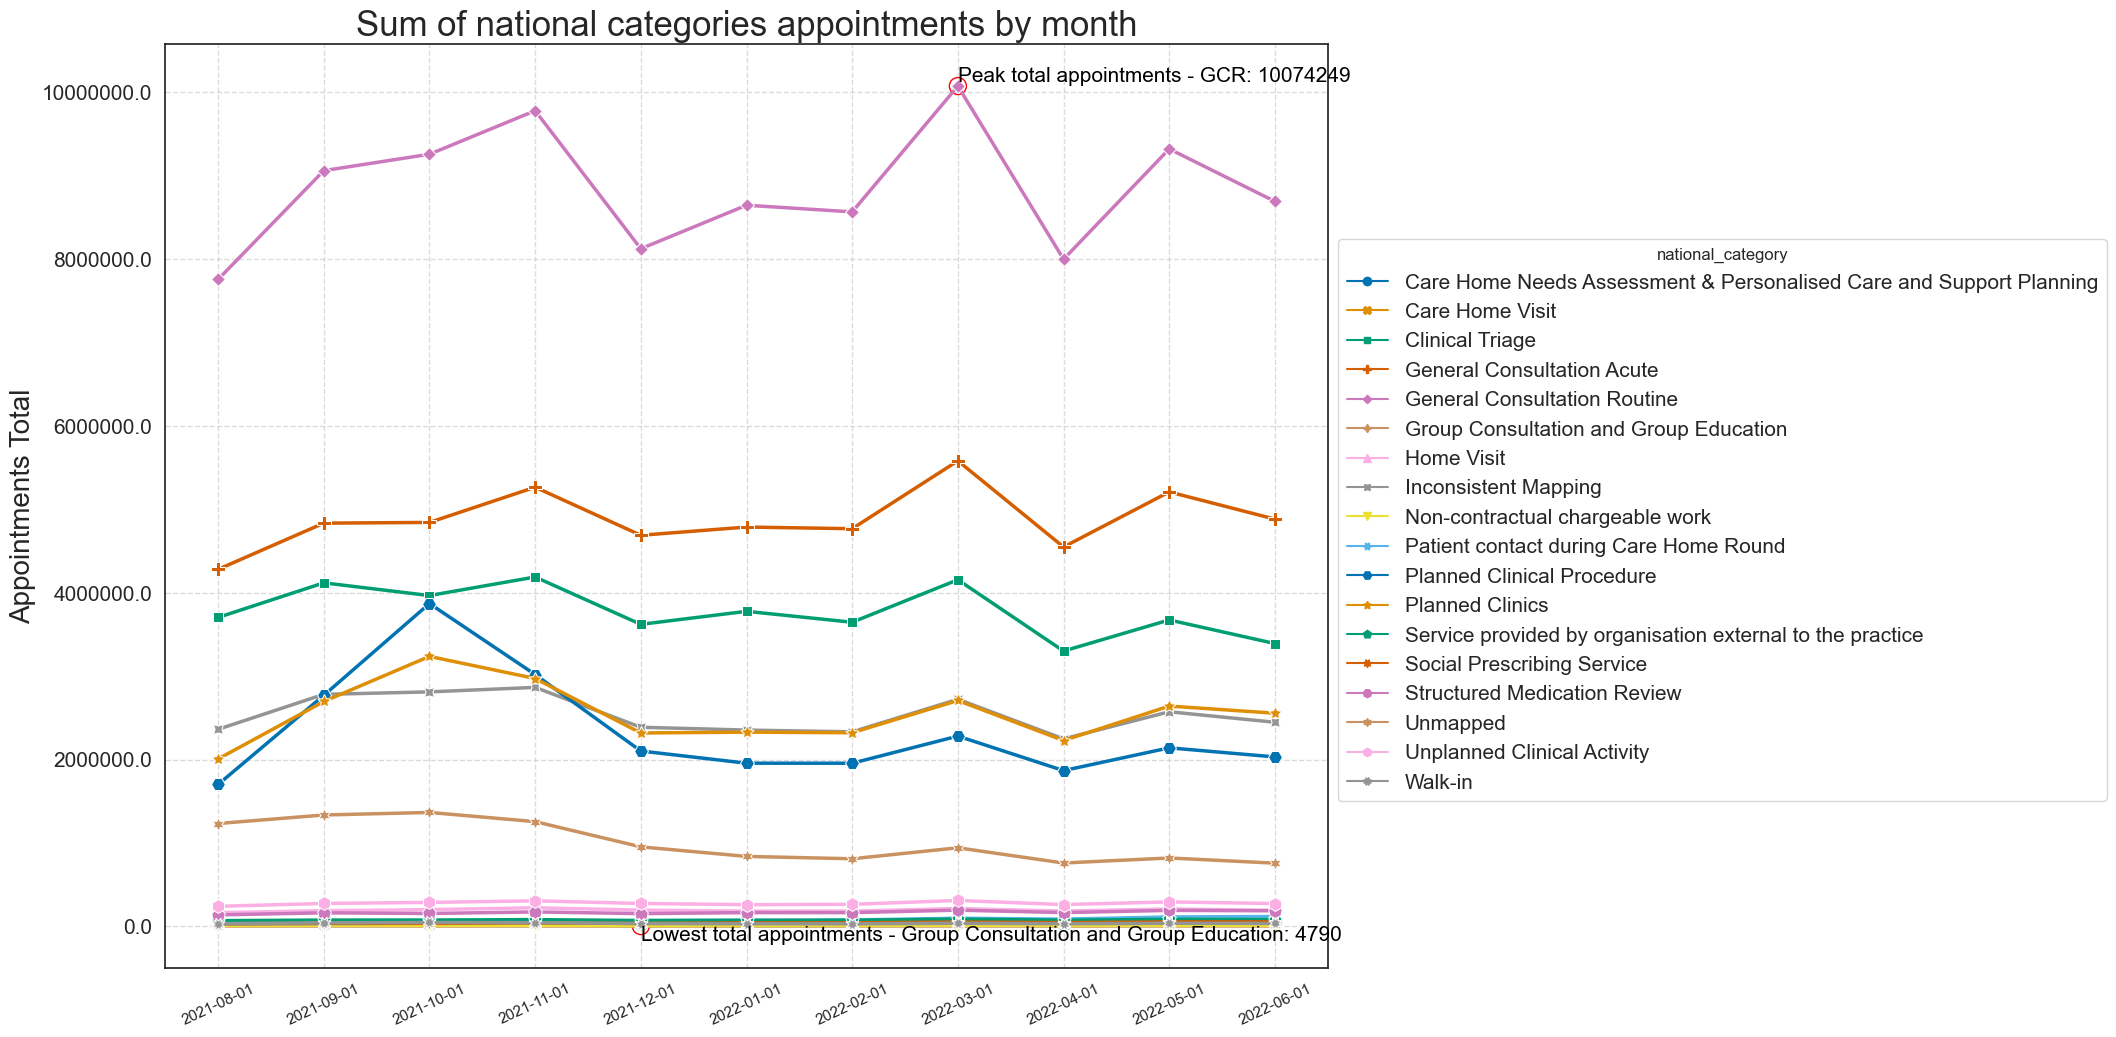

In [214]:
# Group appointments by month and national category, then sum the counts
nc_nc = (
    nc.groupby(["appointment_month", "national_category"])
    .agg({"count_of_appointments": "sum"})
    .reset_index()
)

# Create a lineplot with markers and different line styles for each category
ax_nc = sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="national_category",
    ci=None,
    markers=True,
    style="national_category",
    dashes=False,
    linewidth=2.5,
    markersize=10,
    palette="colorblind",
    data=nc_nc,
)

# Filter data for the highest point
highest_month_gcr = "2022-03-01"
specific_context_type_gcr = "General Consultation Routine"
highest_point_gcr = nc_nc[
    (nc_nc["appointment_month"] == highest_month_gcr)
    & (nc_nc["national_category"] == specific_context_type_gcr)
]

# Plot red annotation
ax_nc.scatter(
    x=highest_point_gcr["appointment_month"],
    y=highest_point_gcr["count_of_appointments"],
    facecolors="none",
    edgecolors="red",
    s=150,
    marker="o",
)

# Add text annotation
x_point = highest_point_gcr["appointment_month"].values[0]
y_point = highest_point_gcr["count_of_appointments"].values[0]
annotation_text = f"Peak total appointments - GCR: {y_point}"
ax_nc.text(
    x_point,
    y_point,
    annotation_text,
    fontsize=15,
    color="black",
    ha="left",
    va="bottom",
)

# Filter data for the lowest point
lowest_month_gcge = "2021-12-01"
specific_context_type_gcge = "Group Consultation and Group Education"
lowest_point_gcge = nc_nc[
    (nc_nc["appointment_month"] == lowest_month_gcge)
    & (nc_nc["national_category"] == specific_context_type_gcge)
]

# Plot red annotation
ax_nc.scatter(
    x=lowest_point_gcge["appointment_month"],
    y=lowest_point_gcge["count_of_appointments"],
    facecolors="none",
    edgecolors="red",
    s=150,
    marker="o",
)

# Add text annotation
x_point = lowest_point_gcge["appointment_month"].values[0]
y_point = lowest_point_gcge["count_of_appointments"].values[0]
annotation_text = (
    f"Lowest total appointments - Group Consultation and Group Education: {y_point}"
)
ax_nc.text(
    x_point,
    y_point,
    annotation_text,
    fontsize=15,
    color="black",
    ha="left",
    va="top",
)

# Change tick label size
ax_nc.set_yticklabels(ax_nc.get_yticks(), size=15)

# Add labels and title
plt.xlabel("", fontsize=0)
plt.ylabel("Appointments Total", fontsize=20)
plt.title("Sum of national categories appointments by month", fontsize=25)

# Adjust for a wide range in national categories data by making scale logarithmic
# plt.yscale('log')  # Use at your own discretion

# Add gridlines
ax_nc.grid(True, linestyle="--", alpha=0.7)

# Create legend with adjusted size and position
legend = ax_nc.legend(title="national_category", fontsize=15, bbox_to_anchor=(1, 0.8))

# Rotate x-axis labels for better readability
plt.xticks(rotation=25)

> National categories follow sum of appointment trends well

> With the exception of a rise in clinical appointments in the Autumn of 2021

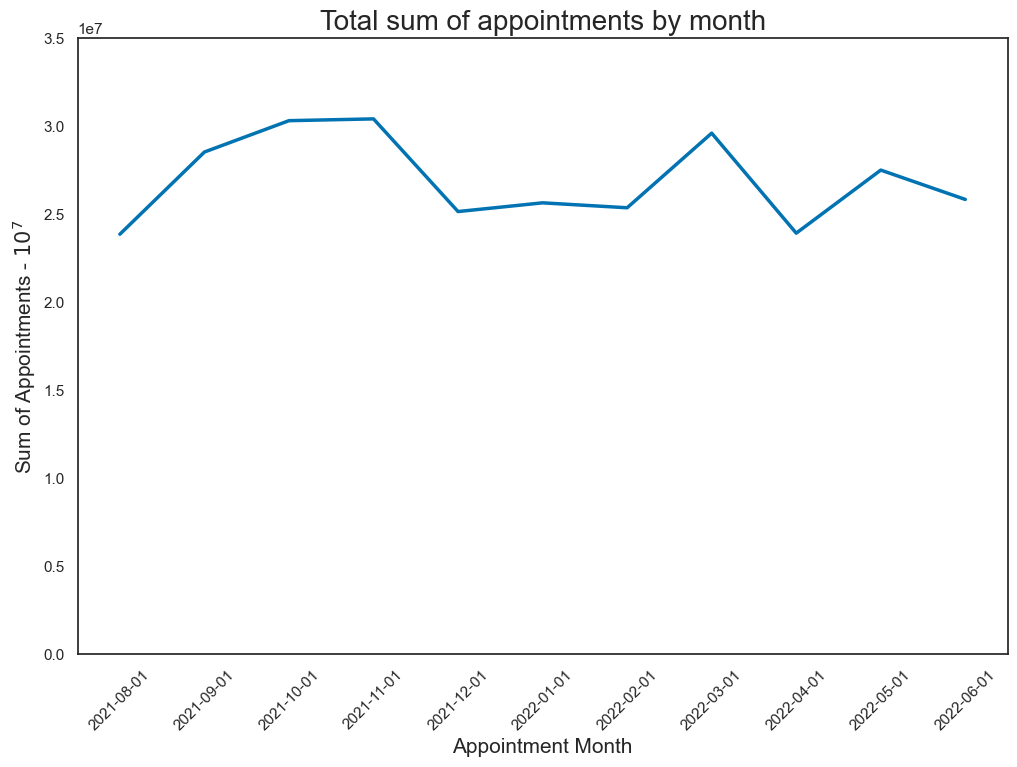

In [215]:
# Having a general baseline sum of appointment count per month to compare with
# Grouping appointments by month and summing the counts
nc_month = (
    nc.groupby("appointment_month")["count_of_appointments"].sum().reset_index()
)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a line plot
ax_month = sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    data=nc_month,
    ci=None,
    linewidth=2.5,
)

# Add labels and title
plt.xlabel("Appointment Month", fontsize=15)
plt.ylabel("Sum of Appointments - $10^7$", fontsize=15)  # To show 10,000,000's
plt.title("Total sum of appointments by month", fontsize=20)

# Set y-axis limits to make graph as relevant as possible
plt.ylim(0, 35000000)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the image
plt.show()

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season.

In [216]:
# Creating a new DataFrame to use daily data from appointment_date
# Group by appointment date and service setting, summing the counts
nc_ss_date = nc.groupby(["appointment_date", "service_setting"])["count_of_appointments"].sum().reset_index()

# Display the new DataFrame
print(nc_ss_date.head(20))

   appointment_date            service_setting  count_of_appointments
0        2021-08-01  Extended Access Provision                    438
1        2021-08-01           General Practice                   3411
2        2021-08-01                      Other                    401
3        2021-08-01       Primary Care Network                    323
4        2021-08-01                   Unmapped                   1054
5        2021-08-02  Extended Access Provision                   7705
6        2021-08-02           General Practice                1108073
7        2021-08-02                      Other                  22098
8        2021-08-02       Primary Care Network                  20016
9        2021-08-02                   Unmapped                  64876
10       2021-08-03  Extended Access Provision                   7820
11       2021-08-03           General Practice                1056435
12       2021-08-03                      Other                  21662
13       2021-08-03 

**Summer:**


In [217]:
# Filter the DataFrame for August 2021 and General Practice
gp_august_2021 = nc_ss_date[(nc_ss_date['appointment_date'] >= '2021-08-01') & 
                             (nc_ss_date['appointment_date'] <= '2021-08-31') & 
                             (nc_ss_date['service_setting'] == 'General Practice')]

# Sum the count_of_appointments for General Practice in August 2021
total_gp_appointments_august_2021 = gp_august_2021['count_of_appointments'].sum()

# Print the result
print(f"Total General Practice Appointments in August 2021: {total_gp_appointments_august_2021}")


Total General Practice Appointments in August 2021: 21575852


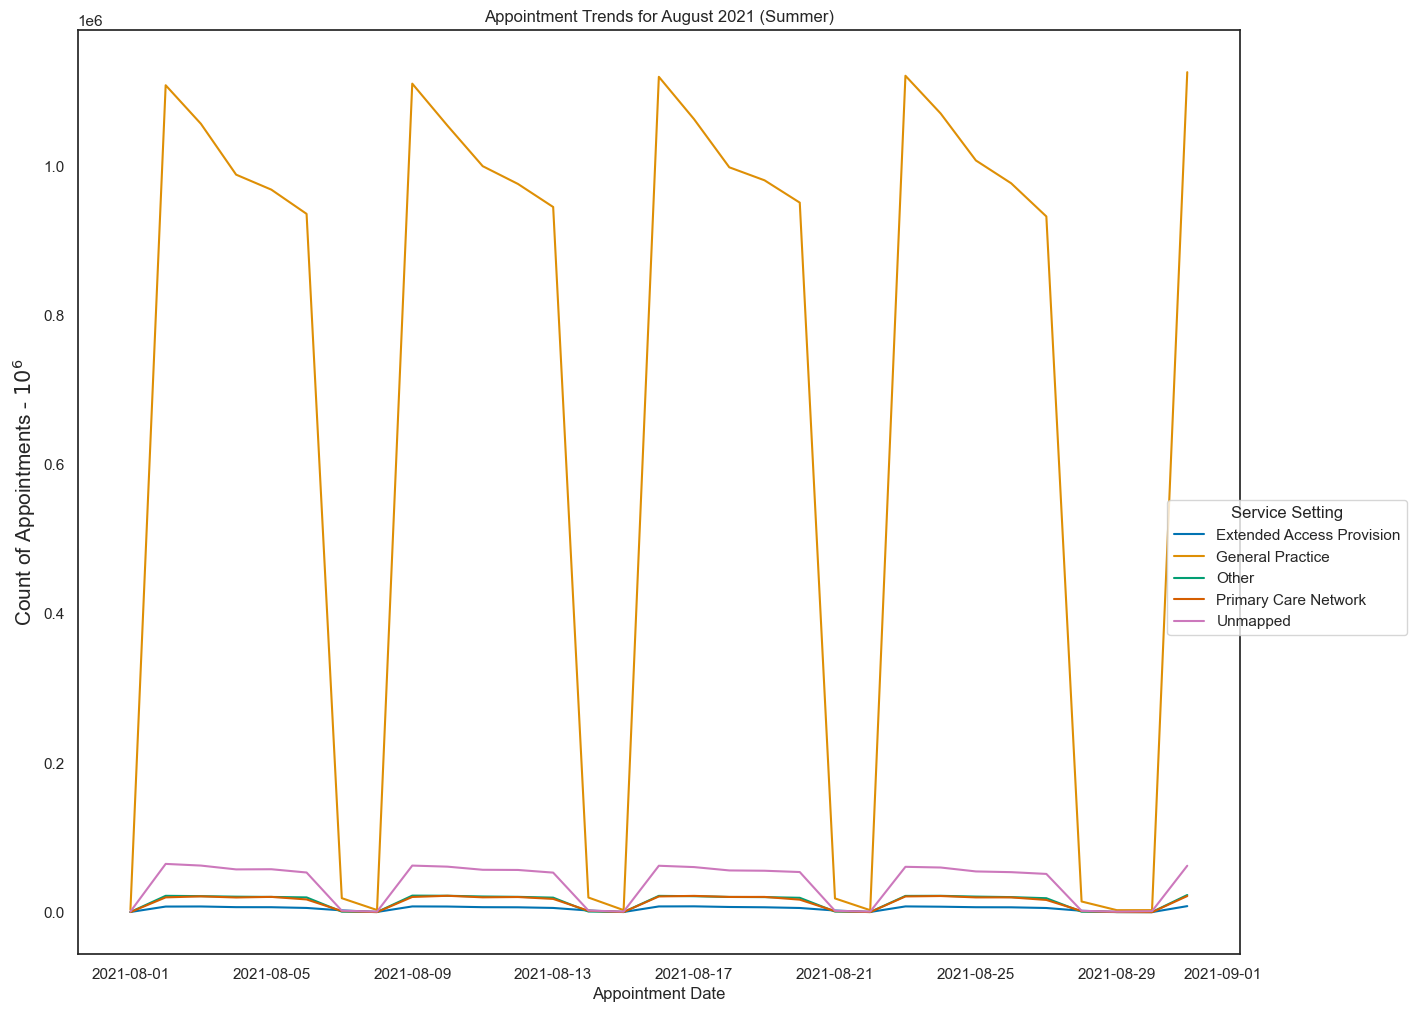

In [218]:
# Filter the DataFrame for August 2021
# It is possible to include June 2020 as a summer month too but it's confusing
# As the nature of the chart suggests a linear progression that wouldn't be true
nc_ss_summer = nc_ss_date[
    (nc_ss_date["appointment_date"] >= "2021-08-01")
    & (nc_ss_date["appointment_date"] <= "2021-08-31")
]

# Create a lineplot with Seaborn
sns.lineplot(
    x="appointment_date",
    y="count_of_appointments",
    hue="service_setting",
    data=nc_ss_summer,
    ci=None,
)

# Set axis titles
plt.xlabel("Appointment Date")
plt.ylabel("Count of Appointments - $10^6$", fontsize=15)  # To show 1,000,000's

# Add a title
plt.title("Appointment Trends for August 2021 (Summer)")

# Move legend outside the plot
plt.legend(
    loc="upper right",
    bbox_to_anchor=(1.15, 0.5),
    title="Service Setting",
)

> Having looked at the calendar for this month, the dips are weekends

**Autumn:**

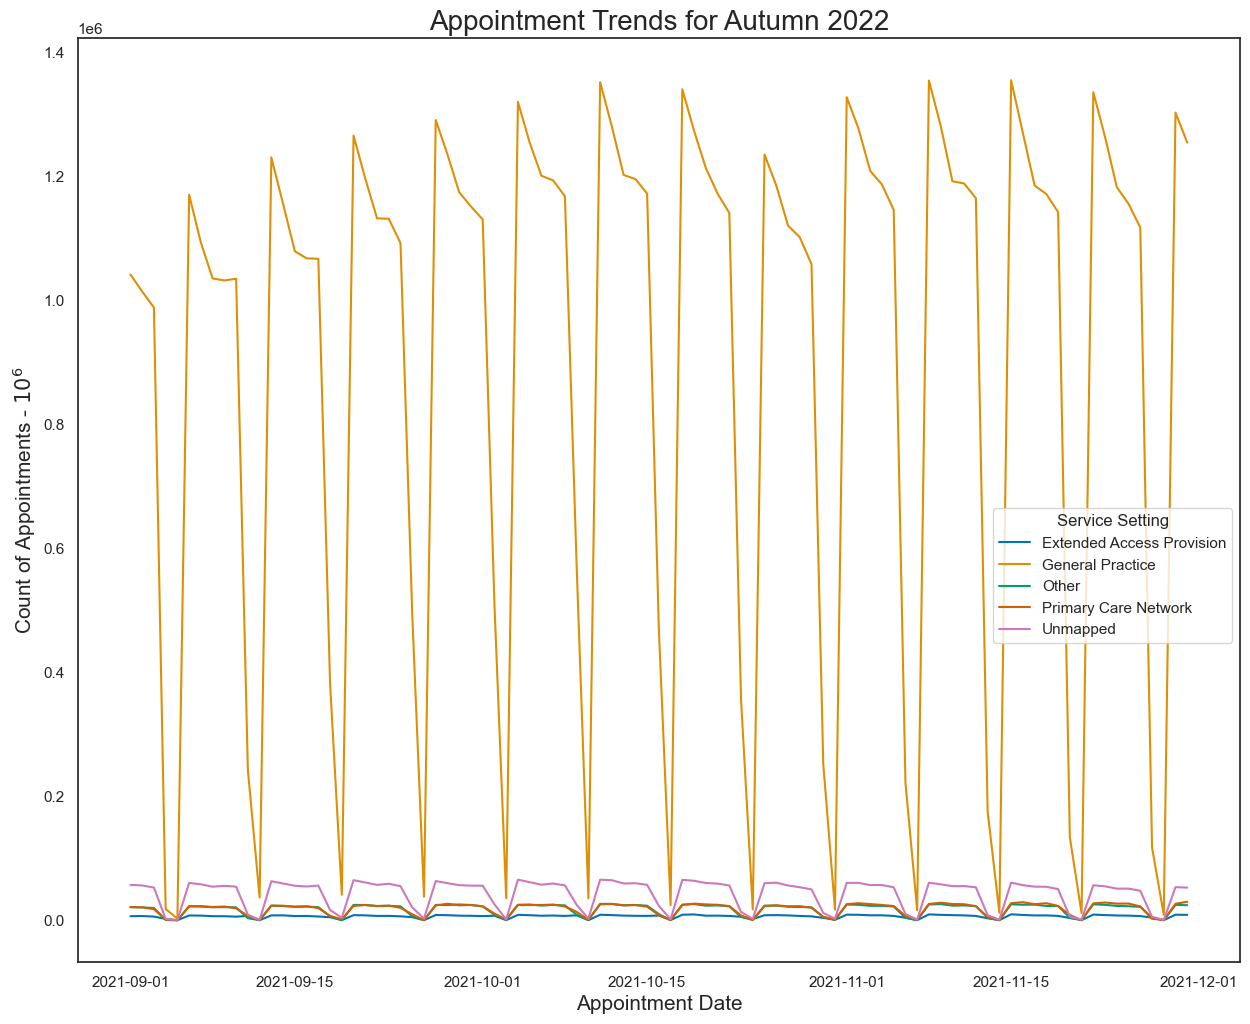

In [219]:
# Filter the DataFrame for autumn months
nc_ss_autumn = nc_ss_date[(nc_ss_date["appointment_date"] >= "2021-09-01") & (nc_ss_date["appointment_date"] <= "2021-11-30")]

# Create a lineplot with Seaborn
ax = sns.lineplot(
    x="appointment_date",
    y="count_of_appointments",
    hue="service_setting",
    data=nc_ss_autumn,
    ci=None,
)

# Set axis titles
plt.xlabel("Appointment Date", fontsize=15)
plt.ylabel("Count of Appointments - $10^6$", fontsize=15)  # To show 1,000,000's

# Add a title
plt.title("Appointment Trends for Autumn 2022", fontsize=20)

# Move legend outside the plot
plt.legend(
    loc="upper right",
    bbox_to_anchor=(1, 0.5),
    title="Service Setting",
)

> An observable rise at the start of Autumn before it levels off

**Winter:**

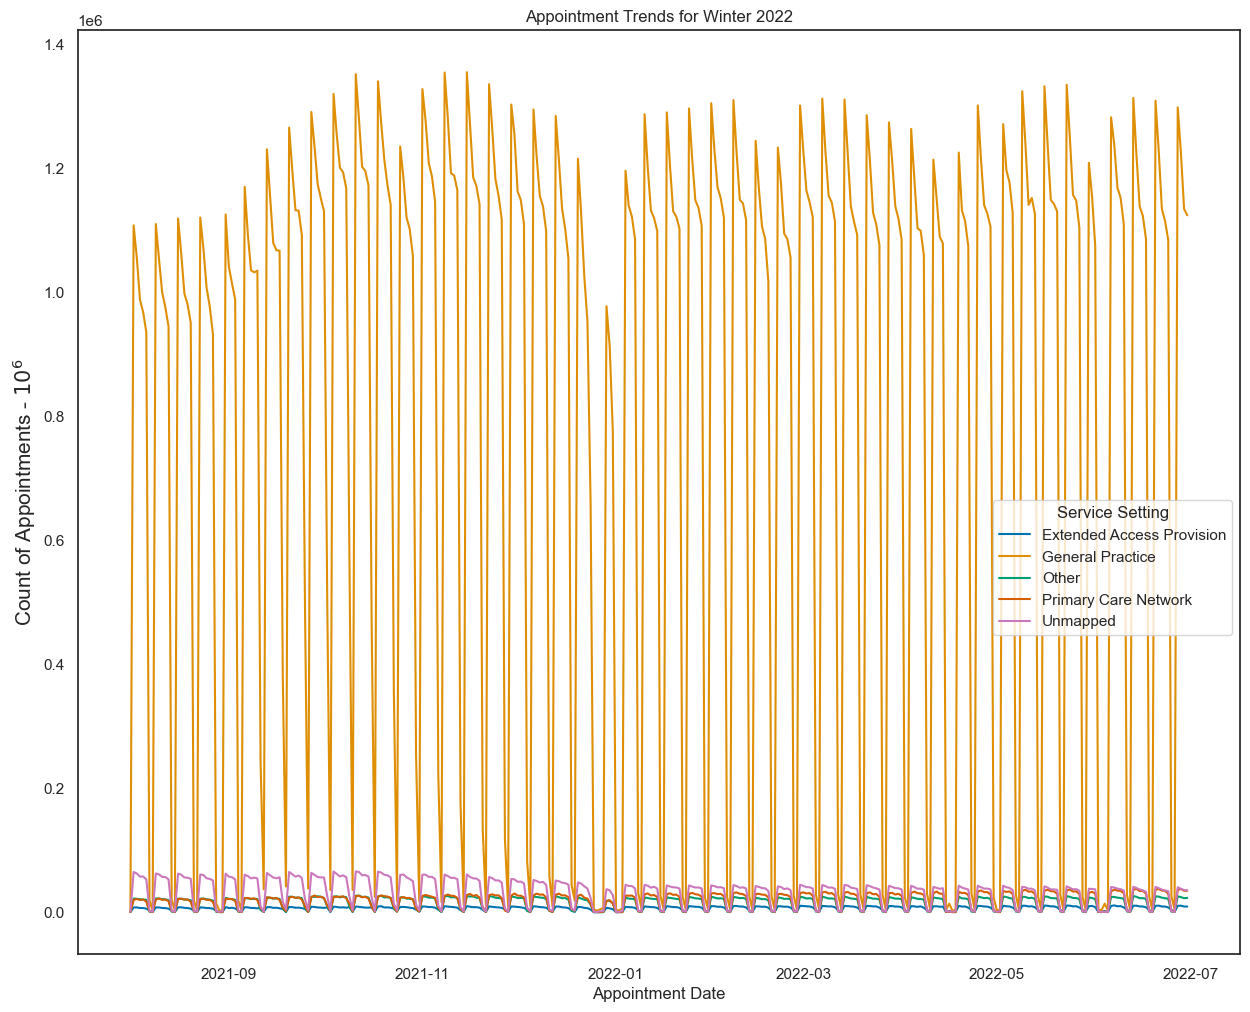

In [220]:
nc_ss_winter = nc_ss_date[
    (nc_ss_date["appointment_date"] >= "2021-12-01")
    | (nc_ss_date["appointment_date"] <= "2022-02-28")
]

ax = sns.lineplot(
    x="appointment_date",
    y="count_of_appointments",
    hue="service_setting",
    data=nc_ss_winter,
    ci=None,
)

plt.title(f"Appointment Trends for Winter {2022}")
plt.xlabel("Appointment Date")
plt.ylabel("Count of Appointments - $10^6$", fontsize=15)
plt.legend(
    loc="upper right",
    bbox_to_anchor=(1, 0.5),
    title="Service Setting",
)

> Noticeable seasonal dip in appointments, likely due to cyclical patterns

**Spring:**

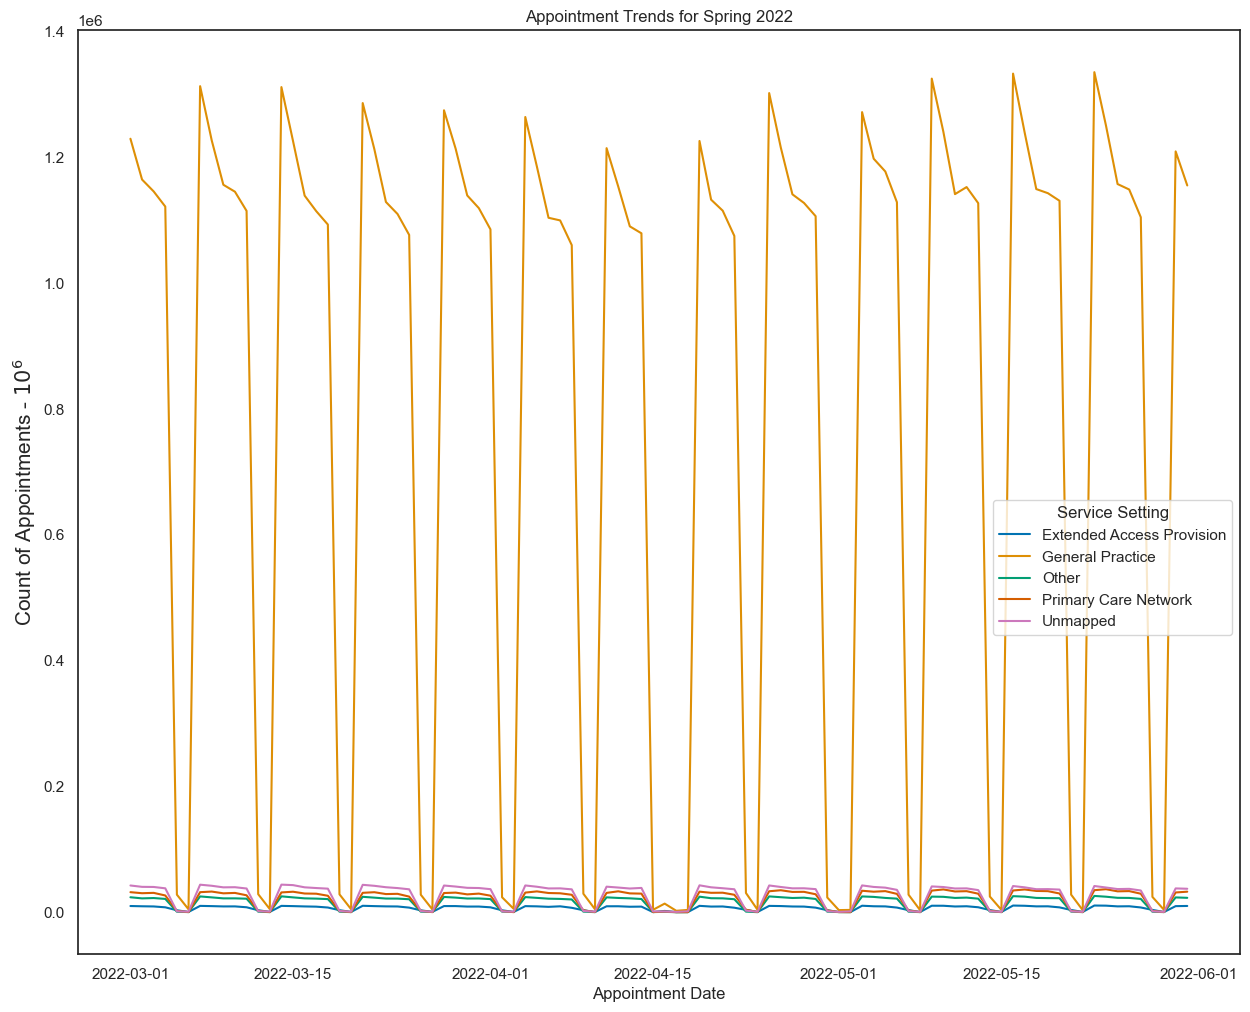

In [221]:
# Filter the DataFrame for spring months
nc_ss_spring = nc_ss_date[(nc_ss_date["appointment_date"] >= "2022-03-01") &
                           (nc_ss_date["appointment_date"] <= "2022-05-31")]

# Create a lineplot with Seaborn
ax = sns.lineplot(
    x="appointment_date",
    y="count_of_appointments",
    hue="service_setting",
    data=nc_ss_spring,
    ci=None,
)

# Add a title
plt.title("Appointment Trends for Spring 2022")

# Set axis titles
plt.xlabel("Appointment Date")
plt.ylabel("Count of Appointments - $10^6$", fontsize=15)  # To show 1,000,000's

# Move legend outside the plot
plt.legend(
    loc="upper right",
    bbox_to_anchor=(1, 0.5),
    title="Service Setting",
)

> Fairly flat progression across Spring

# 

### 5) Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [222]:
sns.set(rc={'figure.figsize':(15, 12)})  # Set the figure size.

sns.set_style('white')  # Set the plot style as white.

pd.options.display.max_colwidth = 200  # Maximum column width to display.

In [223]:
# Import and sense-check 'tweets' .csv as tweets.

tweets = pd.read_csv('tweets.csv')
print(tweets.shape)

(1174, 10)


In [224]:
tweets.head()  # View the top of DataFrame.

tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

In [225]:
tweets.tail()  # View the bottom of the DataFrame.

tweet_id  \
1169  1567583004209332227   
1170  1567582945342267393   
1171  1567582936014241792   
1172  1567582892892782592   
1173  1567582846847533058   

                                                                                                                                                                                              tweet_full_text  \
1169                                                           RT @PotomacPhotonic: Potomac #Innovation Report:  #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…   
1170  Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...   
1171  The @hfmaorg Region 9 presents "The Value of ESG to the Healthcare Industry" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...   
1172                                    Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC   
1173                                                             RT @KimcoStaffing: Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift -  Interviewing Now!! (#NewportBeach) #job http…   

                                                                                                                                                                                               tweet_entities  \
1169  {'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...   
1170  {'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...   
1171  {'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices': [209, 213]}, {'text': 'healthcare', 'indices': [235, 246]}], 'symbols': [], 'user_mentions': [{'screen_name': '...   
1172  {'hashtags': [{'text': 'bpt', 'indices': [30, 34]}, {'text': 'physiotherapy', 'indices': [35, 49]}, {'text': 'HealthyNation', 'indices': [51, 65]}, {'text': 'healthcare', 'indices': [66, 77]}, {'t...   
1173  {'hashtags': [{'text': 'MediQuestStaffing', 'indices': [41, 59]}, {'text': 'Hospital', 'indices': [69, 78]}, {'text': 'shift', 'indices': [85, 91]}, {'text': 'NewportBeach', 'indices': [115, 128]}...   

                                                      tweet_entities_hashtags  \
1169                        #Innovation, #precisionFabrication, #Microfluidic   
1170                                                     #SKPoli, #healthcare   
1171                                              #webinar, #ESG, #healthcare   
1172  #bpt, #physiotherapy, #HealthyNation, #healthcare, #medicalcare, #csjmu   
1173               #MediQuestStaffing, #Hospital, #shift, #NewportBeach, #job   

                                            tweet_metadata  \
1169  {'iso_language_code': 'en', 'result_type': 'recent'}   
1170  {'iso_language_code': 'en', 'result_type': 'recent'}   
1171  {'iso_language_code': 'en', 'result_type': 'recent'}   
1172  {'iso_language_code': 'en', 'result_type': 'recent'}   
1173  {'iso_language_code': 'en', 'result_type': 'recent'}   

      tweet_retweet_count  tweet_favorite_count  tweet_favorited  \
1169                    1                     0            False   
1170                    0                     1            False   
1171                    0                     0            False   
1172                    0                     5            False   
1173                    2                     0            False   

      tweet_retweeted tweet_lang  
1169            False       

In [226]:
# Check for missing values.
tweets.isna().sum()  # Determine the sum of missing values

tweet_id                     0
tweet_full_text              0
tweet_entities               0
tweet_entities_hashtags    167
tweet_metadata               0
tweet_retweet_count          0
tweet_favorite_count         0
tweet_favorited              0
tweet_retweeted              0
tweet_lang                   0
dtype: int64

> Looks like there might be some tweets that don't have hashtags

> There is still valuable data to be gleaned from these tweets so they will be left unchanged

In [227]:
#Explore the metadata and data set.
# We start by discovering the data types
print(tweets.dtypes)

# The data types are appropriate 

tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object


In [228]:
tweets.describe().round(2)  # describe the numerical data with basic statistics

tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03              1174.00               1174.00
mean   1.567612e+18                 8.63                  0.37
std    2.427553e+13                29.78                  2.04
min    1.567574e+18                 0.00                  0.00
25%    1.567590e+18                 0.00                  0.00
50%    1.567611e+18                 1.00                  0.00
75%    1.567633e+18                 3.00                  0.00
max    1.567655e+18               303.00                 42.00

> 1174 tweets overall which fits the number of rows from shape()

> Both the tweet_retweet_count and tweet_favorite_count show us 

> that the vast majority of tweets are not retweeted or favourited

In [229]:
tweets.describe(include = ['O'])  # describe the descriptive data with basic statistics

tweet_full_text  \
count                                                                                                                                           1174   
unique                                                                                                                                           961   
top     RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…   
freq                                                                                                                                              15   

                                                                                                                                                                                                 tweet_entities  \
count                                                                                                                                                                                                      1174   
unique                                                                                                                                                                                                      945   
top     {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...   
freq                                                                                                                                                                                                         15   

       tweet_entities_hashtags  \
count                     1007   
unique                     710   
top                #healthcare   
freq                        88   

                                              tweet_metadata tweet_lang  
count                                                   1174       1174  
unique                                                     1          1  
top     {'iso_language_code': 'en', 'result_type': 'recent'}         en  
freq                                                    1174       1174

> Healthcare is the most popular hashtag in this dataset

> English is the most popular language

> There are 961 unqiue tweets which might indicate 

> that the remaining 213 tweets are either retweets or just copies

In [230]:
# Analysis of retweets and favourites
retweet_counts = tweets['tweet_retweet_count'].value_counts()
favorite_counts = tweets['tweet_favorite_count'].value_counts()

print("Retweet Counts:")
print(retweet_counts)

print("Favorite Counts:")
print(favorite_counts)

Retweet Counts:
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64
Favorite Counts:
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64


> This data confirms the descriptive statistics from earlier

> There are not many favourites or retweets

> The vast majority of retweets and favourites are from 0 - 5

#### It would not be useful to exclusively look at retweets and favourites
About 45% of tweets have no retweets (526 out of 1174).
About 88% of tweets have no favorites (1027 out of 1174)
#### Favourites and retweets are good indicators of engagement but engagement doesn't necessarily = sentiment
#### Engagement could be linked to humour, advertising etc. but don't capture nuance or motivation 

In [231]:
# Hashtag analysis. 
# Creating a new DataFrame containing only the text.
tweets_text = tweets.select_dtypes(include=['object']).copy()

# View the DataFrame.
tweets_text.head()

tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata tweet_lang  
0  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
1  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
2  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
3  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
4  {'iso_language_code': 'en', 'result_type': 'recent'}         en

In [232]:
tags = []  # Creating a variable to store the hashtag data
 
# Loop through the messages and create a list of values containing the # symbol.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase and append to the tags list
            tags.append(z.lower())

In [233]:
tags_series = pd.Series(tags)  # Creating a Pandas Series to count the values in the list

print(tags_series.value_counts())  # Display the Series with counts

print(tags[:30])  # Display the list of tags

#healthcare      716
#health           80
#medicine         41
#ai               40
#job              38
                ... 
#evestudy          1
#patientdata…      1
#secure            1
#sms               1
\n#csjmu           1
Length: 1754, dtype: int64
['#healthcare', '#premisehealth', '#hiring', '#healthcare', '🚨#new:🚨', 'look!\n\n#blogs', '#digitaltransformation', '#cybersecurity', '#accounting', '#finance', '#healthcare', 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna', '#cnaexam', '#cnaexampreparation', '#jacksonville', '#cnatraining', '#nurse', '#nursing', '#nurselife', '#nursepractitioner', '#nurseproblems', '#nursingschool', '#healthcare', '🚨#new:🚨', '#disparities.', '@karahartnett\n#healthcare', '#alert', '#insurance', '#data\nhttps://t.co/h9hlamr7p9', '#healthcare']


In [234]:
# Convert the Series to a DataFrame and reset the index
tags_df = tags_series.value_counts().reset_index()

tags_df.columns = ['word', 'count']  # Rename the columns for clarity

print(tags_df)  # Display the resulting DataFrame

               word  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]


In [235]:
tags_df['count'] = tags_df['count'].astype(int)  # Fix the count datatype.

# View the result.
tags_df.dtypes

word     object
count     int32
dtype: object

In [236]:
print(tags_df.shape)  # sense checking tags_df

tags_df.head(10)  # View the top of DataFrame.

(1754, 2)


word  count
0      #healthcare    716
1          #health     80
2        #medicine     41
3              #ai     40
4             #job     38
5         #medical     35
6        #strategy     30
7  #pharmaceutical     28
8   #digitalhealth     25
9          #pharma     25

In [237]:
tags_df.isna().sum()  # Determine the sum of missing values

word     0
count    0
dtype: int64

In [238]:
# Display records where the count is larger than 10.
tags_df_count = tags_df[tags_df['count'] > 10]

tags_df_count.head(10)

word  count
0      #healthcare    716
1          #health     80
2        #medicine     41
3              #ai     40
4             #job     38
5         #medical     35
6        #strategy     30
7  #pharmaceutical     28
8   #digitalhealth     25
9          #pharma     25

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '#healthcare'),
  Text(1, 0, '#health'),
  Text(2, 0, '#medicine'),
  Text(3, 0, '#ai'),
  Text(4, 0, '#job'),
  Text(5, 0, '#medical'),
  Text(6, 0, '#strategy'),
  Text(7, 0, '#pharmaceutical'),
  Text(8, 0, '#digitalhealth'),
  Text(9, 0, '#pharma'),
  Text(10, 0, '#marketing'),
  Text(11, 0, '#medtwitter'),
  Text(12, 0, '#biotech'),
  Text(13, 0, '#competitiveintelligence'),
  Text(14, 0, '#meded'),
  Text(15, 0, '#vaccine'),
  Text(16, 0, '#hiring'),
  Text(17, 0, '#news'),
  Text(18, 0, '#machinelearning'),
  Text(19, 0, '#technology'),
  Text(20, 0, '#coronavirus'),
  Text(21, 0, '#womeninmedicine'),
  Text(22, 0, '#covid'),
  Text(23, 0, '#competitivemarketing'),
  Text(24, 0, '#wellness'),
  Text(25, 0, '#healthtech'),
  Text(26, 0, '#doctorofveterinary

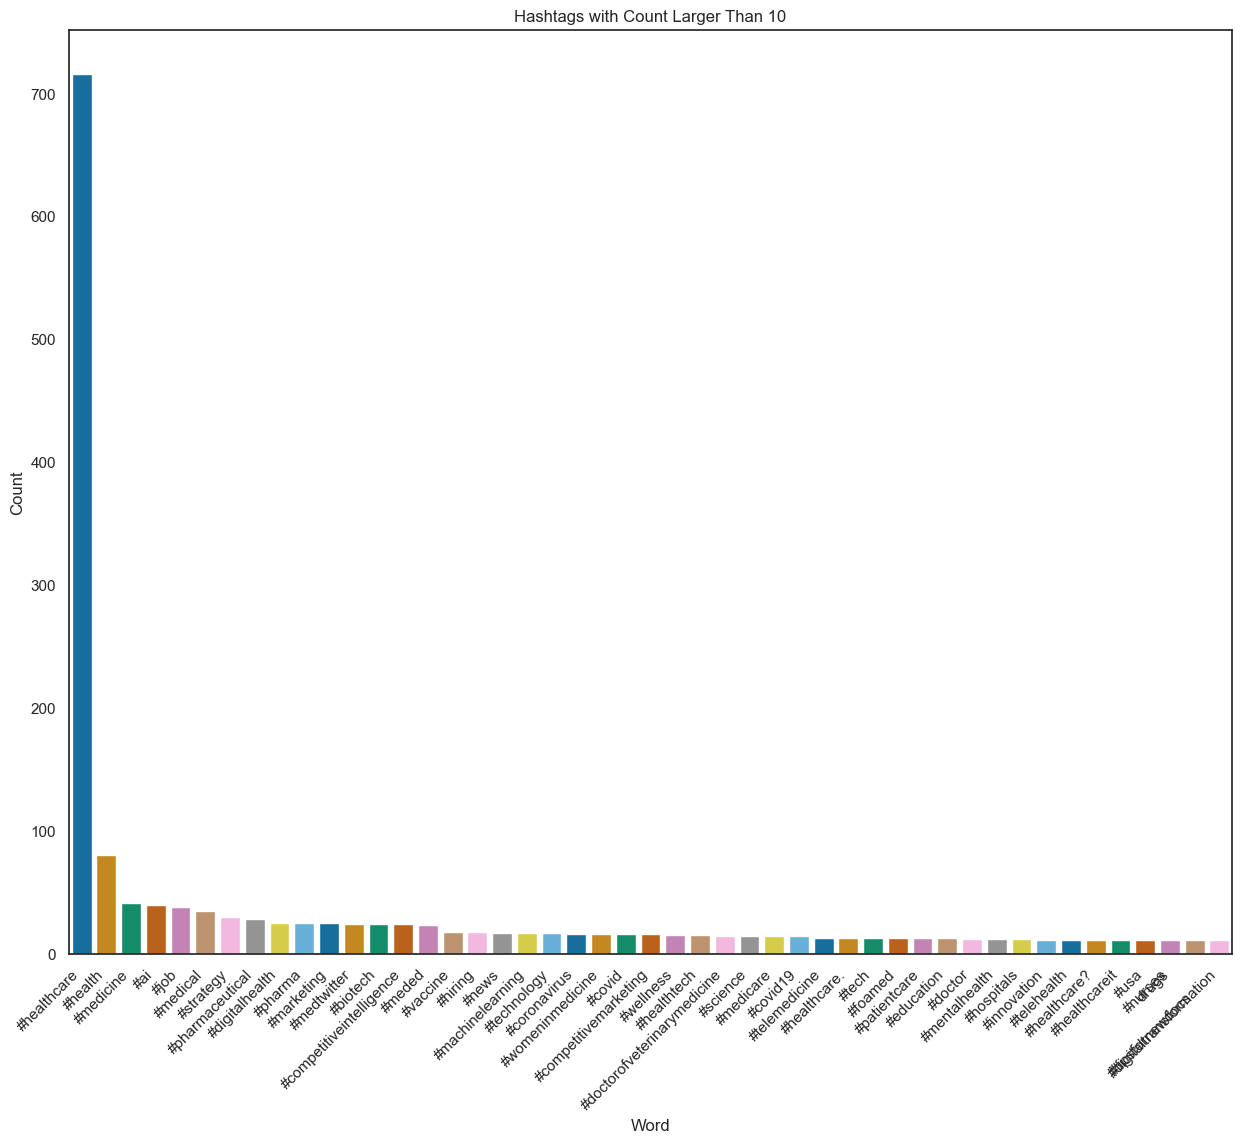

In [239]:
# Create a Seaborn barplot displaying records with a count larger than 10
sns.barplot(x="word", y="count", data=tags_df_count, palette="colorblind")

# Set labels and title
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Hashtags with Count Larger Than 10")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

In [240]:
# This chart is cluttered so I will up the count limit

# Filter records where the count is larger than 15 exclude specific over represented hashtags
tags_df_count_filtered = tags_df.query('count > 15 and word not in ["#healthcare", "#health"]')

print(tags_df_count_filtered.head(10))  # Display the first 15 rows of the filtered DataFrame

               word  count
2         #medicine     41
3               #ai     40
4              #job     38
5          #medical     35
6         #strategy     30
7   #pharmaceutical     28
8    #digitalhealth     25
9           #pharma     25
10       #marketing     25
11      #medtwitter     24


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '#medicine'),
  Text(1, 0, '#ai'),
  Text(2, 0, '#job'),
  Text(3, 0, '#medical'),
  Text(4, 0, '#strategy'),
  Text(5, 0, '#pharmaceutical'),
  Text(6, 0, '#digitalhealth'),
  Text(7, 0, '#pharma'),
  Text(8, 0, '#marketing'),
  Text(9, 0, '#medtwitter'),
  Text(10, 0, '#biotech'),
  Text(11, 0, '#competitiveintelligence'),
  Text(12, 0, '#meded'),
  Text(13, 0, '#vaccine'),
  Text(14, 0, '#hiring'),
  Text(15, 0, '#news'),
  Text(16, 0, '#machinelearning'),
  Text(17, 0, '#technology'),
  Text(18, 0, '#coronavirus'),
  Text(19, 0, '#womeninmedicine'),
  Text(20, 0, '#covid'),
  Text(21, 0, '#competitivemarketing')])

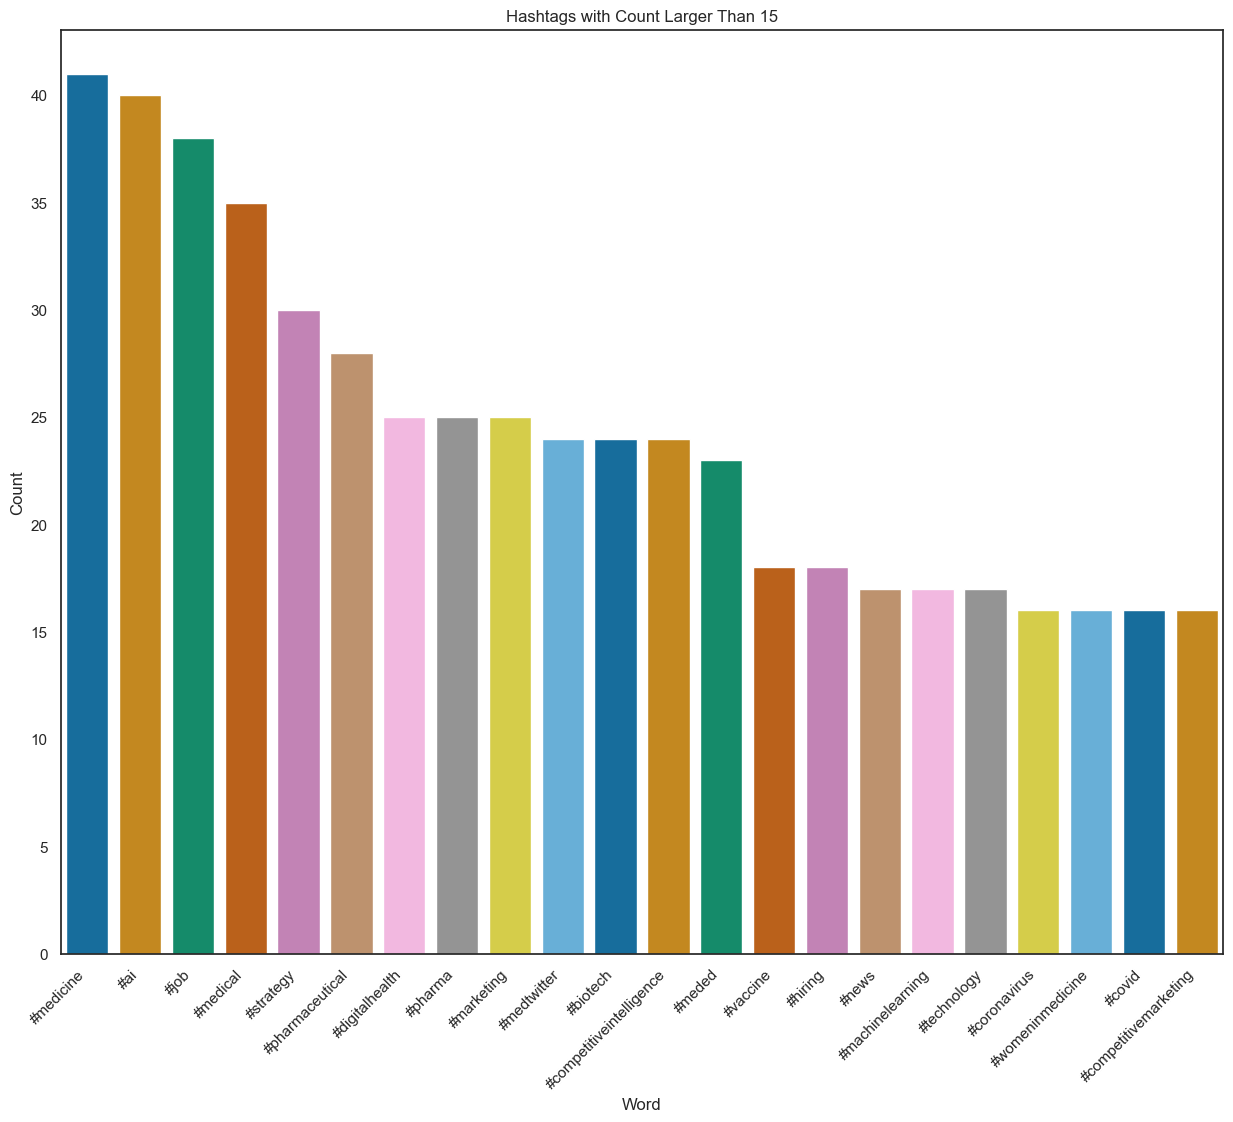

In [241]:
# Create a Seaborn barplot displaying records with a count larger than 15 
# Also with the hashtags "#healthcare" & "#health"removed 
sns.barplot(x='word', y='count', data=tags_df_count_filtered, palette='colorblind')

# Set labels and title
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Hashtags with Count Larger Than 15')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

Text(0, 0.5, 'Wrapped Tweet Hashtags')

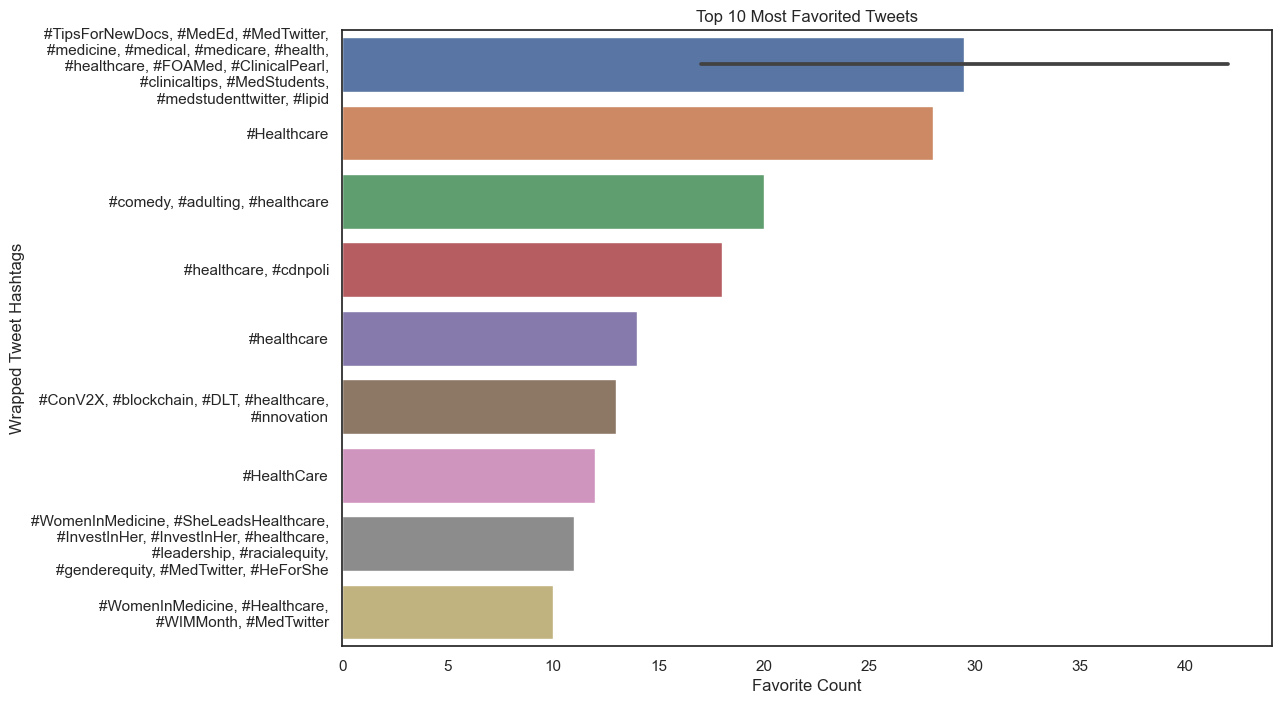

In [242]:
# Exploring the most favourited tweets with their hashtags

import textwrap

# Function to wrap text to multiple lines
def wrap_text(text, width=40):
    return "\n".join(textwrap.wrap(text, width=width))

# Filtering out top favourited tweets
top_favorited_tweets = tweets.nlargest(10, "tweet_favorite_count")

# Apply text wrapping to hashtags
top_favorited_tweets["wrapped_hashtags"] = (
    top_favorited_tweets["tweet_entities_hashtags"].apply(wrap_text)
)

# Horizontal Bar Chart for Most Favorited Tweets and their hashtags
plt.figure(figsize=(12, 8))
sns.barplot(x="tweet_favorite_count", y="wrapped_hashtags", data=top_favorited_tweets)
plt.title("Top 10 Most Favorited Tweets")
plt.xlabel("Favorite Count")
plt.ylabel("Wrapped Tweet Hashtags")

> These Tweets are not related to the business question

In [243]:
# Creating a theme of keywords to search for as an example.
# In order to relate to the business questions
# Let's consider sentiments around capacity

# List of keywords to search for
keywords = ["wait", "slow", "fast", "staff", "quick", "NHS"]

# Create a boolean mask for rows containing the keywords
keyword_capacity = tweets["tweet_full_text"].str.contains(
    r"\b(?:|" + "|".join(keywords) + r")\b", case=False, regex=True
)

# Apply the mask to filter relevant tweets
capacity_tweets = tweets[keyword_capacity]

# Display a sample of the relevant tweets
print(capacity_tweets[[ "tweet_entities_hashtags"]])

                                                                 tweet_entities_hashtags
0                                                                            #Healthcare
1                                                                #PremiseHealth, #hiring
2                                                                            #Healthcare
3                                                                                   #NEW
4     #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare
...                                                                                  ...
1169                                   #Innovation, #precisionFabrication, #Microfluidic
1170                                                                #SKPoli, #healthcare
1171                                                         #webinar, #ESG, #healthcare
1172             #bpt, #physiotherapy, #HealthyNation, #healthcare, #medicalcare, #csjmu
1173                 

In [244]:
# Export all relevant tweets to a CSV file
capacity_tweets[['tweet_entities_hashtags']].to_csv('capacity_tweets.csv', index=False)

 > Although the initial analysis of the original tweets proved to be fruitless there is still some scope to use future, more relevantly sourced tweets, to offer insights. 
 Consider the technical report for a futher breakdown of this process.

# 

## Final visualisations, questions from the NHS and any additional insights. 
Here I will answer additional questions from the NHS as well as additional questions and observations identified.

It is important to understand that the technical report will have full justification and exploration of the details. This is a manual for how to code the project.

### Investigate the main concerns posed by the NHS. 

In [245]:
# Appointments regional will be explored for this as it has the largest time frame available 
# And relevant columns

ar.head() # View the DataFrame.

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034        2020-01-01           Attended       GP     Face-to-Face   
1    E54000034        2020-01-01           Attended       GP     Face-to-Face   
2    E54000034        2020-01-01           Attended       GP     Face-to-Face   
3    E54000034        2020-01-01           Attended       GP     Face-to-Face   
4    E54000034        2020-01-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [246]:
# Print the min and max dates.
print("Minimum Date:", ar['appointment_month'].dt.date.min())
print("Maximum Date:", ar['appointment_month'].dt.date.max())

Minimum Date: 2020-01-01
Maximum Date: 2022-06-01


In [247]:
# Filter the data set to only look at data from 2021-08 onwards.
filtered_ar = ar[ar['appointment_month'] >= '2021-08-01']

# Print the head of the filtered DataFrame to verify the results
print(filtered_ar.head())

     icb_ons_code appointment_month appointment_status hcp_type  \
3652    E54000034        2021-08-01           Attended       GP   
3653    E54000034        2021-08-01           Attended       GP   
3654    E54000034        2021-08-01           Attended       GP   
3655    E54000034        2021-08-01           Attended       GP   
3656    E54000034        2021-08-01           Attended       GP   

     appointment_mode time_between_book_and_appointment  count_of_appointments  
3652     Face-to-Face                             1 Day                   6553  
3653     Face-to-Face                    15  to 21 Days                   2390  
3654     Face-to-Face                       2 to 7 Days                  10547  
3655     Face-to-Face                    22  to 28 Days                    937  
3656     Face-to-Face                     8  to 14 Days                   4961  


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [248]:
# Create an aggregated data set with specific columns
ar_agg_columns = [
    "appointment_month",
    "hcp_type",
    "appointment_status",
    "appointment_mode",
    "time_between_book_and_appointment",
]

# Create the new DataFrame
ar_agg = ar.groupby(ar_agg_columns)["count_of_appointments"].sum().reset_index()

# View the new DataFrame
ar_agg.head(20)

appointment_month hcp_type appointment_status appointment_mode  \
0         2020-01-01       GP           Attended     Face-to-Face   
1         2020-01-01       GP           Attended     Face-to-Face   
2         2020-01-01       GP           Attended     Face-to-Face   
3         2020-01-01       GP           Attended     Face-to-Face   
4         2020-01-01       GP           Attended     Face-to-Face   
5         2020-01-01       GP           Attended     Face-to-Face   
6         2020-01-01       GP           Attended     Face-to-Face   
7         2020-01-01       GP           Attended     Face-to-Face   
8         2020-01-01       GP           Attended       Home Visit   
9         2020-01-01       GP           Attended       Home Visit   
10        2020-01-01       GP           Attended       Home Visit   
11        2020-01-01       GP           Attended       Home Visit   
12        2020-01-01       GP           Attended       Home Visit   
13        2020-01-01       GP           Attended       Home Visit   
14        2020-01-01       GP           Attended       Home Visit   
15        2020-01-01       GP           Attended       Home Visit   
16        2020-01-01       GP           Attended        Telephone   
17        2020-01-01       GP           Attended        Telephone   
18        2020-01-01       GP           Attended        Telephone   
19        2020-01-01       GP           Attended        Telephone   

   time_between_book_and_appointment  count_of_appointments  
0                              1 Day                 653846  
1                     15  to 21 Days                 620789  
2                        2 to 7 Days                1723834  
3                     22  to 28 Days                 421189  
4                      8  to 14 Days                1123186  
5                  More than 28 Days                 324732  
6                           Same Day                5170695  
7             Unknown / Data Quality                   1348  
8                              1 Day                   9244  
9                     15  to 21 Days                    479  
10                       2 to 7 Days                   7481  
11                    22  to 28 Days                    225  
12                     8  to 14 Days                   1321  
13                 More than 28 Days                    249  
14                          Same Day                  58917  
15            Unknown / Data Quality                    329  
16                             1 Day                 211413  
17                    15  to 21 Days                  46666  
18                       2 to 7 Days                 427405  
19                    22  to 28 Days                  21000

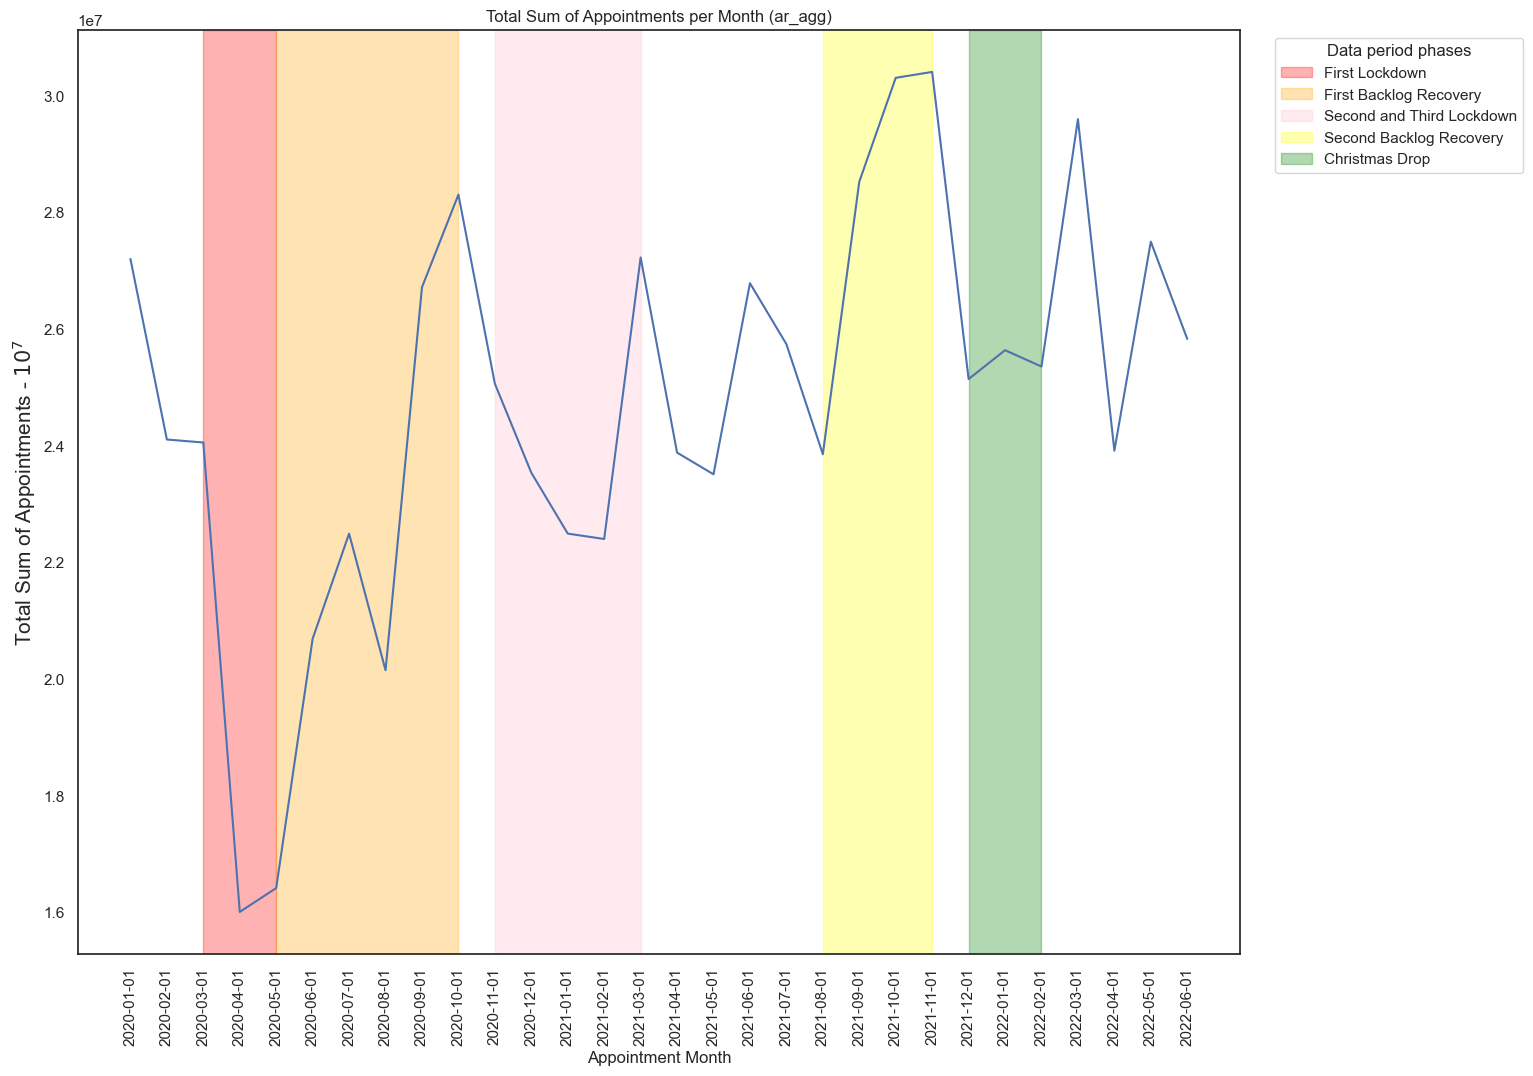

In [249]:
# Convert the appointment_month to string data type for ease of visualization
ar_agg["appointment_month"] = ar_agg["appointment_month"].astype("string")

# Create a lineplot for ar_agg with Seaborn
sns.lineplot(x="appointment_month", y="count_of_appointments", data=ar_agg, estimator=sum, ci=None)

# Customize the plot
plt.title("Total Sum of Appointments per Month (ar_agg)")
plt.xlabel("Appointment Month")
plt.ylabel("Total Sum of Appointments - $10^7$", fontsize=15)  # To show 10,000,000's")

# Shade specific months for lockdowns and backlog recoveries
plt.axvspan("2020-03-01", "2020-05-01", color="red", alpha=0.3, label="First Lockdown")
plt.axvspan("2020-05-01", "2020-10-01", color="orange", alpha=0.3, label="First Backlog Recovery")
plt.axvspan("2020-11-01", "2021-03-01", color="pink", alpha=0.3, label="Second and Third Lockdown")
plt.axvspan("2021-08-01", "2021-11-01", color="yellow", alpha=0.3, label="Second Backlog Recovery")
plt.axvspan("2021-12-01", "2022-02-01", color="green", alpha=0.3, label="Christmas Drop")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
plt.legend(loc="upper right", title="Data period phases", bbox_to_anchor=(1.25, 1))

> The technical report contains justification for this suggestions

In [250]:
# Create a new DataFrame with total number of appointments per month
ar_util = ar.groupby("appointment_month")["count_of_appointments"].sum().reset_index()

# Add a new column to indicate the average utilization of services
# Monthly aggregate / 30 to get to a daily value
daily_capacity = 1200000  # NHS guideline for maximum capacity per day
ar_util["utilisation"] = ((ar_util["count_of_appointments"] / 30 / daily_capacity) * 100).round(1)

# View the new DataFrame
print(ar_util)

# I have turned the values in utilisation into percentages

   appointment_month  count_of_appointments  utilisation
0         2020-01-01               27199296         75.6
1         2020-02-01               24104621         67.0
2         2020-03-01               24053468         66.8
3         2020-04-01               16007881         44.5
4         2020-05-01               16417212         45.6
5         2020-06-01               20690805         57.5
6         2020-07-01               22491437         62.5
7         2020-08-01               20150520         56.0
8         2020-09-01               26714255         74.2
9         2020-10-01               28301932         78.6
10        2020-11-01               25061602         69.6
11        2020-12-01               23535936         65.4
12        2021-01-01               22492069         62.5
13        2021-02-01               22399569         62.2
14        2021-03-01               27225424         75.6
15        2021-04-01               23879932         66.3
16        2021-05-01           

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '2020-01-01'),
  Text(1, 0, '2020-02-01'),
  Text(2, 0, '2020-03-01'),
  Text(3, 0, '2020-04-01'),
  Text(4, 0, '2020-05-01'),
  Text(5, 0, '2020-06-01'),
  Text(6, 0, '2020-07-01'),
  Text(7, 0, '2020-08-01'),
  Text(8, 0, '2020-09-01'),
  Text(9, 0, '2020-10-01'),
  Text(10, 0, '2020-11-01'),
  Text(11, 0, '2020-12-01'),
  Text(12, 0, '2021-01-01'),
  Text(13, 0, '2021-02-01'),
  Text(14, 0, '2021-03-01'),
  Text(15, 0, '2021-04-01'),
  Text(16, 0, '2021-05-01'),
  Text(17, 0, '2021-06-01'),
  Text(18, 0, '2021-07-01'),
  Text(19, 0, '2021-08-01'),
  Text(20, 0, '2021-09-01'),
  Text(21, 0, '2021-10-01'),
  Text(22, 0, '2021-11-01'),
  Text(23, 0, '2021-12-01'),
  Text(24, 0, '2022-01-01'),
  Text(25, 0, '2022-02-01'),
  Text(26, 0, '2022-03-01'),
  Text(27, 0, '2022-04-01'),
  Text(28, 0, '2022-05-01')

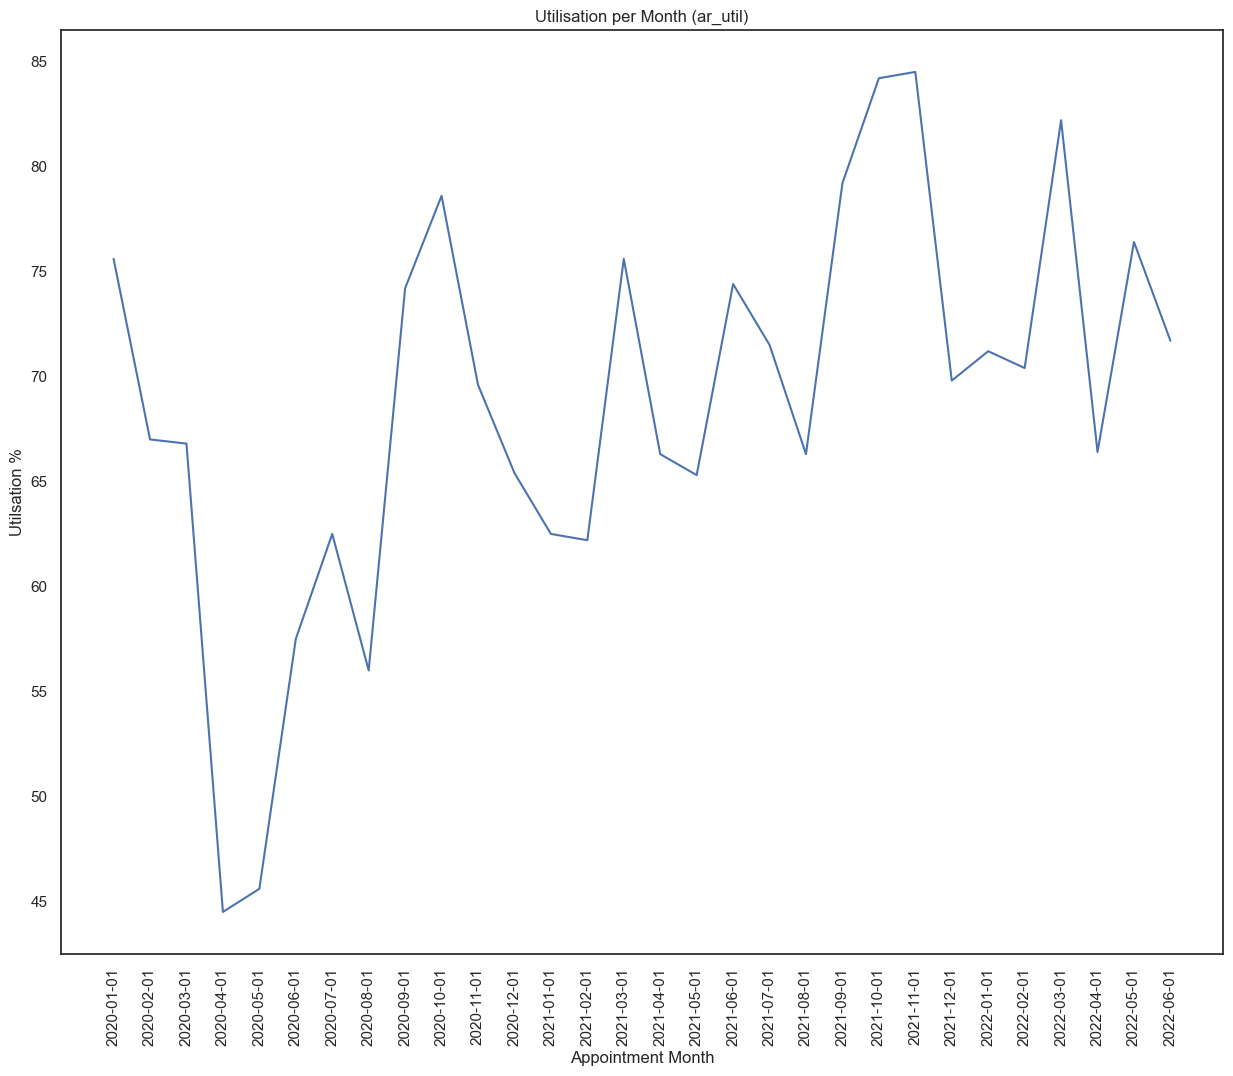

In [251]:
# Plot monthly capacity utilisation.
# Converting the appointment month to string
ar_util["appointment_month"] = ar_util["appointment_month"].astype("string")

# Create a lineplot.
sns.lineplot(x="appointment_month", y="utilisation", data=ar_util, ci=None)

# Customize the plot
plt.title("Utilisation per Month (ar_util)")
plt.xlabel("Appointment Month")
plt.ylabel("Utilsation %")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

> According to the metric provided, utilisation never once goes above 85%

> Which is a positive sign, although requires further investigation in the report and presentation

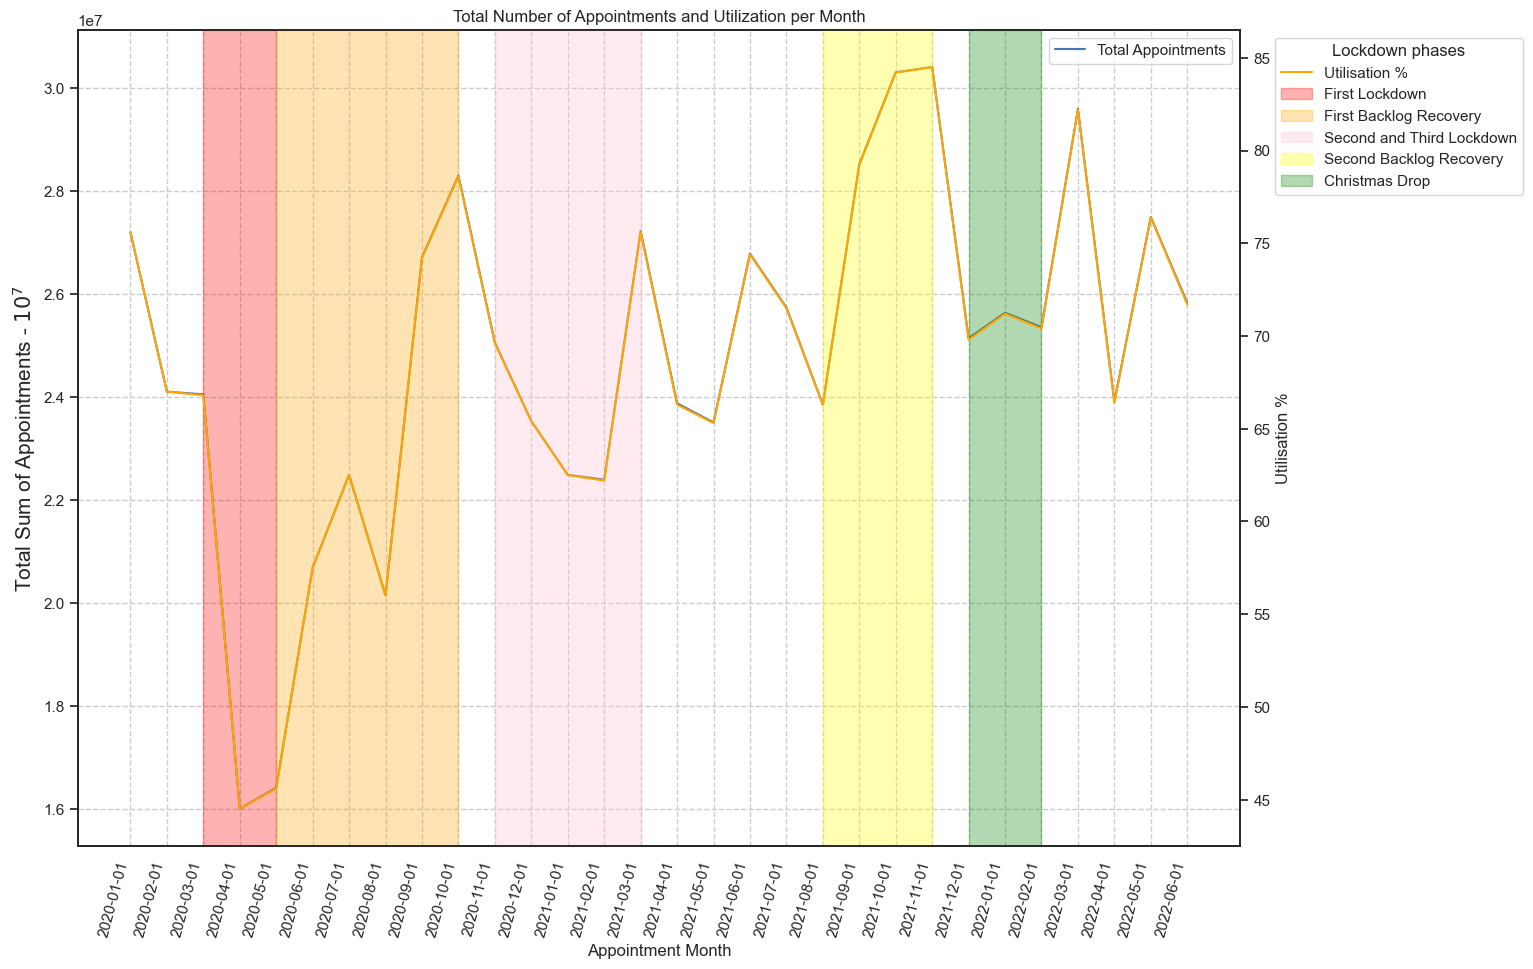

In [252]:
# Create a lineplot overlaying total of appointment count by month with utilization
ax1 = sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    data=ar_agg,
    estimator=sum,
    ci=None,
    label="Total Appointments",
)
ax1.set_xlabel("Appointment Month")
ax1.set_ylabel("Total Sum of Appointments - $10^7$", fontsize=15)  # To show 10,000,000's")
ax1.set_title("Total Number of Appointments and Utilization per Month")

# Create a secondary y-axis for utilization.
ax2 = ax1.twinx()
sns.lineplot(
    x="appointment_month",
    y="utilisation",
    data=ar_util,
    ci=None,
    color="orange",
    label="Utilisation %",
    ax=ax2,
)
ax2.set_ylabel("Utilisation %")

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate(rotation=75)

# Add grid lines for x-axis
ax1.grid(True, which="both", linestyle="--", linewidth=1)

# Shade specific months for lockdowns and backlog recoveries
plt.axvspan("2020-03-01", "2020-05-01", color="red", alpha=0.3, label="First Lockdown")
plt.axvspan("2020-05-01", "2020-10-01", color="orange", alpha=0.3, label="First Backlog Recovery")
plt.axvspan("2020-11-01", "2021-03-01", color="pink", alpha=0.3, label="Second and Third Lockdown")
plt.axvspan("2021-08-01", "2021-11-01", color="yellow", alpha=0.3, label="Second Backlog Recovery")
plt.axvspan("2021-12-01", "2022-02-01", color="green", alpha=0.3, label="Christmas Drop")

# Add a legend
plt.legend(loc="upper right", title="Lockdown phases", bbox_to_anchor=(1.25, 1))

**Question 2:** How do the healthcare professional types differ over time?

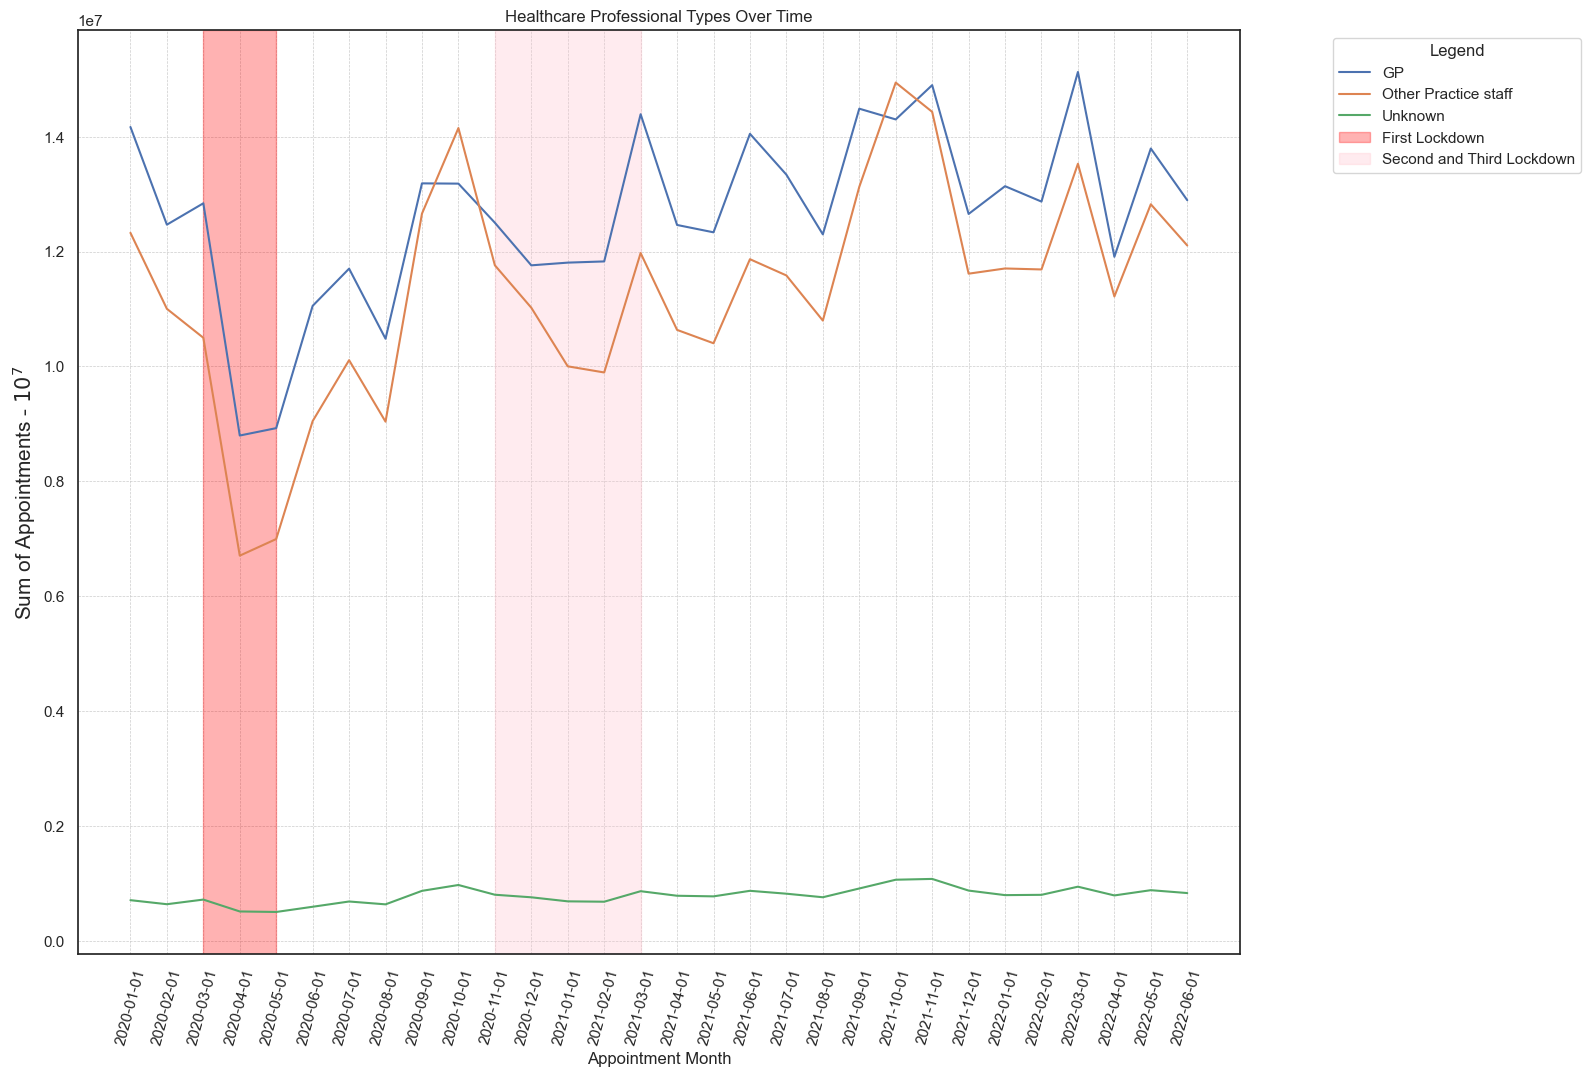

In [253]:
# Create a lineplot to answer the question.
sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="hcp_type",
    estimator=sum,
    ci=None,
    data=ar_agg,
)

# Customize the plot
plt.title("Healthcare Professional Types Over Time")
plt.xlabel("Appointment Month")
plt.ylabel("Sum of Appointments - $10^7$", fontsize=15)  # To show 10,000,000's
plt.legend(title="Healthcare Professional Type", bbox_to_anchor=(1, 1))

# Shade specific months for lockdowns and backlog recoveries
plt.axvspan("2020-03-01", "2020-05-01", color="red", alpha=0.3, label="First Lockdown")
plt.axvspan("2020-11-01", "2021-03-01", color="pink", alpha=0.3, label="Second and Third Lockdown")

# Add a legend
plt.legend(loc="upper right", title="Legend", bbox_to_anchor=(1.3, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Add grid lines for x-axis
plt.grid(True, linestyle="--", linewidth=0.5)

> You see a rise in other practice staff during the busy parts of the time frame

> Otherwise General Practice remains steadly on top

**Question 3:** Are there significant changes in whether or not visits are attended?

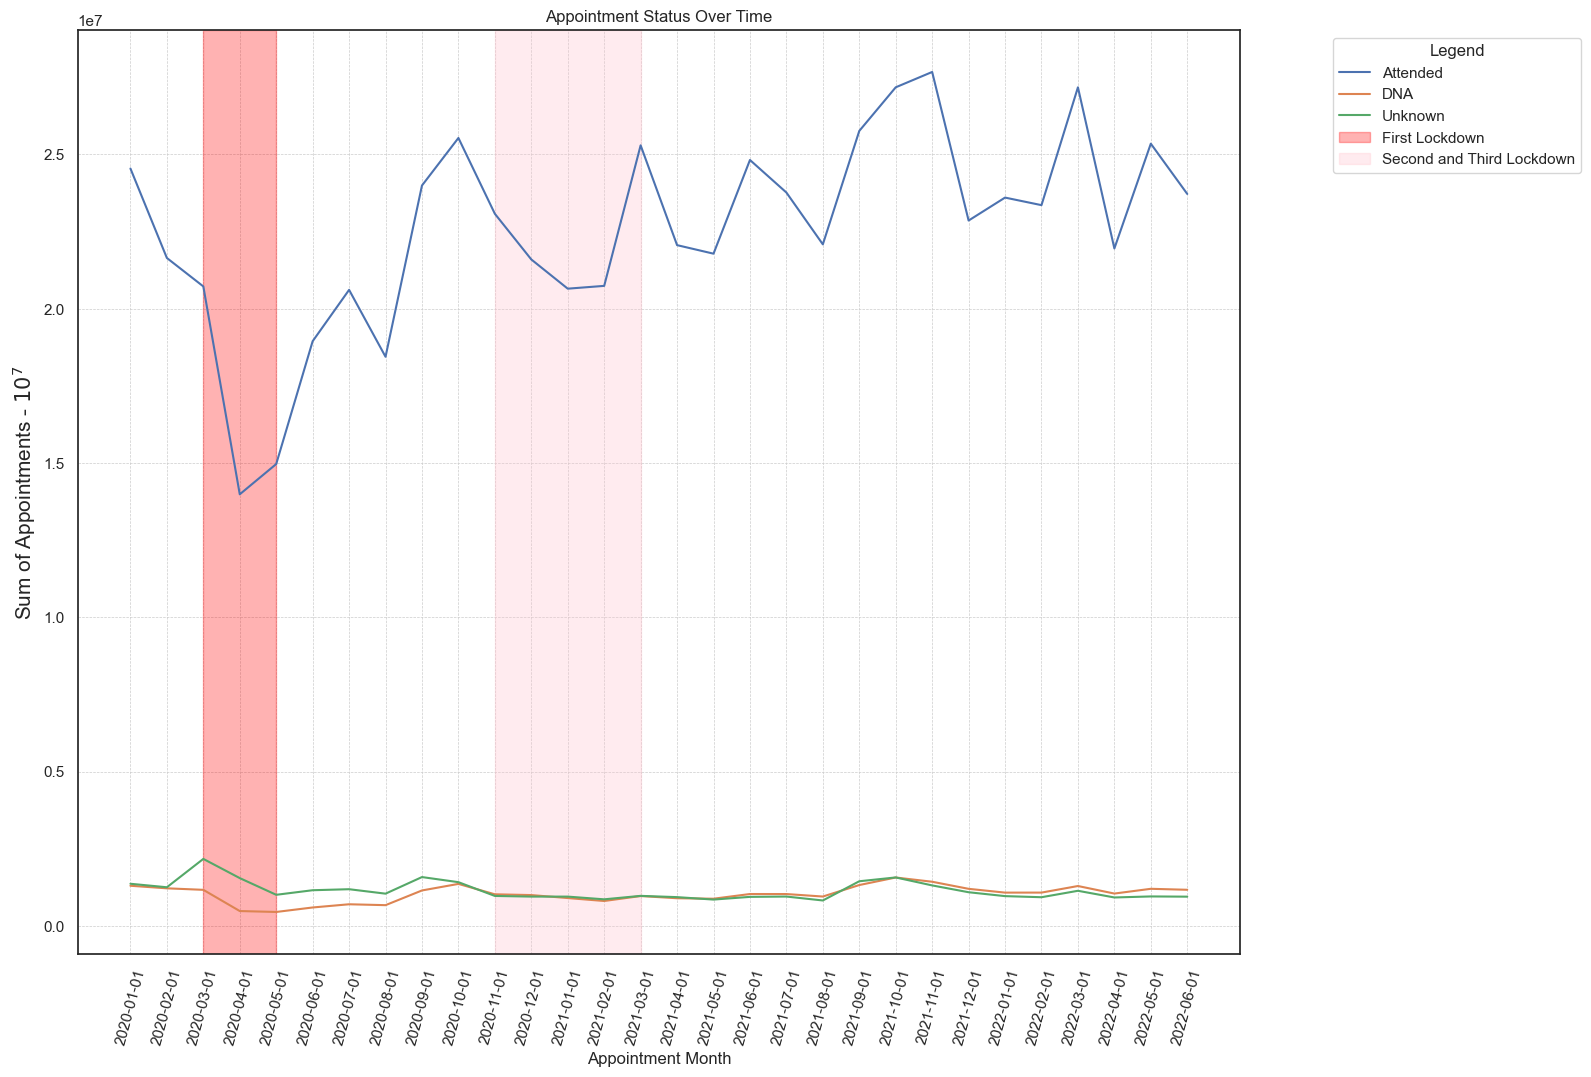

In [254]:
# Create a lineplot to answer the question
sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="appointment_status",
    estimator=sum,
    ci=None,
    data=ar_agg,
)

# Customize the plot
plt.title("Appointment Status Over Time")
plt.xlabel("Appointment Month")
plt.ylabel("Sum of Appointments - $10^7$", fontsize=15)  # To show 10,000,000's
plt.legend(
    title="Appointment Status",
    loc= "upper left",
    bbox_to_anchor=(1, 1),
)

# Shade specific months for lockdowns and backlog recoveries
plt.axvspan("2020-03-01", "2020-05-01", color="red", alpha=0.3, label="First Lockdown")
plt.axvspan("2020-11-01", "2021-03-01", color="pink", alpha=0.3, label="Second and Third Lockdown")

# Add a legend
plt.legend(loc="upper right", title="Legend", bbox_to_anchor=(1.3, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Add grid lines for the x-axis
plt.grid(True, linestyle="--", linewidth=0.5)

> No significant changes beyond the lockdown responses

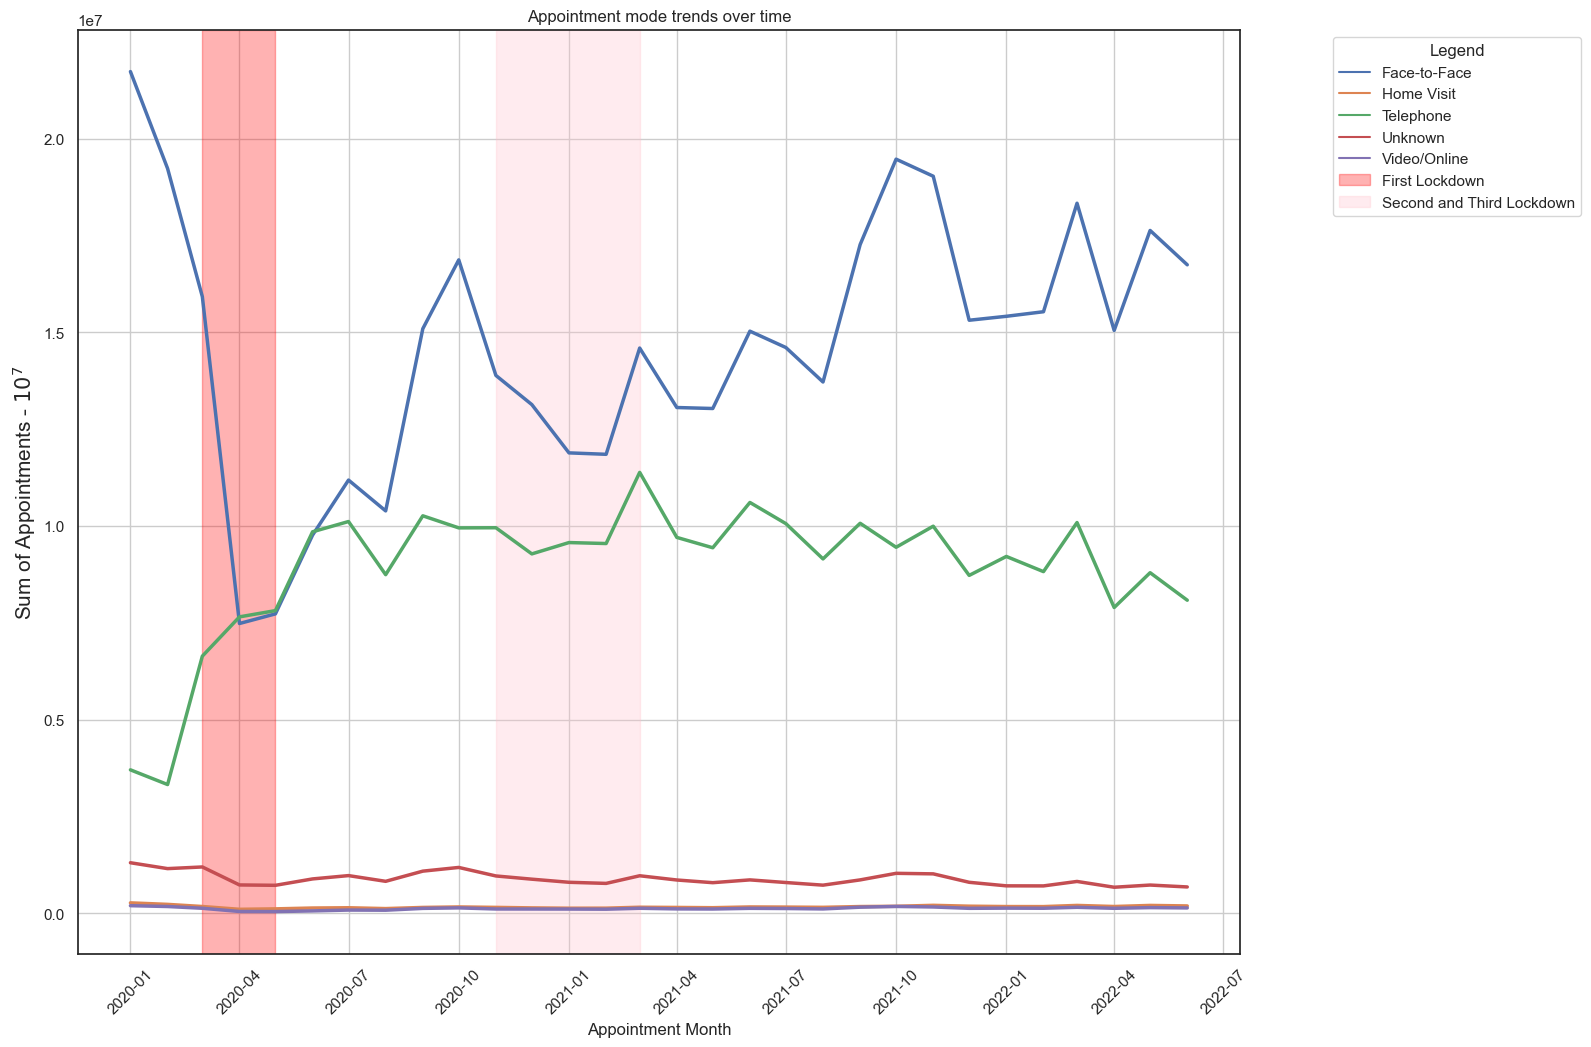

In [255]:
# Grouping by 'appointment_mode' and 'appointment_month', calculating the sum of 'count_of_appointments'
ar_sum_mode_coa_time = (
    ar.groupby(["appointment_mode", "appointment_month"])["count_of_appointments"].sum().reset_index()
)

# Plotting the line plot
sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="appointment_mode",
    data=ar_sum_mode_coa_time,
    ci=None,
    linewidth=2.5,
)

# Shade specific months for lockdowns and backlog recoveries
plt.axvspan("2020-03-01", "2020-05-01", color="red", alpha=0.3, label="First Lockdown")
plt.axvspan("2020-11-01", "2021-03-01", color="pink", alpha=0.3, label="Second and Third Lockdown")

# Add a legend
plt.legend(loc="upper right", title="Legend", bbox_to_anchor=(1.3, 1))

# Adding labels and title
plt.xticks(rotation=45)
plt.xlabel("Appointment Month")
plt.ylabel("Sum of Appointments - $10^7$", fontsize=15)  # To show 10,000,000's
plt.title("Appointment mode trends over time")

# Show gridlines
plt.grid(True)

> A large downward gap in 'face-to-face' coincides with a steep rise in the 'telephone' appointment mode.

> This period corresponds to the first England Lockdown, with a 32% decrease in appointments across the board.

> 'Face-to-face' regains ground quickly and retains an upward trend in spite of fluctuation.

> 'Telephone' does not retain the gains made during the lockdown.

> Other appointment modes remain relatively insignificant.

**Question 4:** Are there changes in terms of appointment type and the busiest months?

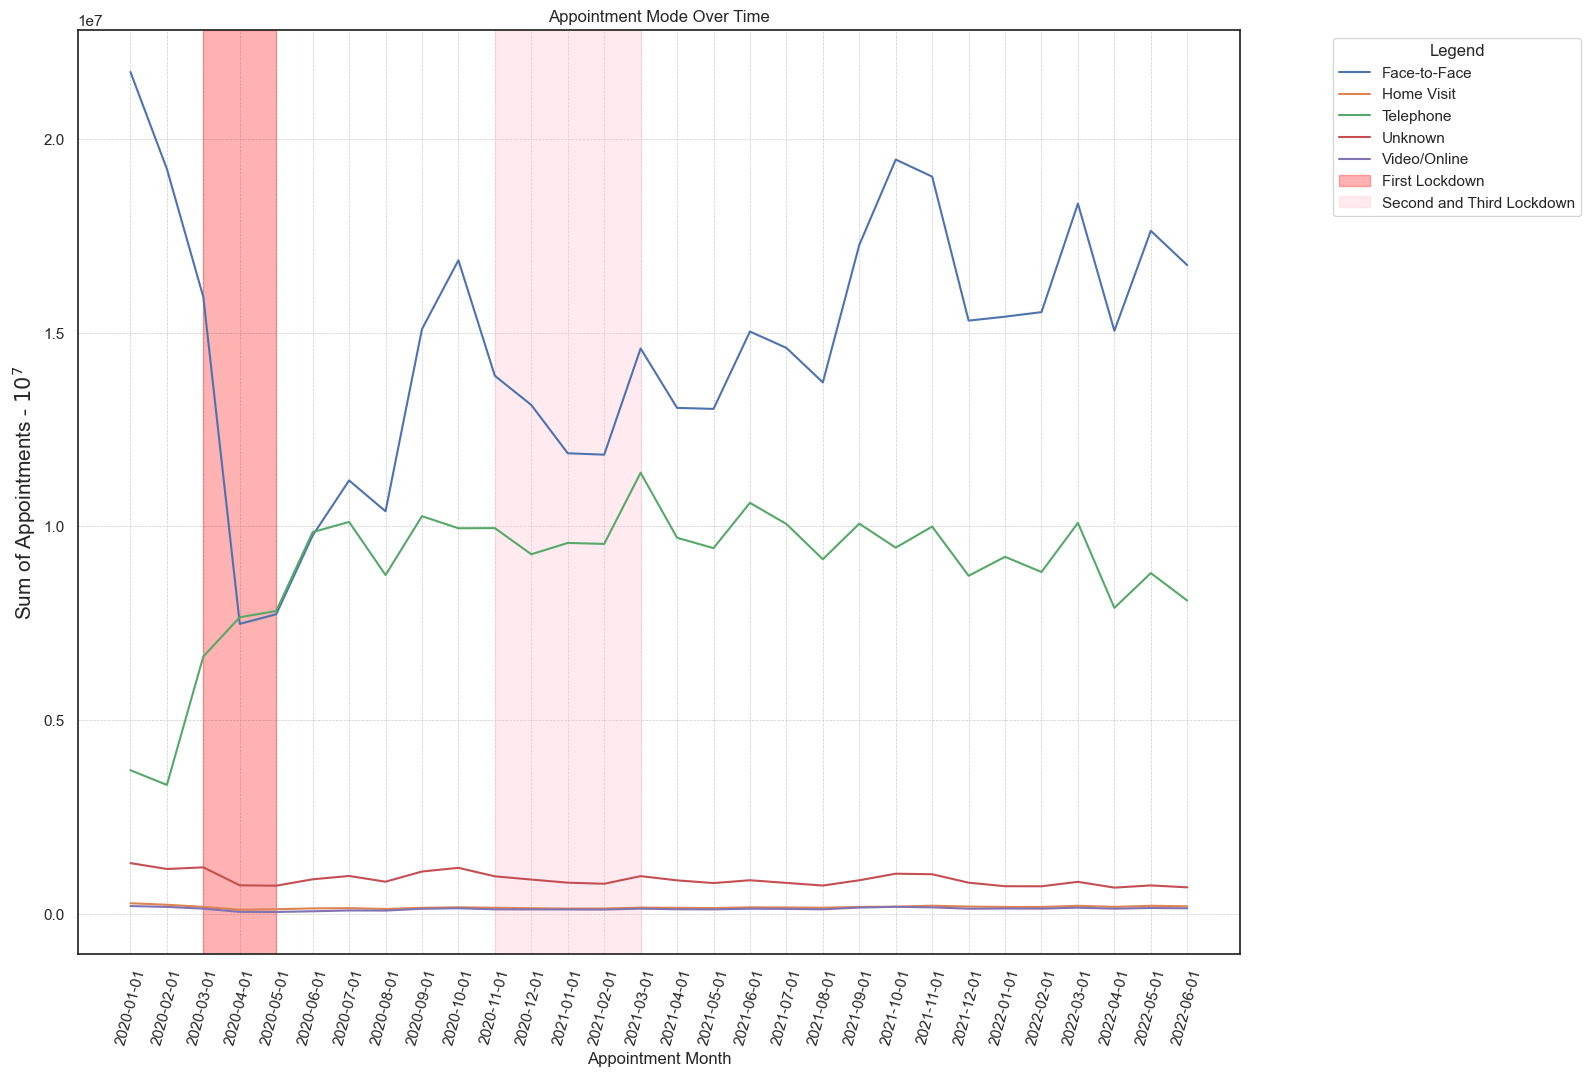

In [256]:
# Create a lineplot to answer the question
sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="appointment_mode",
    estimator=sum,
    ci=None,
    data=ar_agg,
)

# Shade specific months for lockdowns and backlog recoveries
plt.axvspan("2020-03-01", "2020-05-01", color="red", alpha=0.3, label="First Lockdown")
plt.axvspan("2020-11-01", "2021-03-01", color="pink", alpha=0.3, label="Second and Third Lockdown")

# Add a legend
plt.legend(loc="upper right", title="Legend", bbox_to_anchor=(1.3, 1))

# Customize the plot
plt.title("Appointment Mode Over Time")
plt.xlabel("Appointment Month")
plt.ylabel("Sum of Appointments - $10^7$", fontsize=15)  # To show 10,000,000's

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Add grid lines for x-axis
plt.grid(True, linestyle="--", linewidth=0.5)

> We see a rise in telephone appointments due to the pandemic again although that subsides quite quickly

> We also see a flat line of video/onlie which never increases to a noteable level

> The two backlog recovery periods see rises in face to face as you'd expect

**Question 5:** Are there any trends in time between booking an appointment?

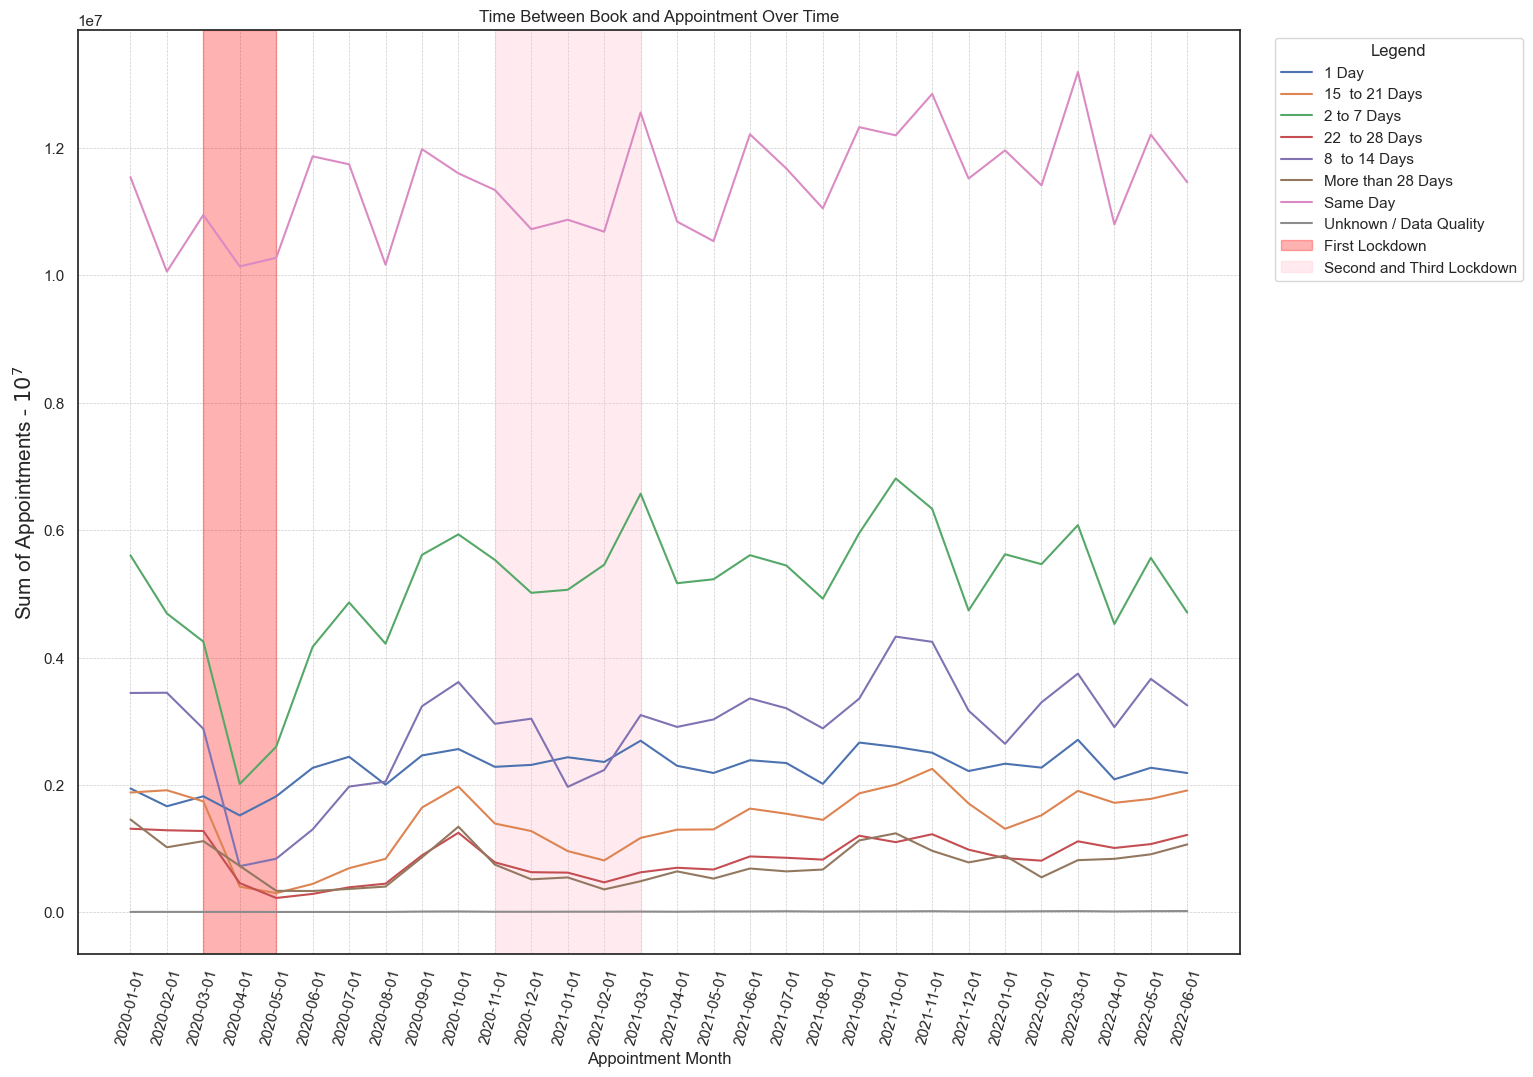

In [257]:
# Create a lineplot to answer the question.
sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="time_between_book_and_appointment",
    estimator=sum,
    ci=None,
    data=ar_agg,
)

# Customize the plot
plt.title("Time Between Book and Appointment Over Time")
plt.xlabel("Appointment Month")
plt.ylabel("Sum of Appointments - $10^7$", fontsize=15)  # To show 10,000,000's
plt.legend(
    title="Time Between Book and Appointment", bbox_to_anchor=(1, 1)
)

# Shade specific months for lockdowns and backlog recoveries
plt.axvspan("2020-03-01", "2020-05-01", color="red", alpha=0.3, label="First Lockdown")
plt.axvspan("2020-11-01", "2021-03-01", color="pink", alpha=0.3, label="Second and Third Lockdown")

# Add a legend
plt.legend(loc="upper right", title="Legend", bbox_to_anchor=(1.25, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Add grid lines for x-axis
plt.grid(True, linestyle="--", linewidth=0.5)

# Display the plot
plt.show()


> Appointments follow a standard trajectory here with no noteable exceptions

Text(0.5, 1.0, 'Bar Chart of Recommended 14 Days Wait Time')

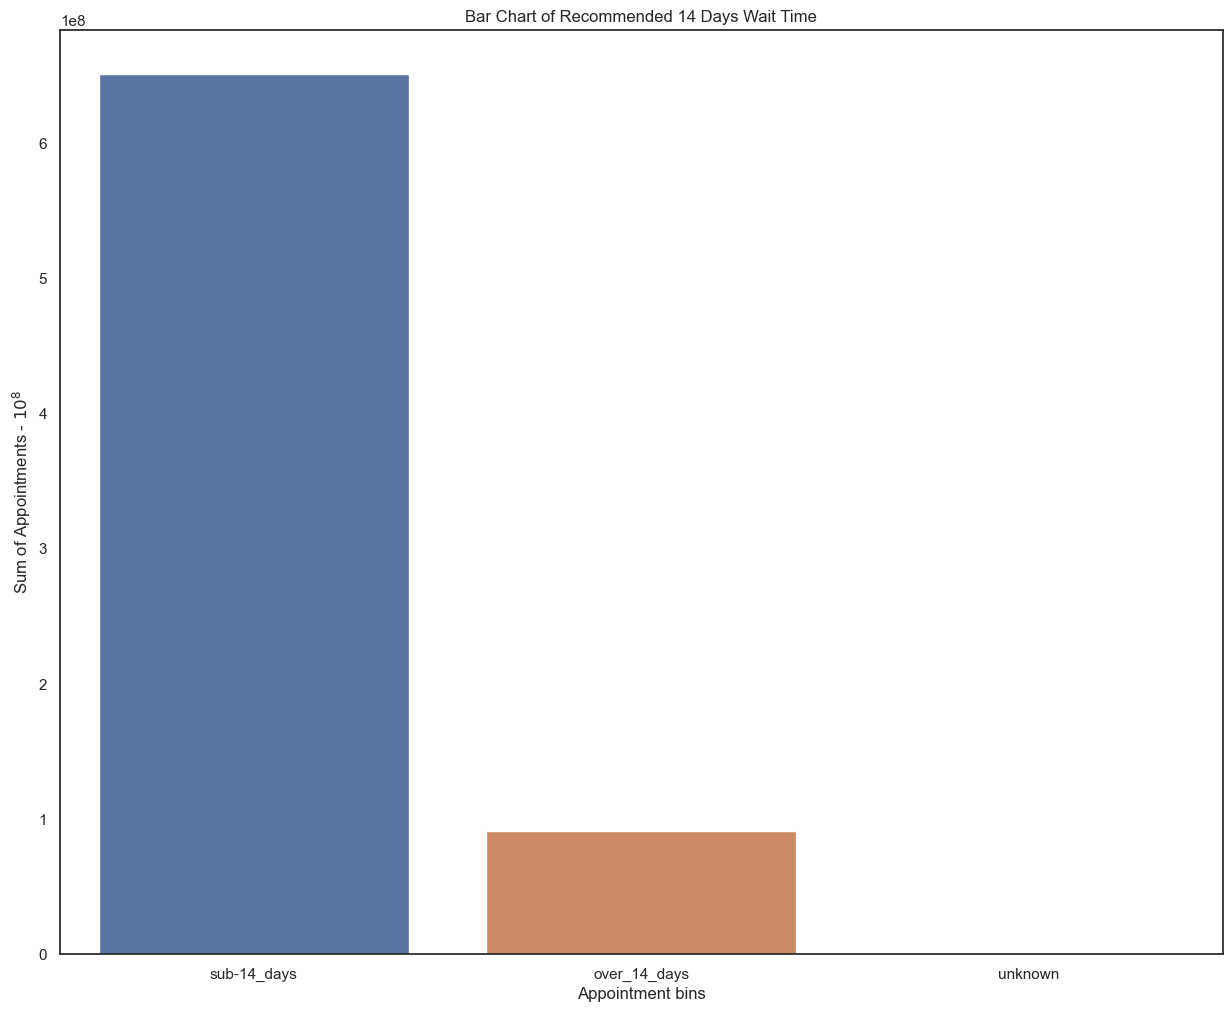

In [258]:
# Grouping the data into groups around the recommended 14-days having previously calculated totals from a pivot table
book_delay_group = pd.DataFrame({
    "category": ["sub-14_days", "over_14_days", "unknown"],
    "total": [651104318, 91298102, 402105],
})

# Create a bar chart using Seaborn
sns.barplot(x="category", y="total", data=book_delay_group)

# Adding labels and title
plt.xlabel("Appointment bins")
plt.ylabel("Sum of Appointments - $10^8$")  # To show 100,000,000's
plt.title("Bar Chart of Recommended 14 Days Wait Time")

> Here we see that most appointments do in fact take place before 14 days

> The 14 day metric is from a target suggested by Therese Coffey when she was Health Secretary. She suggested that “No one should wait more than two weeks to see GP .” See [here](https://www.theguardian.com/society/2022/sep/21/no-one-should-wait-more-than-two-weeks-to-see-gp-coffey-to-say) for more information. 

**Question 6:** How does the spread of service settings compare?

In [259]:
# Let's go back to the national category DataFrame and view it to find service setting
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0        2021-08-01  
1        2021-08-01  
2        2021-08-01  
3        2021-08-01  
4        2021-08-01

In [260]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_agg_columns = [
    "appointment_date",
    "icb_ons_code",
    "sub_icb_location_name",
    "service_setting",
    "context_type",
    "national_category",
    "appointment_month",
]

# Create the new DataFrame
nc_agg = nc.groupby(nc_agg_columns)["count_of_appointments"].sum().reset_index()

# View the new DataFrame
nc_agg.tail()

appointment_date icb_ons_code          sub_icb_location_name  \
817389       2022-06-30    E54000062  NHS Black Country ICB - D2P2L   
817390       2022-06-30    E54000062  NHS Black Country ICB - D2P2L   
817391       2022-06-30    E54000062  NHS Black Country ICB - D2P2L   
817392       2022-06-30    E54000062  NHS Black Country ICB - D2P2L   
817393       2022-06-30    E54000062  NHS Black Country ICB - D2P2L   

             service_setting            context_type  \
817389  Primary Care Network  Care Related Encounter   
817390  Primary Care Network  Care Related Encounter   
817391  Primary Care Network  Care Related Encounter   
817392  Primary Care Network    Inconsistent Mapping   
817393              Unmapped                Unmapped   

                   national_category appointment_month  count_of_appointments  
817389    Social Prescribing Service        2022-06-01                     67  
817390  Structured Medication Review        2022-06-01                     23  
817391   Unplanned Clinical Activity        2022-06-01                      1  
817392          Inconsistent Mapping        2022-06-01                    158  
817393                      Unmapped        2022-06-01                    340

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2021-08-01'),
  Text(1, 0, '2021-09-01'),
  Text(2, 0, '2021-10-01'),
  Text(3, 0, '2021-11-01'),
  Text(4, 0, '2021-12-01'),
  Text(5, 0, '2022-01-01'),
  Text(6, 0, '2022-02-01'),
  Text(7, 0, '2022-03-01'),
  Text(8, 0, '2022-04-01'),
  Text(9, 0, '2022-05-01'),
  Text(10, 0, '2022-06-01')])

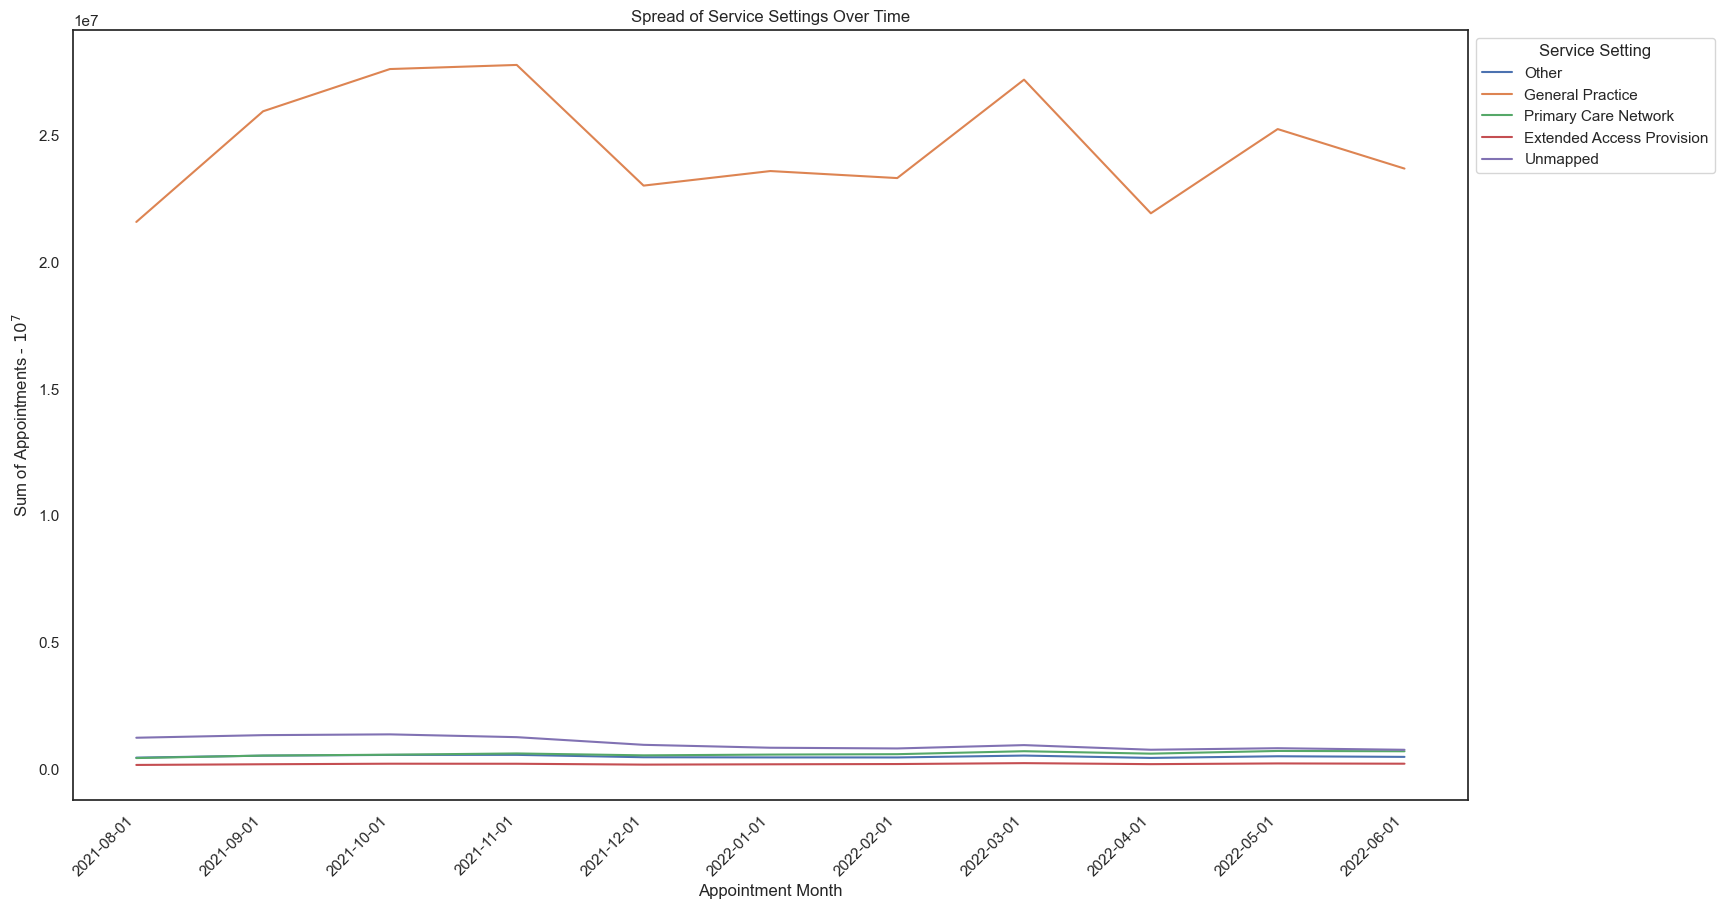

In [261]:
# Creating a line plot to explore service settings over time

plt.figure(figsize=(18, 10))
sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="service_setting",
    estimator="sum",  # Used to ensure sum of count of appointments
    ci=None,  # Turned off confidence intervals for better clarity
    data=nc_agg,
)

# Customize the plot
plt.title("Spread of Service Settings Over Time")
plt.xlabel("Appointment Month")
plt.ylabel("Sum of Appointments - $10^7$")  # To show 10,000,000's
plt.legend(title="Service Setting", bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

> This chart confirms that general practice still dominates

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2021-08-01'),
  Text(1, 0, '2021-09-01'),
  Text(2, 0, '2021-10-01'),
  Text(3, 0, '2021-11-01'),
  Text(4, 0, '2021-12-01'),
  Text(5, 0, '2022-01-01'),
  Text(6, 0, '2022-02-01'),
  Text(7, 0, '2022-03-01'),
  Text(8, 0, '2022-04-01'),
  Text(9, 0, '2022-05-01'),
  Text(10, 0, '2022-06-01')])

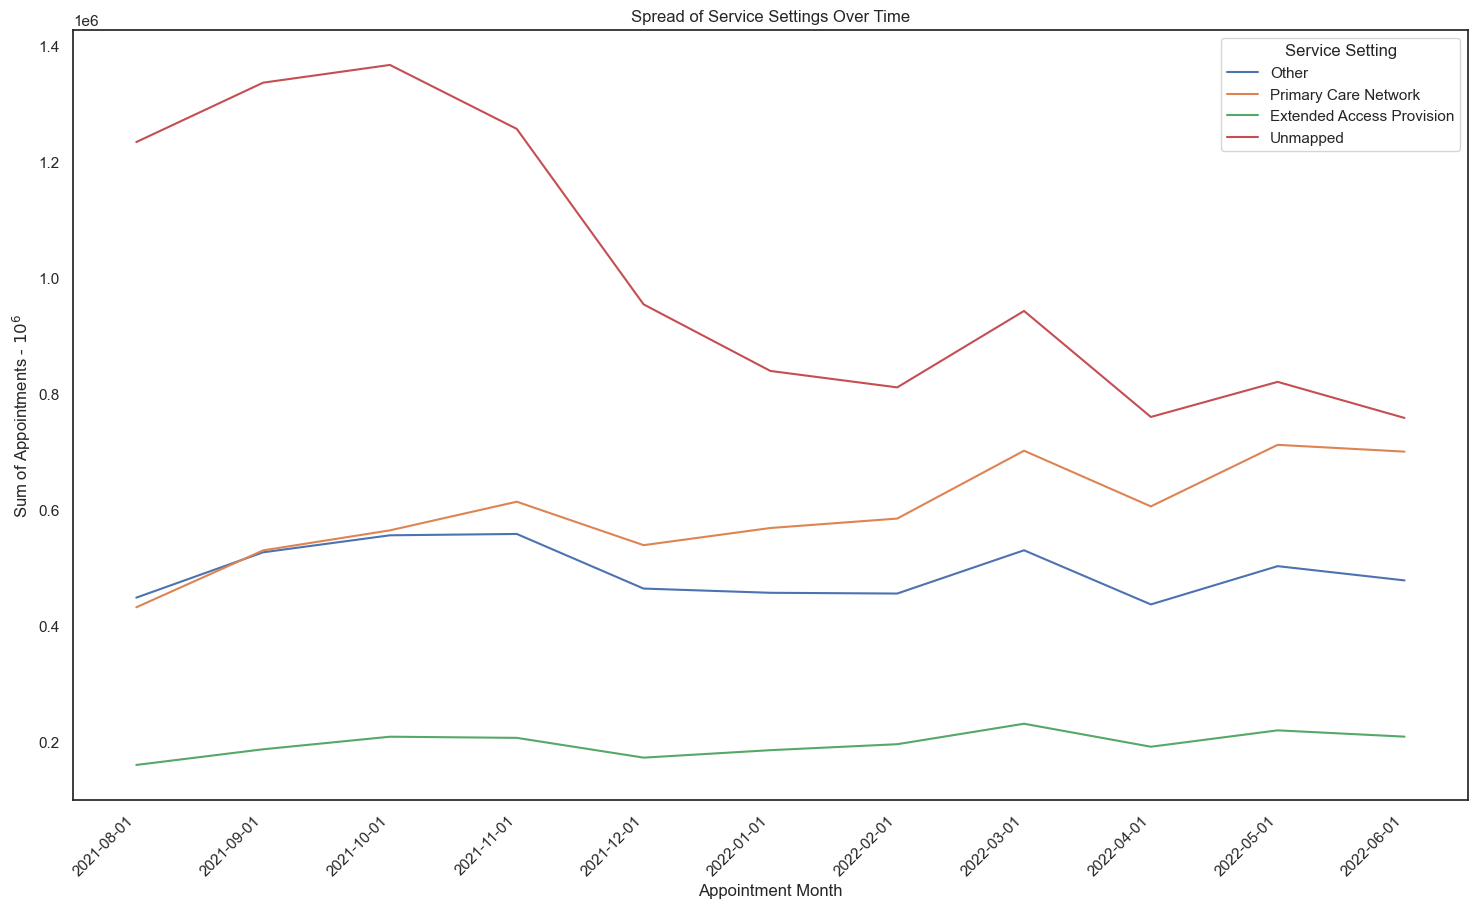

In [262]:
# Explore the same chart without the over-represented General Practice
plt.figure(figsize=(18, 10))
sns.lineplot(
    x="appointment_month",
    y="count_of_appointments",
    hue="service_setting",
    estimator="sum",  # Used to ensure sum of count of appointments
    ci=None,  # Turned off confidence intervals for better clarity
    data=nc_agg[nc_agg["service_setting"] != "General Practice"],
)

# Customize the plot
plt.title("Spread of Service Settings Over Time")
plt.xlabel("Appointment Month")
plt.ylabel("Sum of Appointments - $10^6$")  # To show 1,000,000's
plt.legend(title="Service Setting", bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

> This chart confirms the previous exploration into service settings

> Unmapped is going down and PCN is going up possibly reflecting investment

### Key insights and reccomendations

The NHS capacity debate offers two main paths: reorganise current resources or expand and upgrade capacity.

##### Capacity Insights:
>Average capacity is around 65% during a tumultuous period.

>Varying regional appointment distribution aligns with relative populations.
##### Capacity recomendation:
>Data needed over a larger date range, including pandemics, for a comprehensive assessment.

>Propose evaluating maximum capacity at different geographical levels and national categories.

>Recommend resource allocation based on regional demands rather than relying solely on a national metric of capacity.

To meet the demands of a growing population, increasing capacity is essential. However, efficient utilisation requires a significant restructuring of resources, as highlighted in this report.

#### Utilisation Insights:
> 91% of appointments are in general practice.

> Majority of patients seen within the recommended 14-day target, but 91 million appointments fall short.

> GPs handle 51% of appointments, while Other Practice Staff manage 46%.

> 52% of appointments meet the BMA's sub-15 minute duration standard.

> Despite high attendance, 40 million appointments are missed.

#### Utilisation Recommendations:
> Advocate for reducing face-to-face appointments to free up GP time.

> Encourage alternative means like telephone or video/online appointments.

> Support other practice staff in handling appropriate appointments.

> Promote centralization through Primary Care Networks for enhanced efficiency.

> Emphasize adherence to appropriate time frames for appointments.

#### Appointment Attendance Insight:
> Non-attendance by 4% of patients could cost the NHS around £927 million annually.

#### Appointment Attendance Recomendation:
> Shift towards alternative healthcare professionals and appointment types can benefit patients who miss appointments.

##### Twitter Insight and recomendation:
> Twitter data proved less directly useful, but potential insights can be unlocked through cleaned, ethical analysis using relevant keywords and hashtags.

Thank you for reading